# Titanic Dataset - Who Survives? 
**Classification Problem**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config Completer.use_jedi = False

## Framework to be followed:-
1. Get Data
2. Check for null values
3. Fill NaN values
4. Refine the data, Create more columns
5. Convert everything into Numeric data
6. Choose a model, from a few Baseline Models (RFC, XGBoost, CatBoost, LogisticRRegression)
7. Tune the models using RandomizedSearchCV or GridSearchCV
8. Make Predictions and submit

In [2]:
train_df = pd.read_csv('./train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Checking Null Values

In [4]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 3. Filling the Null values

In [5]:
# performing a small EDA

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


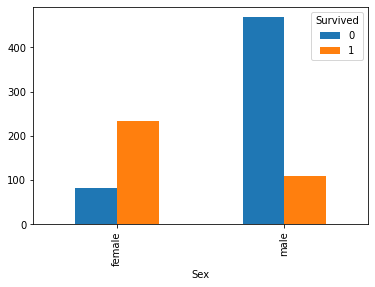

In [7]:
pd.crosstab( train_df.Survived,train_df.Sex).T.plot.bar();

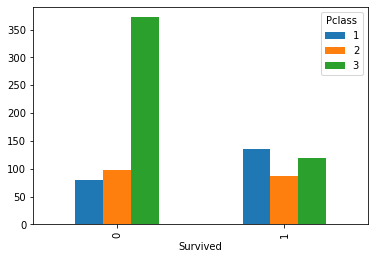

In [8]:
pd.crosstab( train_df.Survived,train_df.Pclass).plot.bar();

In [9]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
# SibSp and Pclass has some strong Correlation with Age so we'll be imputing the age according to those 2 features plus the Gender feature
train_df.groupby(['Sex','Pclass', 'SibSp']).mean()['Age']

Sex     Pclass  SibSp
female  1       0        34.000000
                1        36.441176
                2        30.666667
                3        23.500000
        2       0        30.440476
                1        27.321429
                2        17.333333
                3        30.000000
        3       0        22.866071
                1        27.232143
                2         9.083333
                3        11.000000
                4         8.333333
                5        16.000000
                8              NaN
male    1       0        42.738806
                1        38.481290
                2        47.000000
                3        19.000000
        2       0        32.870597
                1        27.407407
                2        20.200000
        3       0        29.012539
                1        23.057143
                2        28.666667
                3         5.333333
                4         6.416667
                5         8.75000

In [11]:
train_df.groupby(['Sex','Pclass', 'SibSp']).median()['Age'].round()

Sex     Pclass  SibSp
female  1       0        32.0
                1        37.0
                2        21.0
                3        24.0
        2       0        30.0
                1        28.0
                2        24.0
                3        30.0
        3       0        22.0
                1        28.0
                2         7.0
                3         8.0
                4         8.0
                5        16.0
                8         NaN
male    1       0        40.0
                1        38.0
                2        47.0
                3        19.0
        2       0        30.0
                1        31.0
                2        23.0
        3       0        27.0
                1        25.0
                2        27.0
                3         4.0
                4         6.0
                5        10.0
                8         NaN
Name: Age, dtype: float64

Seems good to impute(fill) the Age column's NaN values with the median of The above grouped data

In [12]:
train_df['Age'] = train_df.groupby(['Sex','Pclass', 'SibSp'])['Age'].apply(lambda x:x.fillna(x.median()))

In [13]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              7
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train_df[train_df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [15]:
train_df.groupby(['Sex', 'Pclass']).median()['Age']

Sex     Pclass
female  1         35.0
        2         28.5
        3         22.0
male    1         40.0
        2         30.0
        3         27.0
Name: Age, dtype: float64

In [16]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [17]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
train_df.Embarked.mode()

0    S
dtype: object

In [19]:
train_df.Embarked.fillna('S', inplace = True)

In [20]:
train_df.Cabin.fillna('missing', inplace = True)

### 4. Refining the Data

In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S


In [22]:
# Creating a column with total number of Family members
train_df['FamCount'] = train_df.Parch + train_df.SibSp + 1

In [23]:
# getting the total number of cabin occupied by a ticket holder
train_df['CabinOcc'] = train_df.Cabin.str.split(' ').apply(lambda x: len(x))

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamCount,CabinOcc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S,1,1


In [25]:
train_df[train_df['Age']<=1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamCount,CabinOcc
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,missing,S,3,1
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,missing,S,6,1
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,missing,S,3,1
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,4,1
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,4,2
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,missing,C,3,1
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,missing,S,8,1
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,missing,C,4,1
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,missing,C,4,1
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,missing,S,3,1


In [26]:
# Let's save this for experimentation phase

# train_df['Age'] = train_df['Age'].apply(lambda x: x/100 if x>1 else x)

### 5. Making all data numeric
**Come back here for the second iteratrion**

In [27]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamCount', 'CabinOcc'],
      dtype='object')

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamCount     891 non-null    int64  
 13  CabinOcc     891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [29]:
# splitting the data into X and Y
X = train_df.drop(['Name', 'Cabin', 'Ticket', 'Survived'], axis = 1)
y = train_df.Survived

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   FamCount     891 non-null    int64  
 9   CabinOcc     891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [31]:
# converting Embarked and Age into numerical format using One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [32]:
cats = ['Sex', 'Embarked']
ohe = OneHotEncoder()
transformer = ColumnTransformer([('ohe', ohe, cats)],
                               remainder = 'passthrough')
X_trans = transformer.fit_transform(X)

In [33]:
X_trans = pd.DataFrame(X_trans)
X_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,22.0,1.0,0.0,7.2500,2.0,1.0
1,1.0,0.0,1.0,0.0,0.0,2.0,1.0,38.0,1.0,0.0,71.2833,2.0,1.0
2,1.0,0.0,0.0,0.0,1.0,3.0,3.0,26.0,0.0,0.0,7.9250,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0,4.0,1.0,35.0,1.0,0.0,53.1000,2.0,1.0
4,0.0,1.0,0.0,0.0,1.0,5.0,3.0,35.0,0.0,0.0,8.0500,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,887.0,2.0,27.0,0.0,0.0,13.0000,1.0,1.0
887,1.0,0.0,0.0,0.0,1.0,888.0,1.0,19.0,0.0,0.0,30.0000,1.0,1.0
888,1.0,0.0,0.0,0.0,1.0,889.0,3.0,28.5,1.0,2.0,23.4500,4.0,1.0
889,0.0,1.0,1.0,0.0,0.0,890.0,1.0,26.0,0.0,0.0,30.0000,1.0,1.0


### 6. Choosing a model

In [54]:
np.random.seed(45)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y,
                                                   test_size = 0.2)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [55]:
np.random.seed(25)

models = {'RFC':RandomForestClassifier(),
         'LR':LogisticRegression(),
         'CatBoost':CatBoostClassifier()}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    cv_score = np.mean(cross_val_score(model, X_trans, y, cv = 5))
    results[model_name] = cv_score
    
print(results)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Learning rate set to 0.008911
0:	learn: 0.6871828	total: 7.3ms	remaining: 7.3s
1:	learn: 0.6818728	total: 8.66ms	remaining: 4.32s
2:	learn: 0.6768431	total: 9.86ms	remaining: 3.28s
3:	learn: 0.6717523	total: 11ms	remaining: 2.75s
4:	learn: 0.6673669	total: 12.3ms	remaining: 2.45s
5:	learn: 0.6632437	total: 13.3ms	remaining: 2.2s
6:	learn: 0.6579861	total: 14.5ms	remaining: 2.05s
7:	learn: 0.6532796	total: 15.7ms	remaining: 1.94s
8:	learn: 0.6481981	total: 16.9ms	remaining: 1.86s
9:	learn: 0.6437625	total: 18.2ms	remaining: 1.8s
10:	learn: 0.6392777	total: 19.9ms	remaining: 1.78s
11:	learn: 0.6349244	total: 21.2ms	remaining: 1.74s
12:	learn: 0.6311690	total: 22.6ms	remaining: 1.72s
13:	learn: 0.6274602	total: 23.9ms	remaining: 1.68s
14:	learn: 0.6239142	total: 25.1ms	remaining: 1.65s
15:	learn: 0.6201669	total: 26.4ms	remaining: 1.62s
16:	learn: 0.6162013	total: 27.7ms	remaining: 1.6s
17:	learn: 0.6121831	total: 28.9ms	remaining: 1.57s
18:	learn: 0.6077573	total: 30.1ms	remaining: 1.55s

264:	learn: 0.3737664	total: 337ms	remaining: 933ms
265:	learn: 0.3735618	total: 338ms	remaining: 933ms
266:	learn: 0.3733139	total: 339ms	remaining: 932ms
267:	learn: 0.3731710	total: 341ms	remaining: 931ms
268:	learn: 0.3729938	total: 342ms	remaining: 930ms
269:	learn: 0.3728502	total: 343ms	remaining: 929ms
270:	learn: 0.3726147	total: 345ms	remaining: 927ms
271:	learn: 0.3724854	total: 346ms	remaining: 926ms
272:	learn: 0.3723099	total: 347ms	remaining: 925ms
273:	learn: 0.3721768	total: 349ms	remaining: 924ms
274:	learn: 0.3718187	total: 350ms	remaining: 923ms
275:	learn: 0.3716137	total: 351ms	remaining: 921ms
276:	learn: 0.3712860	total: 353ms	remaining: 921ms
277:	learn: 0.3710731	total: 354ms	remaining: 920ms
278:	learn: 0.3709248	total: 356ms	remaining: 919ms
279:	learn: 0.3707083	total: 357ms	remaining: 918ms
280:	learn: 0.3704178	total: 358ms	remaining: 917ms
281:	learn: 0.3702421	total: 360ms	remaining: 916ms
282:	learn: 0.3700290	total: 361ms	remaining: 914ms
283:	learn: 

553:	learn: 0.3216229	total: 685ms	remaining: 552ms
554:	learn: 0.3214795	total: 687ms	remaining: 550ms
555:	learn: 0.3211012	total: 688ms	remaining: 549ms
556:	learn: 0.3209912	total: 689ms	remaining: 548ms
557:	learn: 0.3208208	total: 690ms	remaining: 547ms
558:	learn: 0.3207296	total: 691ms	remaining: 545ms
559:	learn: 0.3206488	total: 693ms	remaining: 544ms
560:	learn: 0.3205164	total: 694ms	remaining: 543ms
561:	learn: 0.3202375	total: 695ms	remaining: 542ms
562:	learn: 0.3200885	total: 696ms	remaining: 540ms
563:	learn: 0.3198936	total: 698ms	remaining: 539ms
564:	learn: 0.3198933	total: 698ms	remaining: 538ms
565:	learn: 0.3197685	total: 700ms	remaining: 537ms
566:	learn: 0.3196741	total: 701ms	remaining: 535ms
567:	learn: 0.3195278	total: 702ms	remaining: 534ms
568:	learn: 0.3194053	total: 704ms	remaining: 533ms
569:	learn: 0.3192634	total: 705ms	remaining: 532ms
570:	learn: 0.3190866	total: 706ms	remaining: 530ms
571:	learn: 0.3189975	total: 707ms	remaining: 529ms
572:	learn: 

830:	learn: 0.2846380	total: 1.03s	remaining: 210ms
831:	learn: 0.2845621	total: 1.03s	remaining: 209ms
832:	learn: 0.2842825	total: 1.03s	remaining: 207ms
833:	learn: 0.2841039	total: 1.04s	remaining: 206ms
834:	learn: 0.2840080	total: 1.04s	remaining: 205ms
835:	learn: 0.2839673	total: 1.04s	remaining: 204ms
836:	learn: 0.2837304	total: 1.04s	remaining: 203ms
837:	learn: 0.2836897	total: 1.04s	remaining: 201ms
838:	learn: 0.2834998	total: 1.04s	remaining: 200ms
839:	learn: 0.2832129	total: 1.04s	remaining: 199ms
840:	learn: 0.2830684	total: 1.04s	remaining: 198ms
841:	learn: 0.2829206	total: 1.05s	remaining: 196ms
842:	learn: 0.2828353	total: 1.05s	remaining: 195ms
843:	learn: 0.2826320	total: 1.05s	remaining: 194ms
844:	learn: 0.2824435	total: 1.05s	remaining: 193ms
845:	learn: 0.2821740	total: 1.05s	remaining: 191ms
846:	learn: 0.2820272	total: 1.05s	remaining: 190ms
847:	learn: 0.2819062	total: 1.05s	remaining: 189ms
848:	learn: 0.2816290	total: 1.05s	remaining: 188ms
849:	learn: 

Learning rate set to 0.008911
0:	learn: 0.6875917	total: 23.3ms	remaining: 23.3s
1:	learn: 0.6815416	total: 24.6ms	remaining: 12.3s
2:	learn: 0.6765936	total: 25.4ms	remaining: 8.44s
3:	learn: 0.6714589	total: 26.9ms	remaining: 6.7s
4:	learn: 0.6659701	total: 28.2ms	remaining: 5.61s
5:	learn: 0.6609001	total: 29.5ms	remaining: 4.88s
6:	learn: 0.6557395	total: 30.7ms	remaining: 4.35s
7:	learn: 0.6504080	total: 32ms	remaining: 3.97s
8:	learn: 0.6445478	total: 33.2ms	remaining: 3.66s
9:	learn: 0.6392194	total: 34.5ms	remaining: 3.42s
10:	learn: 0.6340434	total: 35.8ms	remaining: 3.22s
11:	learn: 0.6288148	total: 37.2ms	remaining: 3.06s
12:	learn: 0.6237291	total: 38.4ms	remaining: 2.91s
13:	learn: 0.6196134	total: 39.5ms	remaining: 2.78s
14:	learn: 0.6153086	total: 40.6ms	remaining: 2.67s
15:	learn: 0.6106396	total: 41.9ms	remaining: 2.57s
16:	learn: 0.6060468	total: 43.3ms	remaining: 2.5s
17:	learn: 0.6015588	total: 44.5ms	remaining: 2.43s
18:	learn: 0.5975900	total: 45.9ms	remaining: 2.

262:	learn: 0.3539750	total: 343ms	remaining: 962ms
263:	learn: 0.3536788	total: 345ms	remaining: 962ms
264:	learn: 0.3532969	total: 346ms	remaining: 961ms
265:	learn: 0.3530538	total: 348ms	remaining: 959ms
266:	learn: 0.3527509	total: 349ms	remaining: 958ms
267:	learn: 0.3524930	total: 350ms	remaining: 956ms
268:	learn: 0.3522550	total: 352ms	remaining: 956ms
269:	learn: 0.3520565	total: 353ms	remaining: 954ms
270:	learn: 0.3518350	total: 354ms	remaining: 953ms
271:	learn: 0.3516360	total: 355ms	remaining: 951ms
272:	learn: 0.3515980	total: 356ms	remaining: 949ms
273:	learn: 0.3513854	total: 358ms	remaining: 948ms
274:	learn: 0.3512266	total: 359ms	remaining: 946ms
275:	learn: 0.3512079	total: 360ms	remaining: 944ms
276:	learn: 0.3510311	total: 361ms	remaining: 943ms
277:	learn: 0.3505890	total: 363ms	remaining: 942ms
278:	learn: 0.3504434	total: 364ms	remaining: 941ms
279:	learn: 0.3502423	total: 366ms	remaining: 940ms
280:	learn: 0.3500657	total: 367ms	remaining: 939ms
281:	learn: 

550:	learn: 0.3058646	total: 692ms	remaining: 564ms
551:	learn: 0.3056531	total: 693ms	remaining: 562ms
552:	learn: 0.3054389	total: 694ms	remaining: 561ms
553:	learn: 0.3053878	total: 695ms	remaining: 560ms
554:	learn: 0.3052892	total: 697ms	remaining: 559ms
555:	learn: 0.3050990	total: 698ms	remaining: 557ms
556:	learn: 0.3048718	total: 699ms	remaining: 556ms
557:	learn: 0.3048439	total: 700ms	remaining: 555ms
558:	learn: 0.3046332	total: 701ms	remaining: 553ms
559:	learn: 0.3044412	total: 703ms	remaining: 552ms
560:	learn: 0.3043468	total: 704ms	remaining: 551ms
561:	learn: 0.3041029	total: 705ms	remaining: 550ms
562:	learn: 0.3039062	total: 707ms	remaining: 549ms
563:	learn: 0.3037881	total: 708ms	remaining: 547ms
564:	learn: 0.3036993	total: 709ms	remaining: 546ms
565:	learn: 0.3035295	total: 710ms	remaining: 545ms
566:	learn: 0.3034072	total: 711ms	remaining: 543ms
567:	learn: 0.3032067	total: 713ms	remaining: 542ms
568:	learn: 0.3031270	total: 714ms	remaining: 541ms
569:	learn: 

837:	learn: 0.2699791	total: 1.04s	remaining: 201ms
838:	learn: 0.2698345	total: 1.04s	remaining: 200ms
839:	learn: 0.2696417	total: 1.04s	remaining: 199ms
840:	learn: 0.2695960	total: 1.04s	remaining: 197ms
841:	learn: 0.2692711	total: 1.04s	remaining: 196ms
842:	learn: 0.2690215	total: 1.05s	remaining: 195ms
843:	learn: 0.2689141	total: 1.05s	remaining: 194ms
844:	learn: 0.2687213	total: 1.05s	remaining: 193ms
845:	learn: 0.2685205	total: 1.05s	remaining: 191ms
846:	learn: 0.2683340	total: 1.05s	remaining: 190ms
847:	learn: 0.2681346	total: 1.05s	remaining: 189ms
848:	learn: 0.2678598	total: 1.05s	remaining: 188ms
849:	learn: 0.2677793	total: 1.05s	remaining: 186ms
850:	learn: 0.2675548	total: 1.06s	remaining: 185ms
851:	learn: 0.2675425	total: 1.06s	remaining: 184ms
852:	learn: 0.2673158	total: 1.06s	remaining: 183ms
853:	learn: 0.2672408	total: 1.06s	remaining: 181ms
854:	learn: 0.2671278	total: 1.06s	remaining: 180ms
855:	learn: 0.2670068	total: 1.06s	remaining: 179ms
856:	learn: 

1:	learn: 0.6795907	total: 11.4ms	remaining: 5.69s
2:	learn: 0.6741311	total: 12.9ms	remaining: 4.29s
3:	learn: 0.6681645	total: 14.3ms	remaining: 3.57s
4:	learn: 0.6622513	total: 15.7ms	remaining: 3.12s
5:	learn: 0.6578416	total: 16.7ms	remaining: 2.77s
6:	learn: 0.6518516	total: 18ms	remaining: 2.56s
7:	learn: 0.6466231	total: 19.3ms	remaining: 2.4s
8:	learn: 0.6412189	total: 20.6ms	remaining: 2.27s
9:	learn: 0.6356432	total: 21.9ms	remaining: 2.17s
10:	learn: 0.6299638	total: 23.5ms	remaining: 2.11s
11:	learn: 0.6248917	total: 24.9ms	remaining: 2.05s
12:	learn: 0.6197368	total: 26.1ms	remaining: 1.99s
13:	learn: 0.6149894	total: 27.6ms	remaining: 1.94s
14:	learn: 0.6112210	total: 28.9ms	remaining: 1.9s
15:	learn: 0.6066699	total: 30.1ms	remaining: 1.85s
16:	learn: 0.6021919	total: 31.3ms	remaining: 1.81s
17:	learn: 0.5977169	total: 32.5ms	remaining: 1.77s
18:	learn: 0.5927286	total: 33.8ms	remaining: 1.74s
19:	learn: 0.5879110	total: 35.1ms	remaining: 1.72s
20:	learn: 0.5836225	tota

286:	learn: 0.3333203	total: 359ms	remaining: 891ms
287:	learn: 0.3330580	total: 360ms	remaining: 890ms
288:	learn: 0.3329113	total: 361ms	remaining: 889ms
289:	learn: 0.3325772	total: 363ms	remaining: 888ms
290:	learn: 0.3324216	total: 364ms	remaining: 887ms
291:	learn: 0.3318415	total: 365ms	remaining: 886ms
292:	learn: 0.3314258	total: 367ms	remaining: 885ms
293:	learn: 0.3313063	total: 368ms	remaining: 883ms
294:	learn: 0.3312854	total: 369ms	remaining: 881ms
295:	learn: 0.3308237	total: 370ms	remaining: 880ms
296:	learn: 0.3306535	total: 371ms	remaining: 878ms
297:	learn: 0.3304185	total: 372ms	remaining: 877ms
298:	learn: 0.3301655	total: 374ms	remaining: 876ms
299:	learn: 0.3296762	total: 375ms	remaining: 876ms
300:	learn: 0.3292565	total: 376ms	remaining: 874ms
301:	learn: 0.3289085	total: 378ms	remaining: 873ms
302:	learn: 0.3288603	total: 379ms	remaining: 872ms
303:	learn: 0.3288163	total: 380ms	remaining: 870ms
304:	learn: 0.3286241	total: 381ms	remaining: 868ms
305:	learn: 

577:	learn: 0.2813120	total: 709ms	remaining: 518ms
578:	learn: 0.2811938	total: 710ms	remaining: 517ms
579:	learn: 0.2809785	total: 712ms	remaining: 515ms
580:	learn: 0.2808249	total: 713ms	remaining: 514ms
581:	learn: 0.2806590	total: 714ms	remaining: 513ms
582:	learn: 0.2805761	total: 716ms	remaining: 512ms
583:	learn: 0.2805374	total: 717ms	remaining: 511ms
584:	learn: 0.2803670	total: 718ms	remaining: 509ms
585:	learn: 0.2802235	total: 719ms	remaining: 508ms
586:	learn: 0.2801665	total: 721ms	remaining: 507ms
587:	learn: 0.2800708	total: 722ms	remaining: 506ms
588:	learn: 0.2799859	total: 723ms	remaining: 505ms
589:	learn: 0.2798148	total: 725ms	remaining: 504ms
590:	learn: 0.2796703	total: 726ms	remaining: 503ms
591:	learn: 0.2796442	total: 727ms	remaining: 501ms
592:	learn: 0.2793237	total: 728ms	remaining: 500ms
593:	learn: 0.2791488	total: 730ms	remaining: 499ms
594:	learn: 0.2789939	total: 731ms	remaining: 498ms
595:	learn: 0.2786779	total: 732ms	remaining: 496ms
596:	learn: 

860:	learn: 0.2431240	total: 1.06s	remaining: 171ms
861:	learn: 0.2430678	total: 1.06s	remaining: 170ms
862:	learn: 0.2430045	total: 1.06s	remaining: 168ms
863:	learn: 0.2429194	total: 1.06s	remaining: 167ms
864:	learn: 0.2428339	total: 1.06s	remaining: 166ms
865:	learn: 0.2426154	total: 1.06s	remaining: 165ms
866:	learn: 0.2425103	total: 1.06s	remaining: 163ms
867:	learn: 0.2423438	total: 1.07s	remaining: 162ms
868:	learn: 0.2420850	total: 1.07s	remaining: 161ms
869:	learn: 0.2420073	total: 1.07s	remaining: 160ms
870:	learn: 0.2418802	total: 1.07s	remaining: 159ms
871:	learn: 0.2418017	total: 1.07s	remaining: 157ms
872:	learn: 0.2417174	total: 1.07s	remaining: 156ms
873:	learn: 0.2415875	total: 1.07s	remaining: 155ms
874:	learn: 0.2414230	total: 1.07s	remaining: 154ms
875:	learn: 0.2412066	total: 1.08s	remaining: 152ms
876:	learn: 0.2411313	total: 1.08s	remaining: 151ms
877:	learn: 0.2409373	total: 1.08s	remaining: 150ms
878:	learn: 0.2408898	total: 1.08s	remaining: 149ms
879:	learn: 

136:	learn: 0.4058689	total: 166ms	remaining: 1.04s
137:	learn: 0.4053182	total: 167ms	remaining: 1.04s
138:	learn: 0.4045279	total: 168ms	remaining: 1.04s
139:	learn: 0.4040321	total: 170ms	remaining: 1.04s
140:	learn: 0.4036830	total: 171ms	remaining: 1.04s
141:	learn: 0.4030471	total: 172ms	remaining: 1.04s
142:	learn: 0.4022418	total: 173ms	remaining: 1.04s
143:	learn: 0.4013634	total: 175ms	remaining: 1.04s
144:	learn: 0.4006905	total: 176ms	remaining: 1.04s
145:	learn: 0.3999013	total: 177ms	remaining: 1.04s
146:	learn: 0.3991427	total: 179ms	remaining: 1.04s
147:	learn: 0.3986687	total: 180ms	remaining: 1.04s
148:	learn: 0.3980332	total: 181ms	remaining: 1.04s
149:	learn: 0.3975591	total: 183ms	remaining: 1.03s
150:	learn: 0.3970133	total: 184ms	remaining: 1.03s
151:	learn: 0.3963450	total: 185ms	remaining: 1.03s
152:	learn: 0.3958759	total: 187ms	remaining: 1.03s
153:	learn: 0.3954261	total: 188ms	remaining: 1.03s
154:	learn: 0.3949298	total: 189ms	remaining: 1.03s
155:	learn: 

426:	learn: 0.3270612	total: 513ms	remaining: 689ms
427:	learn: 0.3268524	total: 515ms	remaining: 688ms
428:	learn: 0.3267343	total: 516ms	remaining: 687ms
429:	learn: 0.3265295	total: 517ms	remaining: 686ms
430:	learn: 0.3263362	total: 519ms	remaining: 685ms
431:	learn: 0.3261776	total: 520ms	remaining: 683ms
432:	learn: 0.3261642	total: 521ms	remaining: 682ms
433:	learn: 0.3261148	total: 522ms	remaining: 681ms
434:	learn: 0.3258277	total: 523ms	remaining: 680ms
435:	learn: 0.3257359	total: 524ms	remaining: 678ms
436:	learn: 0.3256186	total: 526ms	remaining: 677ms
437:	learn: 0.3255049	total: 527ms	remaining: 676ms
438:	learn: 0.3252893	total: 528ms	remaining: 675ms
439:	learn: 0.3251634	total: 530ms	remaining: 674ms
440:	learn: 0.3250103	total: 531ms	remaining: 673ms
441:	learn: 0.3248900	total: 533ms	remaining: 672ms
442:	learn: 0.3248442	total: 533ms	remaining: 671ms
443:	learn: 0.3245449	total: 535ms	remaining: 670ms
444:	learn: 0.3244272	total: 536ms	remaining: 669ms
445:	learn: 

714:	learn: 0.2878535	total: 861ms	remaining: 343ms
715:	learn: 0.2875036	total: 862ms	remaining: 342ms
716:	learn: 0.2874091	total: 863ms	remaining: 341ms
717:	learn: 0.2872888	total: 864ms	remaining: 340ms
718:	learn: 0.2871943	total: 866ms	remaining: 338ms
719:	learn: 0.2870349	total: 867ms	remaining: 337ms
720:	learn: 0.2868727	total: 868ms	remaining: 336ms
721:	learn: 0.2867076	total: 869ms	remaining: 335ms
722:	learn: 0.2866167	total: 871ms	remaining: 334ms
723:	learn: 0.2865565	total: 872ms	remaining: 332ms
724:	learn: 0.2863740	total: 873ms	remaining: 331ms
725:	learn: 0.2863506	total: 874ms	remaining: 330ms
726:	learn: 0.2861644	total: 875ms	remaining: 329ms
727:	learn: 0.2860659	total: 877ms	remaining: 328ms
728:	learn: 0.2859377	total: 878ms	remaining: 326ms
729:	learn: 0.2857993	total: 879ms	remaining: 325ms
730:	learn: 0.2856741	total: 880ms	remaining: 324ms
731:	learn: 0.2856270	total: 882ms	remaining: 323ms
732:	learn: 0.2854597	total: 883ms	remaining: 322ms
733:	learn: 

Learning rate set to 0.008917
0:	learn: 0.6866590	total: 17.4ms	remaining: 17.4s
1:	learn: 0.6809238	total: 18.9ms	remaining: 9.44s
2:	learn: 0.6758902	total: 20.4ms	remaining: 6.78s
3:	learn: 0.6704721	total: 21.8ms	remaining: 5.42s
4:	learn: 0.6651776	total: 23.1ms	remaining: 4.6s
5:	learn: 0.6607060	total: 24.2ms	remaining: 4s
6:	learn: 0.6552269	total: 25.6ms	remaining: 3.62s
7:	learn: 0.6493980	total: 26.9ms	remaining: 3.34s
8:	learn: 0.6439006	total: 28.3ms	remaining: 3.12s
9:	learn: 0.6388852	total: 29.8ms	remaining: 2.95s
10:	learn: 0.6339099	total: 31.1ms	remaining: 2.79s
11:	learn: 0.6295442	total: 32.3ms	remaining: 2.66s
12:	learn: 0.6267477	total: 32.8ms	remaining: 2.49s
13:	learn: 0.6233523	total: 34ms	remaining: 2.39s
14:	learn: 0.6193840	total: 35.2ms	remaining: 2.31s
15:	learn: 0.6146660	total: 36.3ms	remaining: 2.23s
16:	learn: 0.6102353	total: 37.5ms	remaining: 2.17s
17:	learn: 0.6060812	total: 38.6ms	remaining: 2.11s
18:	learn: 0.6012171	total: 39.8ms	remaining: 2.05

285:	learn: 0.3542036	total: 351ms	remaining: 875ms
286:	learn: 0.3538618	total: 352ms	remaining: 874ms
287:	learn: 0.3536518	total: 353ms	remaining: 873ms
288:	learn: 0.3535285	total: 354ms	remaining: 872ms
289:	learn: 0.3533269	total: 356ms	remaining: 872ms
290:	learn: 0.3532239	total: 357ms	remaining: 870ms
291:	learn: 0.3530295	total: 358ms	remaining: 869ms
292:	learn: 0.3527841	total: 360ms	remaining: 868ms
293:	learn: 0.3526658	total: 361ms	remaining: 867ms
294:	learn: 0.3526607	total: 362ms	remaining: 864ms
295:	learn: 0.3523458	total: 363ms	remaining: 863ms
296:	learn: 0.3522235	total: 364ms	remaining: 862ms
297:	learn: 0.3519239	total: 366ms	remaining: 861ms
298:	learn: 0.3518121	total: 367ms	remaining: 861ms
299:	learn: 0.3516003	total: 369ms	remaining: 860ms
300:	learn: 0.3514771	total: 370ms	remaining: 859ms
301:	learn: 0.3511506	total: 371ms	remaining: 858ms
302:	learn: 0.3510721	total: 373ms	remaining: 857ms
303:	learn: 0.3507357	total: 374ms	remaining: 856ms
304:	learn: 

577:	learn: 0.3068270	total: 699ms	remaining: 510ms
578:	learn: 0.3066413	total: 700ms	remaining: 509ms
579:	learn: 0.3065157	total: 702ms	remaining: 508ms
580:	learn: 0.3062602	total: 703ms	remaining: 507ms
581:	learn: 0.3061966	total: 704ms	remaining: 506ms
582:	learn: 0.3061361	total: 705ms	remaining: 505ms
583:	learn: 0.3061102	total: 707ms	remaining: 503ms
584:	learn: 0.3059909	total: 708ms	remaining: 502ms
585:	learn: 0.3059266	total: 709ms	remaining: 501ms
586:	learn: 0.3057970	total: 711ms	remaining: 500ms
587:	learn: 0.3057096	total: 712ms	remaining: 499ms
588:	learn: 0.3056486	total: 713ms	remaining: 498ms
589:	learn: 0.3054987	total: 715ms	remaining: 497ms
590:	learn: 0.3052457	total: 717ms	remaining: 496ms
591:	learn: 0.3049855	total: 718ms	remaining: 495ms
592:	learn: 0.3048344	total: 719ms	remaining: 494ms
593:	learn: 0.3047873	total: 720ms	remaining: 492ms
594:	learn: 0.3047124	total: 722ms	remaining: 491ms
595:	learn: 0.3046947	total: 723ms	remaining: 490ms
596:	learn: 

861:	learn: 0.2687726	total: 1.05s	remaining: 168ms
862:	learn: 0.2686286	total: 1.05s	remaining: 166ms
863:	learn: 0.2683453	total: 1.05s	remaining: 165ms
864:	learn: 0.2682078	total: 1.05s	remaining: 164ms
865:	learn: 0.2680938	total: 1.05s	remaining: 163ms
866:	learn: 0.2680325	total: 1.05s	remaining: 162ms
867:	learn: 0.2677455	total: 1.05s	remaining: 160ms
868:	learn: 0.2676146	total: 1.06s	remaining: 159ms
869:	learn: 0.2674501	total: 1.06s	remaining: 158ms
870:	learn: 0.2674223	total: 1.06s	remaining: 157ms
871:	learn: 0.2673700	total: 1.06s	remaining: 156ms
872:	learn: 0.2672263	total: 1.06s	remaining: 154ms
873:	learn: 0.2669125	total: 1.06s	remaining: 153ms
874:	learn: 0.2666692	total: 1.06s	remaining: 152ms
875:	learn: 0.2664601	total: 1.06s	remaining: 151ms
876:	learn: 0.2663088	total: 1.07s	remaining: 150ms
877:	learn: 0.2660870	total: 1.07s	remaining: 148ms
878:	learn: 0.2660162	total: 1.07s	remaining: 147ms
879:	learn: 0.2658365	total: 1.07s	remaining: 146ms
880:	learn: 

142:	learn: 0.4126725	total: 169ms	remaining: 1.01s
143:	learn: 0.4120187	total: 171ms	remaining: 1.01s
144:	learn: 0.4114456	total: 172ms	remaining: 1.01s
145:	learn: 0.4107633	total: 173ms	remaining: 1.01s
146:	learn: 0.4101404	total: 175ms	remaining: 1.01s
147:	learn: 0.4097048	total: 176ms	remaining: 1.01s
148:	learn: 0.4090461	total: 177ms	remaining: 1.01s
149:	learn: 0.4086601	total: 178ms	remaining: 1.01s
150:	learn: 0.4080116	total: 180ms	remaining: 1.01s
151:	learn: 0.4073810	total: 181ms	remaining: 1.01s
152:	learn: 0.4069972	total: 182ms	remaining: 1.01s
153:	learn: 0.4066041	total: 183ms	remaining: 1.01s
154:	learn: 0.4060165	total: 184ms	remaining: 1s
155:	learn: 0.4054970	total: 186ms	remaining: 1s
156:	learn: 0.4050017	total: 187ms	remaining: 1s
157:	learn: 0.4045113	total: 188ms	remaining: 1s
158:	learn: 0.4038462	total: 189ms	remaining: 1s
159:	learn: 0.4031330	total: 191ms	remaining: 1s
160:	learn: 0.4028363	total: 193ms	remaining: 1s
161:	learn: 0.4022758	total: 194m

428:	learn: 0.3363861	total: 516ms	remaining: 687ms
429:	learn: 0.3361352	total: 517ms	remaining: 686ms
430:	learn: 0.3359452	total: 519ms	remaining: 685ms
431:	learn: 0.3358139	total: 520ms	remaining: 684ms
432:	learn: 0.3356318	total: 522ms	remaining: 683ms
433:	learn: 0.3355840	total: 523ms	remaining: 682ms
434:	learn: 0.3355292	total: 524ms	remaining: 681ms
435:	learn: 0.3353810	total: 526ms	remaining: 680ms
436:	learn: 0.3351734	total: 527ms	remaining: 679ms
437:	learn: 0.3348489	total: 528ms	remaining: 678ms
438:	learn: 0.3346361	total: 529ms	remaining: 676ms
439:	learn: 0.3343437	total: 531ms	remaining: 675ms
440:	learn: 0.3342170	total: 532ms	remaining: 675ms
441:	learn: 0.3340823	total: 533ms	remaining: 673ms
442:	learn: 0.3339121	total: 535ms	remaining: 672ms
443:	learn: 0.3337712	total: 536ms	remaining: 671ms
444:	learn: 0.3336843	total: 537ms	remaining: 670ms
445:	learn: 0.3333725	total: 538ms	remaining: 669ms
446:	learn: 0.3333076	total: 540ms	remaining: 667ms
447:	learn: 

718:	learn: 0.2976671	total: 865ms	remaining: 338ms
719:	learn: 0.2975998	total: 867ms	remaining: 337ms
720:	learn: 0.2975341	total: 868ms	remaining: 336ms
721:	learn: 0.2973966	total: 869ms	remaining: 335ms
722:	learn: 0.2972546	total: 870ms	remaining: 333ms
723:	learn: 0.2970037	total: 872ms	remaining: 332ms
724:	learn: 0.2966926	total: 873ms	remaining: 331ms
725:	learn: 0.2965738	total: 874ms	remaining: 330ms
726:	learn: 0.2964859	total: 875ms	remaining: 329ms
727:	learn: 0.2964186	total: 876ms	remaining: 327ms
728:	learn: 0.2963641	total: 877ms	remaining: 326ms
729:	learn: 0.2963224	total: 879ms	remaining: 325ms
730:	learn: 0.2962302	total: 880ms	remaining: 324ms
731:	learn: 0.2961092	total: 882ms	remaining: 323ms
732:	learn: 0.2959953	total: 883ms	remaining: 322ms
733:	learn: 0.2959501	total: 884ms	remaining: 320ms
734:	learn: 0.2958836	total: 885ms	remaining: 319ms
735:	learn: 0.2956322	total: 887ms	remaining: 318ms
736:	learn: 0.2954045	total: 888ms	remaining: 317ms
737:	learn: 

{'RFC': 0.8059129998116878, 'LR': 0.795712761283033, 'CatBoost': 0.7992153662670265}


Using the same baseline params on the X data which is encoded a bit differently

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   FamCount     891 non-null    int64  
 9   CabinOcc     891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [38]:
X.Sex = X.Sex.map({'male':1, 'female': 0})

In [39]:
X.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [40]:
X.Embarked = X.Embarked.map({'S':1,
                            'C':2,
                            'Q':3})

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    int64  
 8   FamCount     891 non-null    int64  
 9   CabinOcc     891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [56]:
np.random.seed(45)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2)

In [57]:
X.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamCount       0
CabinOcc       0
dtype: int64

In [58]:
np.random.seed(25)

models = {'RFC':RandomForestClassifier(),
          'LR':LogisticRegression(),
         'CatBoost':CatBoostClassifier()}

results_1 = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    cv_score = np.mean(cross_val_score(model, X, y, cv = 5))
    results_1[model_name] = cv_score
    
    
print(results_1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Learning rate set to 0.008911
0:	learn: 0.6895569	total: 21.6ms	remaining: 21.6s
1:	learn: 0.6839546	total: 22.9ms	remaining: 11.4s
2:	learn: 0.6786301	total: 24.2ms	remaining: 8.05s
3:	learn: 0.6731138	total: 25.5ms	remaining: 6.35s
4:	learn: 0.6676132	total: 26.8ms	remaining: 5.33s
5:	learn: 0.6626711	total: 28.1ms	remaining: 4.65s
6:	learn: 0.6575217	total: 29.3ms	remaining: 4.16s
7:	learn: 0.6529929	total: 30.6ms	remaining: 3.8s
8:	learn: 0.6503004	total: 31.2ms	remaining: 3.44s
9:	learn: 0.6452422	total: 32.4ms	remaining: 3.21s
10:	learn: 0.6404992	total: 33.6ms	remaining: 3.02s
11:	learn: 0.6369084	total: 34.2ms	remaining: 2.81s
12:	learn: 0.6327201	total: 35.3ms	remaining: 2.68s
13:	learn: 0.6279532	total: 36.5ms	remaining: 2.57s
14:	learn: 0.6255265	total: 37.1ms	remaining: 2.44s
15:	learn: 0.6214840	total: 38.2ms	remaining: 2.35s
16:	learn: 0.6172449	total: 39.4ms	remaining: 2.28s
17:	learn: 0.6151414	total: 39.9ms	remaining: 2.18s
18:	learn: 0.6114295	total: 40.8ms	remaining:

280:	learn: 0.3734677	total: 346ms	remaining: 886ms
281:	learn: 0.3731211	total: 347ms	remaining: 885ms
282:	learn: 0.3729942	total: 348ms	remaining: 883ms
283:	learn: 0.3728848	total: 350ms	remaining: 881ms
284:	learn: 0.3728214	total: 350ms	remaining: 879ms
285:	learn: 0.3727141	total: 352ms	remaining: 878ms
286:	learn: 0.3724278	total: 353ms	remaining: 877ms
287:	learn: 0.3721091	total: 354ms	remaining: 875ms
288:	learn: 0.3717474	total: 355ms	remaining: 874ms
289:	learn: 0.3714726	total: 357ms	remaining: 873ms
290:	learn: 0.3711901	total: 358ms	remaining: 872ms
291:	learn: 0.3710475	total: 359ms	remaining: 871ms
292:	learn: 0.3708786	total: 361ms	remaining: 870ms
293:	learn: 0.3704812	total: 362ms	remaining: 869ms
294:	learn: 0.3703343	total: 363ms	remaining: 868ms
295:	learn: 0.3700686	total: 364ms	remaining: 866ms
296:	learn: 0.3697629	total: 366ms	remaining: 865ms
297:	learn: 0.3694681	total: 367ms	remaining: 864ms
298:	learn: 0.3693222	total: 368ms	remaining: 863ms
299:	learn: 

568:	learn: 0.3249407	total: 693ms	remaining: 525ms
569:	learn: 0.3247672	total: 695ms	remaining: 524ms
570:	learn: 0.3246488	total: 696ms	remaining: 523ms
571:	learn: 0.3245460	total: 697ms	remaining: 522ms
572:	learn: 0.3245275	total: 698ms	remaining: 520ms
573:	learn: 0.3241823	total: 699ms	remaining: 519ms
574:	learn: 0.3238252	total: 701ms	remaining: 518ms
575:	learn: 0.3236357	total: 702ms	remaining: 517ms
576:	learn: 0.3234940	total: 703ms	remaining: 516ms
577:	learn: 0.3233391	total: 705ms	remaining: 515ms
578:	learn: 0.3231356	total: 706ms	remaining: 513ms
579:	learn: 0.3230701	total: 707ms	remaining: 512ms
580:	learn: 0.3228970	total: 709ms	remaining: 511ms
581:	learn: 0.3227340	total: 710ms	remaining: 510ms
582:	learn: 0.3227086	total: 711ms	remaining: 509ms
583:	learn: 0.3226200	total: 713ms	remaining: 508ms
584:	learn: 0.3224760	total: 714ms	remaining: 507ms
585:	learn: 0.3224078	total: 715ms	remaining: 505ms
586:	learn: 0.3223408	total: 717ms	remaining: 504ms
587:	learn: 

839:	learn: 0.2853494	total: 1.04s	remaining: 198ms
840:	learn: 0.2851715	total: 1.04s	remaining: 197ms
841:	learn: 0.2849661	total: 1.04s	remaining: 196ms
842:	learn: 0.2848492	total: 1.04s	remaining: 194ms
843:	learn: 0.2847641	total: 1.04s	remaining: 193ms
844:	learn: 0.2845332	total: 1.04s	remaining: 192ms
845:	learn: 0.2842765	total: 1.05s	remaining: 191ms
846:	learn: 0.2840520	total: 1.05s	remaining: 189ms
847:	learn: 0.2840013	total: 1.05s	remaining: 188ms
848:	learn: 0.2839120	total: 1.05s	remaining: 187ms
849:	learn: 0.2837801	total: 1.05s	remaining: 186ms
850:	learn: 0.2836365	total: 1.05s	remaining: 184ms
851:	learn: 0.2834840	total: 1.05s	remaining: 183ms
852:	learn: 0.2832478	total: 1.05s	remaining: 182ms
853:	learn: 0.2830947	total: 1.06s	remaining: 181ms
854:	learn: 0.2829746	total: 1.06s	remaining: 179ms
855:	learn: 0.2828645	total: 1.06s	remaining: 178ms
856:	learn: 0.2827937	total: 1.06s	remaining: 177ms
857:	learn: 0.2826796	total: 1.06s	remaining: 176ms
858:	learn: 

0:	learn: 0.6875813	total: 15.4ms	remaining: 15.4s
1:	learn: 0.6812736	total: 16.9ms	remaining: 8.45s
2:	learn: 0.6774187	total: 17.6ms	remaining: 5.84s
3:	learn: 0.6718981	total: 18.8ms	remaining: 4.67s
4:	learn: 0.6664926	total: 20ms	remaining: 3.98s
5:	learn: 0.6613882	total: 21.2ms	remaining: 3.52s
6:	learn: 0.6564552	total: 22.6ms	remaining: 3.2s
7:	learn: 0.6512959	total: 23.8ms	remaining: 2.95s
8:	learn: 0.6470556	total: 24.8ms	remaining: 2.73s
9:	learn: 0.6416336	total: 26ms	remaining: 2.57s
10:	learn: 0.6366778	total: 27.2ms	remaining: 2.44s
11:	learn: 0.6322025	total: 28.3ms	remaining: 2.33s
12:	learn: 0.6273157	total: 29.5ms	remaining: 2.24s
13:	learn: 0.6220229	total: 30.7ms	remaining: 2.17s
14:	learn: 0.6182870	total: 31.4ms	remaining: 2.06s
15:	learn: 0.6137464	total: 32.4ms	remaining: 1.99s
16:	learn: 0.6097397	total: 33.6ms	remaining: 1.94s
17:	learn: 0.6055336	total: 35ms	remaining: 1.91s
18:	learn: 0.6009442	total: 36.3ms	remaining: 1.87s
19:	learn: 0.5971320	total: 3

293:	learn: 0.3496712	total: 358ms	remaining: 861ms
294:	learn: 0.3494184	total: 360ms	remaining: 860ms
295:	learn: 0.3492571	total: 361ms	remaining: 859ms
296:	learn: 0.3491040	total: 362ms	remaining: 857ms
297:	learn: 0.3488863	total: 363ms	remaining: 856ms
298:	learn: 0.3487331	total: 364ms	remaining: 855ms
299:	learn: 0.3485943	total: 366ms	remaining: 853ms
300:	learn: 0.3483068	total: 367ms	remaining: 852ms
301:	learn: 0.3481399	total: 368ms	remaining: 851ms
302:	learn: 0.3479210	total: 369ms	remaining: 850ms
303:	learn: 0.3477134	total: 371ms	remaining: 848ms
304:	learn: 0.3474744	total: 372ms	remaining: 847ms
305:	learn: 0.3471872	total: 373ms	remaining: 846ms
306:	learn: 0.3469538	total: 374ms	remaining: 845ms
307:	learn: 0.3466430	total: 376ms	remaining: 844ms
308:	learn: 0.3464317	total: 377ms	remaining: 843ms
309:	learn: 0.3463375	total: 378ms	remaining: 841ms
310:	learn: 0.3461716	total: 379ms	remaining: 839ms
311:	learn: 0.3460129	total: 380ms	remaining: 838ms
312:	learn: 

567:	learn: 0.3022043	total: 709ms	remaining: 539ms
568:	learn: 0.3020517	total: 710ms	remaining: 538ms
569:	learn: 0.3019012	total: 711ms	remaining: 537ms
570:	learn: 0.3016974	total: 713ms	remaining: 535ms
571:	learn: 0.3016373	total: 714ms	remaining: 534ms
572:	learn: 0.3014759	total: 715ms	remaining: 533ms
573:	learn: 0.3014099	total: 716ms	remaining: 532ms
574:	learn: 0.3012156	total: 718ms	remaining: 531ms
575:	learn: 0.3010286	total: 719ms	remaining: 529ms
576:	learn: 0.3009945	total: 720ms	remaining: 528ms
577:	learn: 0.3007760	total: 722ms	remaining: 527ms
578:	learn: 0.3006128	total: 723ms	remaining: 526ms
579:	learn: 0.3005792	total: 724ms	remaining: 524ms
580:	learn: 0.3004516	total: 725ms	remaining: 523ms
581:	learn: 0.3002742	total: 726ms	remaining: 522ms
582:	learn: 0.3002021	total: 728ms	remaining: 520ms
583:	learn: 0.3000310	total: 729ms	remaining: 519ms
584:	learn: 0.3000204	total: 730ms	remaining: 518ms
585:	learn: 0.2999953	total: 732ms	remaining: 517ms
586:	learn: 

852:	learn: 0.2657409	total: 1.06s	remaining: 182ms
853:	learn: 0.2656800	total: 1.06s	remaining: 181ms
854:	learn: 0.2654975	total: 1.06s	remaining: 180ms
855:	learn: 0.2653347	total: 1.06s	remaining: 178ms
856:	learn: 0.2652331	total: 1.06s	remaining: 177ms
857:	learn: 0.2651666	total: 1.06s	remaining: 176ms
858:	learn: 0.2650255	total: 1.06s	remaining: 175ms
859:	learn: 0.2649593	total: 1.06s	remaining: 173ms
860:	learn: 0.2648618	total: 1.07s	remaining: 172ms
861:	learn: 0.2647938	total: 1.07s	remaining: 171ms
862:	learn: 0.2646862	total: 1.07s	remaining: 170ms
863:	learn: 0.2644872	total: 1.07s	remaining: 168ms
864:	learn: 0.2642613	total: 1.07s	remaining: 167ms
865:	learn: 0.2641805	total: 1.07s	remaining: 166ms
866:	learn: 0.2640516	total: 1.07s	remaining: 165ms
867:	learn: 0.2639638	total: 1.07s	remaining: 164ms
868:	learn: 0.2639059	total: 1.08s	remaining: 162ms
869:	learn: 0.2635953	total: 1.08s	remaining: 161ms
870:	learn: 0.2635517	total: 1.08s	remaining: 160ms
871:	learn: 

142:	learn: 0.3877104	total: 201ms	remaining: 1.2s
143:	learn: 0.3870023	total: 202ms	remaining: 1.2s
144:	learn: 0.3862404	total: 204ms	remaining: 1.2s
145:	learn: 0.3857360	total: 205ms	remaining: 1.2s
146:	learn: 0.3849582	total: 206ms	remaining: 1.19s
147:	learn: 0.3843378	total: 207ms	remaining: 1.19s
148:	learn: 0.3842127	total: 208ms	remaining: 1.19s
149:	learn: 0.3835241	total: 209ms	remaining: 1.18s
150:	learn: 0.3827977	total: 210ms	remaining: 1.18s
151:	learn: 0.3818745	total: 211ms	remaining: 1.18s
152:	learn: 0.3813393	total: 212ms	remaining: 1.18s
153:	learn: 0.3807617	total: 214ms	remaining: 1.17s
154:	learn: 0.3804252	total: 215ms	remaining: 1.17s
155:	learn: 0.3801928	total: 216ms	remaining: 1.17s
156:	learn: 0.3793701	total: 217ms	remaining: 1.16s
157:	learn: 0.3787456	total: 218ms	remaining: 1.16s
158:	learn: 0.3781388	total: 219ms	remaining: 1.16s
159:	learn: 0.3773742	total: 221ms	remaining: 1.16s
160:	learn: 0.3772720	total: 221ms	remaining: 1.15s
161:	learn: 0.37

426:	learn: 0.3061483	total: 548ms	remaining: 735ms
427:	learn: 0.3060562	total: 549ms	remaining: 734ms
428:	learn: 0.3059351	total: 551ms	remaining: 733ms
429:	learn: 0.3056539	total: 552ms	remaining: 731ms
430:	learn: 0.3055914	total: 553ms	remaining: 730ms
431:	learn: 0.3051709	total: 554ms	remaining: 729ms
432:	learn: 0.3050714	total: 555ms	remaining: 727ms
433:	learn: 0.3048888	total: 557ms	remaining: 726ms
434:	learn: 0.3047998	total: 558ms	remaining: 724ms
435:	learn: 0.3045622	total: 559ms	remaining: 723ms
436:	learn: 0.3043595	total: 560ms	remaining: 722ms
437:	learn: 0.3040612	total: 561ms	remaining: 720ms
438:	learn: 0.3039483	total: 563ms	remaining: 719ms
439:	learn: 0.3036495	total: 564ms	remaining: 718ms
440:	learn: 0.3035688	total: 565ms	remaining: 717ms
441:	learn: 0.3033370	total: 567ms	remaining: 715ms
442:	learn: 0.3030933	total: 568ms	remaining: 714ms
443:	learn: 0.3030051	total: 569ms	remaining: 713ms
444:	learn: 0.3026971	total: 570ms	remaining: 711ms
445:	learn: 

711:	learn: 0.2631709	total: 895ms	remaining: 362ms
712:	learn: 0.2630755	total: 896ms	remaining: 361ms
713:	learn: 0.2629259	total: 898ms	remaining: 360ms
714:	learn: 0.2627204	total: 899ms	remaining: 358ms
715:	learn: 0.2625436	total: 900ms	remaining: 357ms
716:	learn: 0.2624339	total: 901ms	remaining: 356ms
717:	learn: 0.2623735	total: 903ms	remaining: 355ms
718:	learn: 0.2623308	total: 904ms	remaining: 353ms
719:	learn: 0.2622754	total: 905ms	remaining: 352ms
720:	learn: 0.2622336	total: 906ms	remaining: 351ms
721:	learn: 0.2620866	total: 907ms	remaining: 349ms
722:	learn: 0.2619345	total: 909ms	remaining: 348ms
723:	learn: 0.2617961	total: 910ms	remaining: 347ms
724:	learn: 0.2616323	total: 911ms	remaining: 346ms
725:	learn: 0.2615240	total: 912ms	remaining: 344ms
726:	learn: 0.2614138	total: 914ms	remaining: 343ms
727:	learn: 0.2613278	total: 915ms	remaining: 342ms
728:	learn: 0.2612165	total: 916ms	remaining: 341ms
729:	learn: 0.2609915	total: 918ms	remaining: 339ms
730:	learn: 

995:	learn: 0.2254475	total: 1.24s	remaining: 4.99ms
996:	learn: 0.2253933	total: 1.24s	remaining: 3.74ms
997:	learn: 0.2252922	total: 1.25s	remaining: 2.5ms
998:	learn: 0.2252112	total: 1.25s	remaining: 1.25ms
999:	learn: 0.2249273	total: 1.25s	remaining: 0us
Learning rate set to 0.008917
0:	learn: 0.6893356	total: 4.04ms	remaining: 4.03s
1:	learn: 0.6834447	total: 5.4ms	remaining: 2.69s
2:	learn: 0.6780755	total: 6.82ms	remaining: 2.27s
3:	learn: 0.6733124	total: 8.36ms	remaining: 2.08s
4:	learn: 0.6688403	total: 9.58ms	remaining: 1.91s
5:	learn: 0.6641285	total: 11.3ms	remaining: 1.88s
6:	learn: 0.6591832	total: 12.6ms	remaining: 1.79s
7:	learn: 0.6535053	total: 13.9ms	remaining: 1.72s
8:	learn: 0.6476215	total: 15.1ms	remaining: 1.67s
9:	learn: 0.6423115	total: 16.3ms	remaining: 1.61s
10:	learn: 0.6377863	total: 17.5ms	remaining: 1.57s
11:	learn: 0.6339656	total: 18.1ms	remaining: 1.49s
12:	learn: 0.6308838	total: 19.1ms	remaining: 1.45s
13:	learn: 0.6263998	total: 20.3ms	remaining

157:	learn: 0.3999010	total: 182ms	remaining: 970ms
158:	learn: 0.3993133	total: 183ms	remaining: 970ms
159:	learn: 0.3987773	total: 185ms	remaining: 970ms
160:	learn: 0.3982603	total: 186ms	remaining: 969ms
161:	learn: 0.3981409	total: 187ms	remaining: 966ms
162:	learn: 0.3976291	total: 188ms	remaining: 966ms
163:	learn: 0.3971369	total: 189ms	remaining: 965ms
164:	learn: 0.3967108	total: 191ms	remaining: 964ms
165:	learn: 0.3958523	total: 192ms	remaining: 963ms
166:	learn: 0.3950516	total: 193ms	remaining: 962ms
167:	learn: 0.3946871	total: 194ms	remaining: 961ms
168:	learn: 0.3940089	total: 195ms	remaining: 961ms
169:	learn: 0.3935585	total: 197ms	remaining: 960ms
170:	learn: 0.3929519	total: 198ms	remaining: 961ms
171:	learn: 0.3923836	total: 200ms	remaining: 961ms
172:	learn: 0.3919681	total: 201ms	remaining: 961ms
173:	learn: 0.3916232	total: 202ms	remaining: 961ms
174:	learn: 0.3910997	total: 204ms	remaining: 960ms
175:	learn: 0.3909981	total: 204ms	remaining: 957ms
176:	learn: 

449:	learn: 0.3267320	total: 531ms	remaining: 649ms
450:	learn: 0.3265678	total: 532ms	remaining: 648ms
451:	learn: 0.3265235	total: 533ms	remaining: 647ms
452:	learn: 0.3263808	total: 535ms	remaining: 646ms
453:	learn: 0.3261256	total: 536ms	remaining: 644ms
454:	learn: 0.3260286	total: 537ms	remaining: 643ms
455:	learn: 0.3259341	total: 538ms	remaining: 642ms
456:	learn: 0.3258436	total: 540ms	remaining: 641ms
457:	learn: 0.3257482	total: 540ms	remaining: 640ms
458:	learn: 0.3255145	total: 542ms	remaining: 639ms
459:	learn: 0.3254475	total: 543ms	remaining: 638ms
460:	learn: 0.3253246	total: 544ms	remaining: 636ms
461:	learn: 0.3252812	total: 545ms	remaining: 635ms
462:	learn: 0.3251826	total: 547ms	remaining: 634ms
463:	learn: 0.3250098	total: 548ms	remaining: 633ms
464:	learn: 0.3248676	total: 550ms	remaining: 632ms
465:	learn: 0.3246766	total: 551ms	remaining: 631ms
466:	learn: 0.3245628	total: 552ms	remaining: 630ms
467:	learn: 0.3243743	total: 553ms	remaining: 629ms
468:	learn: 

748:	learn: 0.2865875	total: 881ms	remaining: 295ms
749:	learn: 0.2863856	total: 882ms	remaining: 294ms
750:	learn: 0.2863168	total: 883ms	remaining: 293ms
751:	learn: 0.2862319	total: 884ms	remaining: 292ms
752:	learn: 0.2860619	total: 886ms	remaining: 291ms
753:	learn: 0.2858606	total: 887ms	remaining: 289ms
754:	learn: 0.2857383	total: 888ms	remaining: 288ms
755:	learn: 0.2854896	total: 889ms	remaining: 287ms
756:	learn: 0.2854400	total: 891ms	remaining: 286ms
757:	learn: 0.2854075	total: 892ms	remaining: 285ms
758:	learn: 0.2853439	total: 893ms	remaining: 284ms
759:	learn: 0.2852243	total: 894ms	remaining: 282ms
760:	learn: 0.2850288	total: 896ms	remaining: 281ms
761:	learn: 0.2848723	total: 897ms	remaining: 280ms
762:	learn: 0.2847488	total: 898ms	remaining: 279ms
763:	learn: 0.2846751	total: 899ms	remaining: 278ms
764:	learn: 0.2843801	total: 900ms	remaining: 277ms
765:	learn: 0.2842537	total: 902ms	remaining: 275ms
766:	learn: 0.2840482	total: 903ms	remaining: 274ms
767:	learn: 

Learning rate set to 0.008917
0:	learn: 0.6891182	total: 942us	remaining: 942ms
1:	learn: 0.6831333	total: 2.31ms	remaining: 1.15s
2:	learn: 0.6774674	total: 3.65ms	remaining: 1.21s
3:	learn: 0.6728043	total: 4.97ms	remaining: 1.24s
4:	learn: 0.6682175	total: 5.8ms	remaining: 1.16s
5:	learn: 0.6627128	total: 7.15ms	remaining: 1.18s
6:	learn: 0.6590255	total: 8.01ms	remaining: 1.14s
7:	learn: 0.6538624	total: 9.15ms	remaining: 1.14s
8:	learn: 0.6491597	total: 10.3ms	remaining: 1.13s
9:	learn: 0.6445521	total: 11.4ms	remaining: 1.13s
10:	learn: 0.6398052	total: 12.6ms	remaining: 1.13s
11:	learn: 0.6361067	total: 13.8ms	remaining: 1.13s
12:	learn: 0.6314332	total: 15ms	remaining: 1.14s
13:	learn: 0.6272326	total: 16.1ms	remaining: 1.14s
14:	learn: 0.6226455	total: 17.3ms	remaining: 1.14s
15:	learn: 0.6185899	total: 18.5ms	remaining: 1.14s
16:	learn: 0.6135712	total: 19.7ms	remaining: 1.14s
17:	learn: 0.6088876	total: 20.8ms	remaining: 1.14s
18:	learn: 0.6060031	total: 21.4ms	remaining: 1.

290:	learn: 0.3556209	total: 341ms	remaining: 830ms
291:	learn: 0.3554360	total: 342ms	remaining: 829ms
292:	learn: 0.3551575	total: 343ms	remaining: 829ms
293:	learn: 0.3548802	total: 345ms	remaining: 828ms
294:	learn: 0.3548160	total: 345ms	remaining: 826ms
295:	learn: 0.3546428	total: 347ms	remaining: 824ms
296:	learn: 0.3544385	total: 348ms	remaining: 823ms
297:	learn: 0.3543444	total: 349ms	remaining: 822ms
298:	learn: 0.3541564	total: 350ms	remaining: 821ms
299:	learn: 0.3539889	total: 352ms	remaining: 820ms
300:	learn: 0.3538144	total: 353ms	remaining: 819ms
301:	learn: 0.3536260	total: 354ms	remaining: 818ms
302:	learn: 0.3534411	total: 355ms	remaining: 817ms
303:	learn: 0.3531478	total: 356ms	remaining: 816ms
304:	learn: 0.3528593	total: 358ms	remaining: 815ms
305:	learn: 0.3526075	total: 359ms	remaining: 814ms
306:	learn: 0.3523162	total: 360ms	remaining: 813ms
307:	learn: 0.3521716	total: 362ms	remaining: 812ms
308:	learn: 0.3518538	total: 363ms	remaining: 811ms
309:	learn: 

581:	learn: 0.3088001	total: 689ms	remaining: 495ms
582:	learn: 0.3086266	total: 690ms	remaining: 494ms
583:	learn: 0.3084599	total: 692ms	remaining: 493ms
584:	learn: 0.3080508	total: 693ms	remaining: 492ms
585:	learn: 0.3079333	total: 694ms	remaining: 490ms
586:	learn: 0.3078485	total: 695ms	remaining: 489ms
587:	learn: 0.3076447	total: 697ms	remaining: 488ms
588:	learn: 0.3075040	total: 698ms	remaining: 487ms
589:	learn: 0.3073702	total: 699ms	remaining: 486ms
590:	learn: 0.3072394	total: 700ms	remaining: 485ms
591:	learn: 0.3071229	total: 701ms	remaining: 483ms
592:	learn: 0.3070406	total: 703ms	remaining: 482ms
593:	learn: 0.3069025	total: 704ms	remaining: 481ms
594:	learn: 0.3067206	total: 705ms	remaining: 480ms
595:	learn: 0.3066468	total: 707ms	remaining: 479ms
596:	learn: 0.3065416	total: 708ms	remaining: 478ms
597:	learn: 0.3063827	total: 709ms	remaining: 477ms
598:	learn: 0.3062244	total: 710ms	remaining: 475ms
599:	learn: 0.3061425	total: 711ms	remaining: 474ms
600:	learn: 

876:	learn: 0.2683502	total: 1.04s	remaining: 146ms
877:	learn: 0.2683006	total: 1.04s	remaining: 144ms
878:	learn: 0.2681795	total: 1.04s	remaining: 143ms
879:	learn: 0.2681217	total: 1.04s	remaining: 142ms
880:	learn: 0.2679698	total: 1.04s	remaining: 141ms
881:	learn: 0.2676139	total: 1.04s	remaining: 140ms
882:	learn: 0.2674752	total: 1.04s	remaining: 139ms
883:	learn: 0.2672061	total: 1.05s	remaining: 137ms
884:	learn: 0.2670675	total: 1.05s	remaining: 136ms
885:	learn: 0.2669588	total: 1.05s	remaining: 135ms
886:	learn: 0.2666844	total: 1.05s	remaining: 134ms
887:	learn: 0.2664766	total: 1.05s	remaining: 133ms
888:	learn: 0.2660978	total: 1.05s	remaining: 132ms
889:	learn: 0.2658326	total: 1.05s	remaining: 130ms
890:	learn: 0.2657295	total: 1.05s	remaining: 129ms
891:	learn: 0.2656012	total: 1.06s	remaining: 128ms
892:	learn: 0.2654109	total: 1.06s	remaining: 127ms
893:	learn: 0.2652905	total: 1.06s	remaining: 126ms
894:	learn: 0.2650898	total: 1.06s	remaining: 124ms
895:	learn: 

145:	learn: 0.4133736	total: 160ms	remaining: 937ms
146:	learn: 0.4126555	total: 162ms	remaining: 938ms
147:	learn: 0.4120015	total: 163ms	remaining: 938ms
148:	learn: 0.4110051	total: 164ms	remaining: 939ms
149:	learn: 0.4103382	total: 166ms	remaining: 939ms
150:	learn: 0.4097943	total: 167ms	remaining: 938ms
151:	learn: 0.4091514	total: 168ms	remaining: 938ms
152:	learn: 0.4087614	total: 170ms	remaining: 938ms
153:	learn: 0.4080458	total: 171ms	remaining: 938ms
154:	learn: 0.4075315	total: 172ms	remaining: 938ms
155:	learn: 0.4069216	total: 173ms	remaining: 937ms
156:	learn: 0.4061901	total: 174ms	remaining: 936ms
157:	learn: 0.4057962	total: 176ms	remaining: 936ms
158:	learn: 0.4052306	total: 177ms	remaining: 935ms
159:	learn: 0.4047171	total: 178ms	remaining: 936ms
160:	learn: 0.4043412	total: 180ms	remaining: 937ms
161:	learn: 0.4036585	total: 181ms	remaining: 939ms
162:	learn: 0.4029609	total: 183ms	remaining: 939ms
163:	learn: 0.4025815	total: 184ms	remaining: 939ms
164:	learn: 

435:	learn: 0.3351819	total: 508ms	remaining: 657ms
436:	learn: 0.3350566	total: 509ms	remaining: 656ms
437:	learn: 0.3348698	total: 510ms	remaining: 655ms
438:	learn: 0.3347653	total: 512ms	remaining: 654ms
439:	learn: 0.3346197	total: 513ms	remaining: 653ms
440:	learn: 0.3344823	total: 514ms	remaining: 652ms
441:	learn: 0.3344049	total: 515ms	remaining: 651ms
442:	learn: 0.3341323	total: 517ms	remaining: 650ms
443:	learn: 0.3337849	total: 518ms	remaining: 649ms
444:	learn: 0.3336373	total: 519ms	remaining: 648ms
445:	learn: 0.3335024	total: 520ms	remaining: 647ms
446:	learn: 0.3332298	total: 522ms	remaining: 645ms
447:	learn: 0.3330912	total: 523ms	remaining: 644ms
448:	learn: 0.3330117	total: 524ms	remaining: 644ms
449:	learn: 0.3329603	total: 526ms	remaining: 642ms
450:	learn: 0.3328160	total: 527ms	remaining: 641ms
451:	learn: 0.3326069	total: 528ms	remaining: 640ms
452:	learn: 0.3324872	total: 529ms	remaining: 639ms
453:	learn: 0.3322234	total: 530ms	remaining: 638ms
454:	learn: 

737:	learn: 0.2936182	total: 857ms	remaining: 304ms
738:	learn: 0.2934887	total: 858ms	remaining: 303ms
739:	learn: 0.2933910	total: 860ms	remaining: 302ms
740:	learn: 0.2931579	total: 861ms	remaining: 301ms
741:	learn: 0.2931240	total: 863ms	remaining: 300ms
742:	learn: 0.2929288	total: 864ms	remaining: 299ms
743:	learn: 0.2929109	total: 865ms	remaining: 297ms
744:	learn: 0.2926116	total: 866ms	remaining: 296ms
745:	learn: 0.2923360	total: 867ms	remaining: 295ms
746:	learn: 0.2921974	total: 868ms	remaining: 294ms
747:	learn: 0.2920257	total: 870ms	remaining: 293ms
748:	learn: 0.2919914	total: 871ms	remaining: 292ms
749:	learn: 0.2918647	total: 872ms	remaining: 291ms
750:	learn: 0.2918530	total: 873ms	remaining: 289ms
751:	learn: 0.2917316	total: 874ms	remaining: 288ms
752:	learn: 0.2914972	total: 875ms	remaining: 287ms
753:	learn: 0.2913502	total: 877ms	remaining: 286ms
754:	learn: 0.2912455	total: 878ms	remaining: 285ms
755:	learn: 0.2911848	total: 879ms	remaining: 284ms
756:	learn: 

{'RFC': 0.8059506622308706, 'LR': 0.7856255100119265, 'CatBoost': 0.802573598644153}


In [59]:
results

{'RFC': 0.8059129998116878,
 'LR': 0.795712761283033,
 'CatBoost': 0.7992153662670265}

In [60]:
results_1

{'RFC': 0.8059506622308706,
 'LR': 0.7856255100119265,
 'CatBoost': 0.802573598644153}

## Let's Tune CatBoostClassifier Model

In [61]:
from sklearn.model_selection import GridSearchCV

In [63]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.00891099963337183,
 'score_function': 'Cosine',
 'task_type': 'CPU',


In [64]:
grid_cb = {'learning_rate':np.linspace(0,0.2,5),
           'max_depth': [3,4,5],
           'n_estimators':[100, 200, 300]
          }

cb_gs = GridSearchCV(CatBoostClassifier(), grid_cb, cv = 5, verbose = 1, scoring ='accuracy')
cb_gs.fit(X,y)


Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\catboost\core.py", line 4539, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\ProgramData\Anaconda3\lib\site-packages\catboost\core.py", line 1904, in _fit
    train_params = self._prepare_train_params(
  File "C:\ProgramData\Anaconda3\lib\site-packages\catboost\core.py", line 1836, in _prepare_train_params
    _check_train_params(params)
  File "_catboost.pyx", line 5561, in _catboost._check_train_params
  File "

0:	learn: 0.6770897	total: 601us	remaining: 59.6ms
1:	learn: 0.6612011	total: 1.25ms	remaining: 61.5ms
2:	learn: 0.6457529	total: 1.72ms	remaining: 55.6ms
3:	learn: 0.6314525	total: 2.31ms	remaining: 55.5ms
4:	learn: 0.6174977	total: 2.85ms	remaining: 54.1ms
5:	learn: 0.6044856	total: 3.34ms	remaining: 52.3ms
6:	learn: 0.5928167	total: 3.83ms	remaining: 50.9ms
7:	learn: 0.5815390	total: 4.32ms	remaining: 49.7ms
8:	learn: 0.5710384	total: 4.75ms	remaining: 48.1ms
9:	learn: 0.5616588	total: 5.26ms	remaining: 47.3ms
10:	learn: 0.5529402	total: 5.72ms	remaining: 46.3ms
11:	learn: 0.5445060	total: 6.23ms	remaining: 45.7ms
12:	learn: 0.5369179	total: 6.71ms	remaining: 44.9ms
13:	learn: 0.5315239	total: 7.12ms	remaining: 43.7ms
14:	learn: 0.5243922	total: 7.54ms	remaining: 42.7ms
15:	learn: 0.5176842	total: 8.61ms	remaining: 45.2ms
16:	learn: 0.5116654	total: 9.1ms	remaining: 44.4ms
17:	learn: 0.5058517	total: 9.57ms	remaining: 43.6ms
18:	learn: 0.5011517	total: 10.1ms	remaining: 43.2ms
19:	l

0:	learn: 0.6766330	total: 547us	remaining: 54.2ms
1:	learn: 0.6612926	total: 1.06ms	remaining: 52.2ms
2:	learn: 0.6473932	total: 1.64ms	remaining: 53.1ms
3:	learn: 0.6335956	total: 2.37ms	remaining: 56.9ms
4:	learn: 0.6201593	total: 2.86ms	remaining: 54.4ms
5:	learn: 0.6078556	total: 3.32ms	remaining: 52ms
6:	learn: 0.5964071	total: 3.81ms	remaining: 50.6ms
7:	learn: 0.5852000	total: 4.34ms	remaining: 49.9ms
8:	learn: 0.5750205	total: 4.8ms	remaining: 48.6ms
9:	learn: 0.5660701	total: 5.27ms	remaining: 47.4ms
10:	learn: 0.5575679	total: 5.69ms	remaining: 46ms
11:	learn: 0.5512833	total: 6.17ms	remaining: 45.3ms
12:	learn: 0.5438864	total: 6.71ms	remaining: 44.9ms
13:	learn: 0.5384667	total: 7.19ms	remaining: 44.2ms
14:	learn: 0.5316446	total: 7.73ms	remaining: 43.8ms
15:	learn: 0.5250807	total: 8.4ms	remaining: 44.1ms
16:	learn: 0.5192276	total: 9.06ms	remaining: 44.2ms
17:	learn: 0.5130062	total: 9.62ms	remaining: 43.8ms
18:	learn: 0.5087991	total: 10.3ms	remaining: 43.8ms
19:	learn:

0:	learn: 0.6767839	total: 501us	remaining: 49.6ms
1:	learn: 0.6610228	total: 1.05ms	remaining: 51.4ms
2:	learn: 0.6469684	total: 1.53ms	remaining: 49.5ms
3:	learn: 0.6342314	total: 1.94ms	remaining: 46.7ms
4:	learn: 0.6204770	total: 2.37ms	remaining: 45.1ms
5:	learn: 0.6076358	total: 2.8ms	remaining: 43.8ms
6:	learn: 0.5957780	total: 3.25ms	remaining: 43.2ms
7:	learn: 0.5850043	total: 3.67ms	remaining: 42.3ms
8:	learn: 0.5752423	total: 4.09ms	remaining: 41.4ms
9:	learn: 0.5662350	total: 4.57ms	remaining: 41.2ms
10:	learn: 0.5578191	total: 5.12ms	remaining: 41.4ms
11:	learn: 0.5496497	total: 5.57ms	remaining: 40.9ms
12:	learn: 0.5424560	total: 5.99ms	remaining: 40.1ms
13:	learn: 0.5371136	total: 6.52ms	remaining: 40.1ms
14:	learn: 0.5317578	total: 7ms	remaining: 39.7ms
15:	learn: 0.5256605	total: 7.45ms	remaining: 39.1ms
16:	learn: 0.5197128	total: 7.96ms	remaining: 38.9ms
17:	learn: 0.5161023	total: 8.32ms	remaining: 37.9ms
18:	learn: 0.5116110	total: 8.72ms	remaining: 37.2ms
19:	lear

0:	learn: 0.6718629	total: 769us	remaining: 153ms
1:	learn: 0.6431269	total: 1.64ms	remaining: 162ms
2:	learn: 0.6163196	total: 2.32ms	remaining: 152ms
3:	learn: 0.5942736	total: 3.21ms	remaining: 157ms
4:	learn: 0.5834569	total: 3.88ms	remaining: 152ms
5:	learn: 0.5663011	total: 4.53ms	remaining: 147ms
6:	learn: 0.5536727	total: 5.26ms	remaining: 145ms
7:	learn: 0.5386433	total: 5.96ms	remaining: 143ms
8:	learn: 0.5244974	total: 6.66ms	remaining: 141ms
9:	learn: 0.5179179	total: 7.34ms	remaining: 139ms
10:	learn: 0.5106465	total: 8.09ms	remaining: 139ms
11:	learn: 0.5006246	total: 8.84ms	remaining: 139ms
12:	learn: 0.4950608	total: 9.55ms	remaining: 137ms
13:	learn: 0.4905350	total: 10.2ms	remaining: 136ms
14:	learn: 0.4832322	total: 10.9ms	remaining: 134ms
15:	learn: 0.4769262	total: 11.6ms	remaining: 133ms
16:	learn: 0.4693227	total: 12.3ms	remaining: 133ms
17:	learn: 0.4634801	total: 12.9ms	remaining: 131ms
18:	learn: 0.4615206	total: 13.5ms	remaining: 128ms
19:	learn: 0.4572826	to

0:	learn: 0.6722945	total: 734us	remaining: 146ms
1:	learn: 0.6472714	total: 1.52ms	remaining: 151ms
2:	learn: 0.6229875	total: 2.19ms	remaining: 144ms
3:	learn: 0.6034247	total: 2.86ms	remaining: 140ms
4:	learn: 0.5898016	total: 3.55ms	remaining: 139ms
5:	learn: 0.5737082	total: 4.21ms	remaining: 136ms
6:	learn: 0.5614109	total: 4.95ms	remaining: 136ms
7:	learn: 0.5479956	total: 5.83ms	remaining: 140ms
8:	learn: 0.5331150	total: 6.55ms	remaining: 139ms
9:	learn: 0.5257203	total: 7.17ms	remaining: 136ms
10:	learn: 0.5157820	total: 7.89ms	remaining: 136ms
11:	learn: 0.5074545	total: 8.58ms	remaining: 134ms
12:	learn: 0.4993103	total: 9.35ms	remaining: 135ms
13:	learn: 0.4920360	total: 10.2ms	remaining: 135ms
14:	learn: 0.4892996	total: 10.8ms	remaining: 133ms
15:	learn: 0.4839407	total: 11.5ms	remaining: 132ms
16:	learn: 0.4803112	total: 12.3ms	remaining: 132ms
17:	learn: 0.4747609	total: 13ms	remaining: 131ms
18:	learn: 0.4702435	total: 13.7ms	remaining: 130ms
19:	learn: 0.4665754	tota

0:	learn: 0.6711162	total: 815us	remaining: 162ms
1:	learn: 0.6459668	total: 1.87ms	remaining: 185ms
2:	learn: 0.6235393	total: 2.67ms	remaining: 176ms
3:	learn: 0.6035299	total: 3.47ms	remaining: 170ms
4:	learn: 0.5888997	total: 4.23ms	remaining: 165ms
5:	learn: 0.5717505	total: 4.98ms	remaining: 161ms
6:	learn: 0.5588783	total: 5.72ms	remaining: 158ms
7:	learn: 0.5451469	total: 6.44ms	remaining: 155ms
8:	learn: 0.5310473	total: 7.18ms	remaining: 152ms
9:	learn: 0.5228003	total: 7.89ms	remaining: 150ms
10:	learn: 0.5134143	total: 8.59ms	remaining: 148ms
11:	learn: 0.5040244	total: 9.3ms	remaining: 146ms
12:	learn: 0.4951494	total: 10.1ms	remaining: 145ms
13:	learn: 0.4874629	total: 10.7ms	remaining: 142ms
14:	learn: 0.4819305	total: 11.4ms	remaining: 141ms
15:	learn: 0.4756800	total: 12.1ms	remaining: 139ms
16:	learn: 0.4712910	total: 12.8ms	remaining: 137ms
17:	learn: 0.4666425	total: 13.4ms	remaining: 136ms
18:	learn: 0.4644924	total: 14.1ms	remaining: 135ms
19:	learn: 0.4585062	tot

0:	learn: 0.6719551	total: 810us	remaining: 161ms
1:	learn: 0.6464771	total: 1.66ms	remaining: 165ms
2:	learn: 0.6221616	total: 2.37ms	remaining: 156ms
3:	learn: 0.6022333	total: 3.17ms	remaining: 155ms
4:	learn: 0.5906463	total: 4.01ms	remaining: 156ms
5:	learn: 0.5752357	total: 4.72ms	remaining: 153ms
6:	learn: 0.5635866	total: 5.45ms	remaining: 150ms
7:	learn: 0.5494590	total: 6.15ms	remaining: 148ms
8:	learn: 0.5368806	total: 6.86ms	remaining: 146ms
9:	learn: 0.5299434	total: 7.57ms	remaining: 144ms
10:	learn: 0.5214991	total: 8.26ms	remaining: 142ms
11:	learn: 0.5124699	total: 8.96ms	remaining: 140ms
12:	learn: 0.5068961	total: 9.64ms	remaining: 139ms
13:	learn: 0.5029773	total: 10.3ms	remaining: 137ms
14:	learn: 0.4988335	total: 11ms	remaining: 136ms
15:	learn: 0.4932099	total: 11.7ms	remaining: 135ms
16:	learn: 0.4858096	total: 12.4ms	remaining: 133ms
17:	learn: 0.4819486	total: 13.1ms	remaining: 132ms
18:	learn: 0.4795421	total: 13.8ms	remaining: 131ms
19:	learn: 0.4760333	tota

0:	learn: 0.6723400	total: 785us	remaining: 235ms
1:	learn: 0.6461708	total: 1.46ms	remaining: 218ms
2:	learn: 0.6208970	total: 2.17ms	remaining: 215ms
3:	learn: 0.6003741	total: 2.89ms	remaining: 214ms
4:	learn: 0.5800389	total: 3.57ms	remaining: 211ms
5:	learn: 0.5651897	total: 4.28ms	remaining: 210ms
6:	learn: 0.5554054	total: 4.99ms	remaining: 209ms
7:	learn: 0.5416536	total: 5.69ms	remaining: 208ms
8:	learn: 0.5285665	total: 6.38ms	remaining: 206ms
9:	learn: 0.5208124	total: 7.04ms	remaining: 204ms
10:	learn: 0.5113511	total: 7.67ms	remaining: 202ms
11:	learn: 0.5009610	total: 8.31ms	remaining: 199ms
12:	learn: 0.4923111	total: 8.95ms	remaining: 198ms
13:	learn: 0.4841253	total: 9.77ms	remaining: 200ms
14:	learn: 0.4804657	total: 10.4ms	remaining: 198ms
15:	learn: 0.4775485	total: 11ms	remaining: 194ms
16:	learn: 0.4738506	total: 11.6ms	remaining: 193ms
17:	learn: 0.4690081	total: 12.2ms	remaining: 192ms
18:	learn: 0.4637764	total: 12.9ms	remaining: 191ms
19:	learn: 0.4590314	tota

261:	learn: 0.3008875	total: 169ms	remaining: 24.5ms
262:	learn: 0.3005131	total: 170ms	remaining: 23.9ms
263:	learn: 0.2998826	total: 171ms	remaining: 23.3ms
264:	learn: 0.2994140	total: 171ms	remaining: 22.6ms
265:	learn: 0.2990112	total: 172ms	remaining: 22ms
266:	learn: 0.2985119	total: 173ms	remaining: 21.4ms
267:	learn: 0.2979534	total: 174ms	remaining: 20.7ms
268:	learn: 0.2975338	total: 174ms	remaining: 20.1ms
269:	learn: 0.2971927	total: 175ms	remaining: 19.4ms
270:	learn: 0.2971278	total: 175ms	remaining: 18.8ms
271:	learn: 0.2966270	total: 176ms	remaining: 18.1ms
272:	learn: 0.2962302	total: 177ms	remaining: 17.5ms
273:	learn: 0.2958636	total: 178ms	remaining: 16.8ms
274:	learn: 0.2951394	total: 178ms	remaining: 16.2ms
275:	learn: 0.2948167	total: 179ms	remaining: 15.6ms
276:	learn: 0.2947107	total: 180ms	remaining: 14.9ms
277:	learn: 0.2944585	total: 180ms	remaining: 14.3ms
278:	learn: 0.2938897	total: 181ms	remaining: 13.6ms
279:	learn: 0.2936056	total: 182ms	remaining: 13

243:	learn: 0.2986022	total: 161ms	remaining: 36.9ms
244:	learn: 0.2981654	total: 161ms	remaining: 36.3ms
245:	learn: 0.2976917	total: 162ms	remaining: 35.7ms
246:	learn: 0.2972477	total: 163ms	remaining: 35ms
247:	learn: 0.2971382	total: 164ms	remaining: 34.4ms
248:	learn: 0.2967780	total: 165ms	remaining: 33.8ms
249:	learn: 0.2963458	total: 166ms	remaining: 33.1ms
250:	learn: 0.2958907	total: 166ms	remaining: 32.5ms
251:	learn: 0.2956973	total: 167ms	remaining: 31.8ms
252:	learn: 0.2950813	total: 168ms	remaining: 31.2ms
253:	learn: 0.2943401	total: 169ms	remaining: 30.6ms
254:	learn: 0.2940073	total: 169ms	remaining: 29.9ms
255:	learn: 0.2937306	total: 170ms	remaining: 29.2ms
256:	learn: 0.2935843	total: 171ms	remaining: 28.6ms
257:	learn: 0.2932050	total: 171ms	remaining: 27.9ms
258:	learn: 0.2928348	total: 172ms	remaining: 27.2ms
259:	learn: 0.2927436	total: 173ms	remaining: 26.6ms
260:	learn: 0.2923048	total: 173ms	remaining: 25.9ms
261:	learn: 0.2921066	total: 174ms	remaining: 25

240:	learn: 0.3205431	total: 159ms	remaining: 38.9ms
241:	learn: 0.3199789	total: 160ms	remaining: 38.3ms
242:	learn: 0.3192196	total: 161ms	remaining: 37.8ms
243:	learn: 0.3186977	total: 162ms	remaining: 37.1ms
244:	learn: 0.3182047	total: 162ms	remaining: 36.5ms
245:	learn: 0.3181415	total: 163ms	remaining: 35.8ms
246:	learn: 0.3180247	total: 164ms	remaining: 35.2ms
247:	learn: 0.3175935	total: 165ms	remaining: 34.5ms
248:	learn: 0.3173894	total: 165ms	remaining: 33.8ms
249:	learn: 0.3172891	total: 166ms	remaining: 33.2ms
250:	learn: 0.3169978	total: 166ms	remaining: 32.5ms
251:	learn: 0.3166631	total: 167ms	remaining: 31.8ms
252:	learn: 0.3164925	total: 168ms	remaining: 31.2ms
253:	learn: 0.3161990	total: 168ms	remaining: 30.5ms
254:	learn: 0.3156959	total: 169ms	remaining: 29.8ms
255:	learn: 0.3148024	total: 170ms	remaining: 29.2ms
256:	learn: 0.3144131	total: 171ms	remaining: 28.5ms
257:	learn: 0.3140216	total: 171ms	remaining: 27.9ms
258:	learn: 0.3137347	total: 172ms	remaining: 

238:	learn: 0.3196688	total: 157ms	remaining: 40.1ms
239:	learn: 0.3191493	total: 158ms	remaining: 39.5ms
240:	learn: 0.3186434	total: 159ms	remaining: 38.8ms
241:	learn: 0.3182902	total: 159ms	remaining: 38.2ms
242:	learn: 0.3179941	total: 160ms	remaining: 37.6ms
243:	learn: 0.3173639	total: 161ms	remaining: 37ms
244:	learn: 0.3171200	total: 162ms	remaining: 36.3ms
245:	learn: 0.3169443	total: 162ms	remaining: 35.7ms
246:	learn: 0.3165779	total: 163ms	remaining: 35ms
247:	learn: 0.3161463	total: 164ms	remaining: 34.4ms
248:	learn: 0.3158230	total: 165ms	remaining: 33.7ms
249:	learn: 0.3153438	total: 165ms	remaining: 33.1ms
250:	learn: 0.3149314	total: 166ms	remaining: 32.4ms
251:	learn: 0.3144416	total: 167ms	remaining: 31.8ms
252:	learn: 0.3143710	total: 167ms	remaining: 31.1ms
253:	learn: 0.3141254	total: 168ms	remaining: 30.4ms
254:	learn: 0.3137840	total: 169ms	remaining: 29.8ms
255:	learn: 0.3131563	total: 169ms	remaining: 29.1ms
256:	learn: 0.3126165	total: 170ms	remaining: 28.4

256:	learn: 0.3235637	total: 171ms	remaining: 28.5ms
257:	learn: 0.3233279	total: 171ms	remaining: 27.9ms
258:	learn: 0.3231021	total: 172ms	remaining: 27.3ms
259:	learn: 0.3226409	total: 173ms	remaining: 26.6ms
260:	learn: 0.3224706	total: 174ms	remaining: 26ms
261:	learn: 0.3223080	total: 174ms	remaining: 25.3ms
262:	learn: 0.3218944	total: 175ms	remaining: 24.7ms
263:	learn: 0.3217064	total: 176ms	remaining: 24ms
264:	learn: 0.3212096	total: 177ms	remaining: 23.3ms
265:	learn: 0.3209679	total: 177ms	remaining: 22.7ms
266:	learn: 0.3206566	total: 178ms	remaining: 22ms
267:	learn: 0.3205571	total: 179ms	remaining: 21.4ms
268:	learn: 0.3200053	total: 180ms	remaining: 20.7ms
269:	learn: 0.3194355	total: 180ms	remaining: 20ms
270:	learn: 0.3189913	total: 181ms	remaining: 19.4ms
271:	learn: 0.3188313	total: 182ms	remaining: 18.7ms
272:	learn: 0.3185530	total: 182ms	remaining: 18ms
273:	learn: 0.3179408	total: 183ms	remaining: 17.4ms
274:	learn: 0.3174840	total: 184ms	remaining: 16.7ms
275

0:	learn: 0.6766330	total: 629us	remaining: 62.3ms
1:	learn: 0.6596631	total: 1.41ms	remaining: 69.2ms
2:	learn: 0.6446786	total: 2.02ms	remaining: 65.3ms
3:	learn: 0.6306326	total: 2.63ms	remaining: 63.2ms
4:	learn: 0.6195632	total: 3.08ms	remaining: 58.5ms
5:	learn: 0.6060105	total: 3.71ms	remaining: 58.2ms
6:	learn: 0.5948385	total: 4.36ms	remaining: 57.9ms
7:	learn: 0.5841132	total: 5.02ms	remaining: 57.7ms
8:	learn: 0.5726016	total: 5.7ms	remaining: 57.6ms
9:	learn: 0.5636658	total: 6.38ms	remaining: 57.4ms
10:	learn: 0.5547760	total: 7.06ms	remaining: 57.1ms
11:	learn: 0.5457997	total: 7.72ms	remaining: 56.7ms
12:	learn: 0.5371159	total: 8.38ms	remaining: 56.1ms
13:	learn: 0.5320310	total: 8.94ms	remaining: 54.9ms
14:	learn: 0.5258921	total: 9.52ms	remaining: 54ms
15:	learn: 0.5207284	total: 10.2ms	remaining: 53.5ms
16:	learn: 0.5153628	total: 10.8ms	remaining: 52.7ms
17:	learn: 0.5099277	total: 11.4ms	remaining: 51.9ms
18:	learn: 0.5062402	total: 12ms	remaining: 51ms
19:	learn: 

0:	learn: 0.6767839	total: 641us	remaining: 63.6ms
1:	learn: 0.6594890	total: 1.33ms	remaining: 65.3ms
2:	learn: 0.6433886	total: 1.88ms	remaining: 60.8ms
3:	learn: 0.6291166	total: 2.43ms	remaining: 58.2ms
4:	learn: 0.6180148	total: 2.76ms	remaining: 52.5ms
5:	learn: 0.6048301	total: 3.34ms	remaining: 52.4ms
6:	learn: 0.5933515	total: 3.93ms	remaining: 52.3ms
7:	learn: 0.5824693	total: 4.55ms	remaining: 52.3ms
8:	learn: 0.5717738	total: 5.13ms	remaining: 51.9ms
9:	learn: 0.5627083	total: 5.7ms	remaining: 51.3ms
10:	learn: 0.5538130	total: 6.25ms	remaining: 50.5ms
11:	learn: 0.5450076	total: 6.78ms	remaining: 49.7ms
12:	learn: 0.5368372	total: 7.32ms	remaining: 49ms
13:	learn: 0.5317126	total: 7.65ms	remaining: 47ms
14:	learn: 0.5270271	total: 7.97ms	remaining: 45.2ms
15:	learn: 0.5217765	total: 8.52ms	remaining: 44.7ms
16:	learn: 0.5151774	total: 9.1ms	remaining: 44.4ms
17:	learn: 0.5096987	total: 9.7ms	remaining: 44.2ms
18:	learn: 0.5046231	total: 10.2ms	remaining: 43.6ms
19:	learn: 

0:	learn: 0.6718629	total: 874us	remaining: 174ms
1:	learn: 0.6425609	total: 1.87ms	remaining: 185ms
2:	learn: 0.6193484	total: 2.71ms	remaining: 178ms
3:	learn: 0.5960600	total: 3.7ms	remaining: 181ms
4:	learn: 0.5775870	total: 4.45ms	remaining: 173ms
5:	learn: 0.5604694	total: 5.21ms	remaining: 168ms
6:	learn: 0.5397902	total: 6.03ms	remaining: 166ms
7:	learn: 0.5251854	total: 6.87ms	remaining: 165ms
8:	learn: 0.5122708	total: 7.62ms	remaining: 162ms
9:	learn: 0.4988020	total: 8.39ms	remaining: 159ms
10:	learn: 0.4885469	total: 9.21ms	remaining: 158ms
11:	learn: 0.4769272	total: 10.1ms	remaining: 158ms
12:	learn: 0.4683172	total: 10.9ms	remaining: 157ms
13:	learn: 0.4633151	total: 11.7ms	remaining: 156ms
14:	learn: 0.4565204	total: 12.7ms	remaining: 156ms
15:	learn: 0.4507225	total: 13.6ms	remaining: 156ms
16:	learn: 0.4431622	total: 14.4ms	remaining: 155ms
17:	learn: 0.4365723	total: 15.3ms	remaining: 155ms
18:	learn: 0.4312093	total: 16.2ms	remaining: 154ms
19:	learn: 0.4285515	tot

0:	learn: 0.6722945	total: 856us	remaining: 170ms
1:	learn: 0.6447523	total: 1.84ms	remaining: 183ms
2:	learn: 0.6262152	total: 2.71ms	remaining: 178ms
3:	learn: 0.6057901	total: 3.45ms	remaining: 169ms
4:	learn: 0.5883906	total: 4.32ms	remaining: 168ms
5:	learn: 0.5696243	total: 5.29ms	remaining: 171ms
6:	learn: 0.5527416	total: 6.18ms	remaining: 170ms
7:	learn: 0.5450120	total: 6.76ms	remaining: 162ms
8:	learn: 0.5330453	total: 7.63ms	remaining: 162ms
9:	learn: 0.5252062	total: 8.66ms	remaining: 165ms
10:	learn: 0.5128868	total: 9.52ms	remaining: 164ms
11:	learn: 0.5040784	total: 10.5ms	remaining: 165ms
12:	learn: 0.4926484	total: 11.5ms	remaining: 165ms
13:	learn: 0.4836643	total: 12.3ms	remaining: 164ms
14:	learn: 0.4784154	total: 13.1ms	remaining: 162ms
15:	learn: 0.4750602	total: 13.8ms	remaining: 158ms
16:	learn: 0.4696648	total: 14.6ms	remaining: 157ms
17:	learn: 0.4645970	total: 15.3ms	remaining: 155ms
18:	learn: 0.4604435	total: 16.1ms	remaining: 154ms
19:	learn: 0.4561890	to

0:	learn: 0.6711162	total: 916us	remaining: 182ms
1:	learn: 0.6447169	total: 1.85ms	remaining: 183ms
2:	learn: 0.6226521	total: 2.77ms	remaining: 182ms
3:	learn: 0.6021096	total: 3.81ms	remaining: 187ms
4:	learn: 0.5848788	total: 4.71ms	remaining: 184ms
5:	learn: 0.5710580	total: 5.57ms	remaining: 180ms
6:	learn: 0.5513088	total: 6.42ms	remaining: 177ms
7:	learn: 0.5374701	total: 7.25ms	remaining: 174ms
8:	learn: 0.5243066	total: 8.07ms	remaining: 171ms
9:	learn: 0.5128739	total: 8.93ms	remaining: 170ms
10:	learn: 0.5029571	total: 9.81ms	remaining: 169ms
11:	learn: 0.4905386	total: 10.7ms	remaining: 167ms
12:	learn: 0.4810101	total: 11.6ms	remaining: 166ms
13:	learn: 0.4743256	total: 12.5ms	remaining: 166ms
14:	learn: 0.4674504	total: 13.5ms	remaining: 167ms
15:	learn: 0.4628344	total: 14.4ms	remaining: 165ms
16:	learn: 0.4552078	total: 15.2ms	remaining: 164ms
17:	learn: 0.4503292	total: 15.9ms	remaining: 161ms
18:	learn: 0.4446370	total: 17ms	remaining: 162ms
19:	learn: 0.4395478	tota

0:	learn: 0.6719551	total: 924us	remaining: 184ms
1:	learn: 0.6454779	total: 1.88ms	remaining: 186ms
2:	learn: 0.6285720	total: 2.71ms	remaining: 178ms
3:	learn: 0.6058647	total: 3.54ms	remaining: 174ms
4:	learn: 0.5906833	total: 4.49ms	remaining: 175ms
5:	learn: 0.5730436	total: 5.51ms	remaining: 178ms
6:	learn: 0.5551441	total: 6.36ms	remaining: 175ms
7:	learn: 0.5472927	total: 6.95ms	remaining: 167ms
8:	learn: 0.5346116	total: 7.85ms	remaining: 167ms
9:	learn: 0.5271528	total: 8.7ms	remaining: 165ms
10:	learn: 0.5148716	total: 9.57ms	remaining: 165ms
11:	learn: 0.5050359	total: 10.6ms	remaining: 165ms
12:	learn: 0.4964782	total: 11.5ms	remaining: 165ms
13:	learn: 0.4873552	total: 12.4ms	remaining: 164ms
14:	learn: 0.4824861	total: 13.3ms	remaining: 163ms
15:	learn: 0.4791054	total: 14ms	remaining: 161ms
16:	learn: 0.4739351	total: 14.8ms	remaining: 160ms
17:	learn: 0.4676242	total: 15.6ms	remaining: 158ms
18:	learn: 0.4653266	total: 16.4ms	remaining: 156ms
19:	learn: 0.4624535	total

194:	learn: 0.3136445	total: 158ms	remaining: 4.05ms
195:	learn: 0.3130544	total: 159ms	remaining: 3.25ms
196:	learn: 0.3123290	total: 160ms	remaining: 2.44ms
197:	learn: 0.3116714	total: 161ms	remaining: 1.62ms
198:	learn: 0.3113688	total: 162ms	remaining: 811us
199:	learn: 0.3110438	total: 162ms	remaining: 0us
0:	learn: 0.6635506	total: 922us	remaining: 276ms
1:	learn: 0.6364072	total: 1.83ms	remaining: 273ms
2:	learn: 0.6187677	total: 2.67ms	remaining: 265ms
3:	learn: 0.5971480	total: 3.79ms	remaining: 280ms
4:	learn: 0.5784181	total: 5.09ms	remaining: 300ms
5:	learn: 0.5622588	total: 6.12ms	remaining: 300ms
6:	learn: 0.5457120	total: 7.01ms	remaining: 293ms
7:	learn: 0.5337513	total: 7.85ms	remaining: 286ms
8:	learn: 0.5203353	total: 8.72ms	remaining: 282ms
9:	learn: 0.5059882	total: 9.59ms	remaining: 278ms
10:	learn: 0.4958827	total: 10.5ms	remaining: 275ms
11:	learn: 0.4848135	total: 11.5ms	remaining: 275ms
12:	learn: 0.4743074	total: 12.5ms	remaining: 275ms
13:	learn: 0.4710047	

217:	learn: 0.2830041	total: 174ms	remaining: 65.3ms
218:	learn: 0.2824944	total: 175ms	remaining: 64.5ms
219:	learn: 0.2819968	total: 175ms	remaining: 63.8ms
220:	learn: 0.2818678	total: 176ms	remaining: 63ms
221:	learn: 0.2815918	total: 177ms	remaining: 62.2ms
222:	learn: 0.2807739	total: 178ms	remaining: 61.3ms
223:	learn: 0.2802589	total: 179ms	remaining: 60.6ms
224:	learn: 0.2794470	total: 179ms	remaining: 59.8ms
225:	learn: 0.2789852	total: 180ms	remaining: 59.1ms
226:	learn: 0.2785085	total: 181ms	remaining: 58.3ms
227:	learn: 0.2782623	total: 182ms	remaining: 57.5ms
228:	learn: 0.2775906	total: 183ms	remaining: 56.7ms
229:	learn: 0.2772889	total: 184ms	remaining: 56ms
230:	learn: 0.2765636	total: 185ms	remaining: 55.2ms
231:	learn: 0.2755286	total: 186ms	remaining: 54.4ms
232:	learn: 0.2749950	total: 187ms	remaining: 53.6ms
233:	learn: 0.2744200	total: 187ms	remaining: 52.9ms
234:	learn: 0.2740396	total: 188ms	remaining: 52.1ms
235:	learn: 0.2738785	total: 189ms	remaining: 51.3

204:	learn: 0.2731556	total: 162ms	remaining: 75.3ms
205:	learn: 0.2724754	total: 163ms	remaining: 74.6ms
206:	learn: 0.2716681	total: 164ms	remaining: 73.9ms
207:	learn: 0.2715266	total: 165ms	remaining: 73.1ms
208:	learn: 0.2709271	total: 166ms	remaining: 72.3ms
209:	learn: 0.2705935	total: 167ms	remaining: 71.5ms
210:	learn: 0.2702221	total: 168ms	remaining: 70.8ms
211:	learn: 0.2693810	total: 169ms	remaining: 70ms
212:	learn: 0.2682303	total: 170ms	remaining: 69.2ms
213:	learn: 0.2680718	total: 170ms	remaining: 68.4ms
214:	learn: 0.2672903	total: 171ms	remaining: 67.6ms
215:	learn: 0.2666757	total: 172ms	remaining: 66.8ms
216:	learn: 0.2656750	total: 173ms	remaining: 66.1ms
217:	learn: 0.2650207	total: 174ms	remaining: 65.3ms
218:	learn: 0.2648349	total: 174ms	remaining: 64.5ms
219:	learn: 0.2643040	total: 175ms	remaining: 63.7ms
220:	learn: 0.2638077	total: 176ms	remaining: 62.9ms
221:	learn: 0.2636901	total: 177ms	remaining: 62.2ms
222:	learn: 0.2633634	total: 178ms	remaining: 61

201:	learn: 0.2999408	total: 158ms	remaining: 76.7ms
202:	learn: 0.2992330	total: 159ms	remaining: 76ms
203:	learn: 0.2985218	total: 160ms	remaining: 75.2ms
204:	learn: 0.2978750	total: 161ms	remaining: 74.4ms
205:	learn: 0.2976648	total: 161ms	remaining: 73.7ms
206:	learn: 0.2974166	total: 162ms	remaining: 72.9ms
207:	learn: 0.2970963	total: 163ms	remaining: 72.1ms
208:	learn: 0.2964585	total: 164ms	remaining: 71.4ms
209:	learn: 0.2955547	total: 165ms	remaining: 70.6ms
210:	learn: 0.2952501	total: 165ms	remaining: 69.8ms
211:	learn: 0.2944121	total: 166ms	remaining: 69ms
212:	learn: 0.2942935	total: 167ms	remaining: 68.2ms
213:	learn: 0.2939454	total: 168ms	remaining: 67.4ms
214:	learn: 0.2927037	total: 168ms	remaining: 66.6ms
215:	learn: 0.2921607	total: 169ms	remaining: 65.8ms
216:	learn: 0.2912771	total: 170ms	remaining: 65ms
217:	learn: 0.2910304	total: 171ms	remaining: 64.2ms
218:	learn: 0.2908209	total: 171ms	remaining: 63.4ms
219:	learn: 0.2903264	total: 172ms	remaining: 62.7ms

207:	learn: 0.2970389	total: 161ms	remaining: 71.2ms
208:	learn: 0.2961635	total: 162ms	remaining: 70.5ms
209:	learn: 0.2958077	total: 163ms	remaining: 69.8ms
210:	learn: 0.2954285	total: 164ms	remaining: 69.1ms
211:	learn: 0.2944253	total: 165ms	remaining: 68.4ms
212:	learn: 0.2939464	total: 166ms	remaining: 67.6ms
213:	learn: 0.2931365	total: 166ms	remaining: 66.9ms
214:	learn: 0.2923969	total: 167ms	remaining: 66.1ms
215:	learn: 0.2914015	total: 168ms	remaining: 65.3ms
216:	learn: 0.2905154	total: 169ms	remaining: 64.5ms
217:	learn: 0.2902245	total: 170ms	remaining: 63.8ms
218:	learn: 0.2891136	total: 170ms	remaining: 63ms
219:	learn: 0.2885585	total: 171ms	remaining: 62.2ms
220:	learn: 0.2877907	total: 172ms	remaining: 61.6ms
221:	learn: 0.2872145	total: 173ms	remaining: 60.9ms
222:	learn: 0.2868087	total: 174ms	remaining: 60.1ms
223:	learn: 0.2860500	total: 175ms	remaining: 59.3ms
224:	learn: 0.2855553	total: 176ms	remaining: 58.5ms
225:	learn: 0.2850410	total: 176ms	remaining: 57

204:	learn: 0.3080240	total: 165ms	remaining: 76.7ms
205:	learn: 0.3076513	total: 166ms	remaining: 76ms
206:	learn: 0.3075111	total: 167ms	remaining: 75.2ms
207:	learn: 0.3068635	total: 168ms	remaining: 74.3ms
208:	learn: 0.3065800	total: 169ms	remaining: 73.6ms
209:	learn: 0.3062441	total: 170ms	remaining: 72.8ms
210:	learn: 0.3052939	total: 171ms	remaining: 72ms
211:	learn: 0.3045941	total: 171ms	remaining: 71.1ms
212:	learn: 0.3044295	total: 172ms	remaining: 70.3ms
213:	learn: 0.3043133	total: 173ms	remaining: 69.5ms
214:	learn: 0.3039248	total: 174ms	remaining: 68.7ms
215:	learn: 0.3035408	total: 175ms	remaining: 67.9ms
216:	learn: 0.3033046	total: 175ms	remaining: 67.1ms
217:	learn: 0.3029521	total: 177ms	remaining: 66.4ms
218:	learn: 0.3023794	total: 177ms	remaining: 65.6ms
219:	learn: 0.3017340	total: 178ms	remaining: 64.9ms
220:	learn: 0.3010150	total: 179ms	remaining: 64.1ms
221:	learn: 0.3007969	total: 181ms	remaining: 63.4ms
222:	learn: 0.3005999	total: 181ms	remaining: 62.6

0:	learn: 0.6770595	total: 15.9ms	remaining: 1.57s
1:	learn: 0.6596945	total: 16.8ms	remaining: 826ms
2:	learn: 0.6422610	total: 17.5ms	remaining: 567ms
3:	learn: 0.6280824	total: 18.5ms	remaining: 443ms
4:	learn: 0.6142092	total: 19.2ms	remaining: 365ms
5:	learn: 0.6010887	total: 20.2ms	remaining: 317ms
6:	learn: 0.5899550	total: 21.1ms	remaining: 281ms
7:	learn: 0.5788572	total: 21.6ms	remaining: 249ms
8:	learn: 0.5689785	total: 22.4ms	remaining: 227ms
9:	learn: 0.5586043	total: 23.2ms	remaining: 209ms
10:	learn: 0.5482527	total: 24ms	remaining: 194ms
11:	learn: 0.5398092	total: 24.7ms	remaining: 181ms
12:	learn: 0.5305483	total: 25.4ms	remaining: 170ms
13:	learn: 0.5253836	total: 25.8ms	remaining: 158ms
14:	learn: 0.5171078	total: 26.5ms	remaining: 150ms
15:	learn: 0.5109385	total: 27.4ms	remaining: 144ms
16:	learn: 0.5044213	total: 28.2ms	remaining: 138ms
17:	learn: 0.4972120	total: 29ms	remaining: 132ms
18:	learn: 0.4912645	total: 29.7ms	remaining: 126ms
19:	learn: 0.4864029	total

0:	learn: 0.6757938	total: 30.9ms	remaining: 3.06s
1:	learn: 0.6588864	total: 31.9ms	remaining: 1.56s
2:	learn: 0.6410129	total: 32.6ms	remaining: 1.05s
3:	learn: 0.6266671	total: 33.4ms	remaining: 802ms
4:	learn: 0.6128306	total: 34ms	remaining: 646ms
5:	learn: 0.6003655	total: 34.7ms	remaining: 544ms
6:	learn: 0.5892900	total: 35.5ms	remaining: 471ms
7:	learn: 0.5783826	total: 45.6ms	remaining: 525ms
8:	learn: 0.5687427	total: 46.4ms	remaining: 469ms
9:	learn: 0.5609448	total: 46.8ms	remaining: 421ms
10:	learn: 0.5507770	total: 47.4ms	remaining: 384ms
11:	learn: 0.5413288	total: 48.1ms	remaining: 353ms
12:	learn: 0.5334767	total: 48.8ms	remaining: 327ms
13:	learn: 0.5265318	total: 49.5ms	remaining: 304ms
14:	learn: 0.5190463	total: 50.2ms	remaining: 285ms
15:	learn: 0.5121060	total: 50.9ms	remaining: 267ms
16:	learn: 0.5064582	total: 51.6ms	remaining: 252ms
17:	learn: 0.5005766	total: 52.3ms	remaining: 238ms
18:	learn: 0.4955753	total: 53ms	remaining: 226ms
19:	learn: 0.4908596	total

0:	learn: 0.6630122	total: 25.3ms	remaining: 5.04s
1:	learn: 0.6345241	total: 26.5ms	remaining: 2.63s
2:	learn: 0.6096299	total: 27.9ms	remaining: 1.83s
3:	learn: 0.5908726	total: 29ms	remaining: 1.42s
4:	learn: 0.5719141	total: 30.1ms	remaining: 1.17s
5:	learn: 0.5523725	total: 31.1ms	remaining: 1.01s
6:	learn: 0.5353775	total: 32.2ms	remaining: 889ms
7:	learn: 0.5184800	total: 33.2ms	remaining: 798ms
8:	learn: 0.5031883	total: 34.3ms	remaining: 727ms
9:	learn: 0.4968551	total: 35.1ms	remaining: 666ms
10:	learn: 0.4878726	total: 36.1ms	remaining: 620ms
11:	learn: 0.4758398	total: 37.3ms	remaining: 584ms
12:	learn: 0.4667775	total: 38.3ms	remaining: 551ms
13:	learn: 0.4594969	total: 39.4ms	remaining: 524ms
14:	learn: 0.4513929	total: 40.5ms	remaining: 499ms
15:	learn: 0.4439586	total: 41.5ms	remaining: 477ms
16:	learn: 0.4363705	total: 42.5ms	remaining: 458ms
17:	learn: 0.4309377	total: 43.6ms	remaining: 441ms
18:	learn: 0.4281340	total: 44.4ms	remaining: 423ms
19:	learn: 0.4244384	tot

171:	learn: 0.2797152	total: 188ms	remaining: 30.5ms
172:	learn: 0.2790291	total: 189ms	remaining: 29.4ms
173:	learn: 0.2783497	total: 190ms	remaining: 28.4ms
174:	learn: 0.2778254	total: 191ms	remaining: 27.3ms
175:	learn: 0.2777590	total: 192ms	remaining: 26.2ms
176:	learn: 0.2767433	total: 193ms	remaining: 25.1ms
177:	learn: 0.2755105	total: 194ms	remaining: 24ms
178:	learn: 0.2751351	total: 195ms	remaining: 22.9ms
179:	learn: 0.2747532	total: 196ms	remaining: 21.8ms
180:	learn: 0.2741008	total: 197ms	remaining: 20.7ms
181:	learn: 0.2735868	total: 198ms	remaining: 19.6ms
182:	learn: 0.2732845	total: 199ms	remaining: 18.5ms
183:	learn: 0.2729617	total: 200ms	remaining: 17.4ms
184:	learn: 0.2718628	total: 201ms	remaining: 16.3ms
185:	learn: 0.2715664	total: 202ms	remaining: 15.2ms
186:	learn: 0.2711993	total: 203ms	remaining: 14.1ms
187:	learn: 0.2703602	total: 204ms	remaining: 13ms
188:	learn: 0.2698027	total: 205ms	remaining: 11.9ms
189:	learn: 0.2690481	total: 206ms	remaining: 10.9

163:	learn: 0.2687701	total: 183ms	remaining: 40.1ms
164:	learn: 0.2680122	total: 184ms	remaining: 39ms
165:	learn: 0.2671161	total: 185ms	remaining: 37.9ms
166:	learn: 0.2666112	total: 186ms	remaining: 36.8ms
167:	learn: 0.2662117	total: 187ms	remaining: 35.6ms
168:	learn: 0.2658138	total: 188ms	remaining: 34.5ms
169:	learn: 0.2655163	total: 189ms	remaining: 33.4ms
170:	learn: 0.2646667	total: 190ms	remaining: 32.3ms
171:	learn: 0.2630359	total: 191ms	remaining: 31.1ms
172:	learn: 0.2618995	total: 192ms	remaining: 30ms
173:	learn: 0.2609303	total: 193ms	remaining: 28.9ms
174:	learn: 0.2596939	total: 195ms	remaining: 27.8ms
175:	learn: 0.2591752	total: 196ms	remaining: 26.7ms
176:	learn: 0.2584517	total: 197ms	remaining: 25.6ms
177:	learn: 0.2581693	total: 198ms	remaining: 24.5ms
178:	learn: 0.2572075	total: 199ms	remaining: 23.4ms
179:	learn: 0.2565318	total: 201ms	remaining: 22.3ms
180:	learn: 0.2562172	total: 202ms	remaining: 21.2ms
181:	learn: 0.2557865	total: 203ms	remaining: 20ms

179:	learn: 0.2873895	total: 196ms	remaining: 21.8ms
180:	learn: 0.2862844	total: 197ms	remaining: 20.7ms
181:	learn: 0.2853776	total: 198ms	remaining: 19.6ms
182:	learn: 0.2846069	total: 199ms	remaining: 18.5ms
183:	learn: 0.2838350	total: 200ms	remaining: 17.4ms
184:	learn: 0.2827771	total: 202ms	remaining: 16.3ms
185:	learn: 0.2822783	total: 203ms	remaining: 15.3ms
186:	learn: 0.2819152	total: 204ms	remaining: 14.2ms
187:	learn: 0.2811061	total: 205ms	remaining: 13.1ms
188:	learn: 0.2806358	total: 205ms	remaining: 12ms
189:	learn: 0.2802217	total: 206ms	remaining: 10.9ms
190:	learn: 0.2794263	total: 207ms	remaining: 9.77ms
191:	learn: 0.2789288	total: 208ms	remaining: 8.67ms
192:	learn: 0.2779551	total: 209ms	remaining: 7.58ms
193:	learn: 0.2772425	total: 210ms	remaining: 6.49ms
194:	learn: 0.2759393	total: 211ms	remaining: 5.41ms
195:	learn: 0.2756120	total: 212ms	remaining: 4.33ms
196:	learn: 0.2752366	total: 213ms	remaining: 3.24ms
197:	learn: 0.2744431	total: 214ms	remaining: 2.

163:	learn: 0.2876202	total: 179ms	remaining: 39.3ms
164:	learn: 0.2872145	total: 180ms	remaining: 38.3ms
165:	learn: 0.2868138	total: 182ms	remaining: 37.2ms
166:	learn: 0.2865333	total: 182ms	remaining: 36.1ms
167:	learn: 0.2862087	total: 183ms	remaining: 34.9ms
168:	learn: 0.2849331	total: 184ms	remaining: 33.8ms
169:	learn: 0.2847057	total: 186ms	remaining: 32.7ms
170:	learn: 0.2835198	total: 186ms	remaining: 31.6ms
171:	learn: 0.2830031	total: 188ms	remaining: 30.5ms
172:	learn: 0.2827243	total: 189ms	remaining: 29.4ms
173:	learn: 0.2819081	total: 190ms	remaining: 28.3ms
174:	learn: 0.2814653	total: 191ms	remaining: 27.2ms
175:	learn: 0.2811269	total: 192ms	remaining: 26.1ms
176:	learn: 0.2803014	total: 193ms	remaining: 25ms
177:	learn: 0.2794055	total: 194ms	remaining: 24ms
178:	learn: 0.2788123	total: 195ms	remaining: 22.9ms
179:	learn: 0.2784930	total: 196ms	remaining: 21.8ms
180:	learn: 0.2781757	total: 197ms	remaining: 20.7ms
181:	learn: 0.2777803	total: 198ms	remaining: 19.6

168:	learn: 0.2978078	total: 176ms	remaining: 32.2ms
169:	learn: 0.2971391	total: 177ms	remaining: 31.3ms
170:	learn: 0.2960476	total: 178ms	remaining: 30.2ms
171:	learn: 0.2956747	total: 179ms	remaining: 29.2ms
172:	learn: 0.2953548	total: 180ms	remaining: 28.1ms
173:	learn: 0.2947397	total: 181ms	remaining: 27.1ms
174:	learn: 0.2942060	total: 182ms	remaining: 26ms
175:	learn: 0.2933614	total: 183ms	remaining: 25ms
176:	learn: 0.2921583	total: 184ms	remaining: 23.9ms
177:	learn: 0.2919136	total: 185ms	remaining: 22.9ms
178:	learn: 0.2916096	total: 186ms	remaining: 21.9ms
179:	learn: 0.2906688	total: 187ms	remaining: 20.8ms
180:	learn: 0.2903078	total: 188ms	remaining: 19.8ms
181:	learn: 0.2893069	total: 189ms	remaining: 18.7ms
182:	learn: 0.2885242	total: 190ms	remaining: 17.7ms
183:	learn: 0.2881127	total: 191ms	remaining: 16.6ms
184:	learn: 0.2874462	total: 193ms	remaining: 15.6ms
185:	learn: 0.2859183	total: 194ms	remaining: 14.6ms
186:	learn: 0.2853605	total: 195ms	remaining: 13.5

166:	learn: 0.2821274	total: 205ms	remaining: 163ms
167:	learn: 0.2819474	total: 206ms	remaining: 162ms
168:	learn: 0.2815938	total: 207ms	remaining: 161ms
169:	learn: 0.2810227	total: 208ms	remaining: 159ms
170:	learn: 0.2801057	total: 209ms	remaining: 158ms
171:	learn: 0.2797152	total: 210ms	remaining: 157ms
172:	learn: 0.2790291	total: 211ms	remaining: 155ms
173:	learn: 0.2783497	total: 212ms	remaining: 154ms
174:	learn: 0.2778254	total: 213ms	remaining: 152ms
175:	learn: 0.2777590	total: 214ms	remaining: 151ms
176:	learn: 0.2767433	total: 215ms	remaining: 149ms
177:	learn: 0.2755105	total: 216ms	remaining: 148ms
178:	learn: 0.2751351	total: 217ms	remaining: 147ms
179:	learn: 0.2747532	total: 218ms	remaining: 145ms
180:	learn: 0.2741008	total: 219ms	remaining: 144ms
181:	learn: 0.2735868	total: 220ms	remaining: 143ms
182:	learn: 0.2732845	total: 221ms	remaining: 142ms
183:	learn: 0.2729617	total: 222ms	remaining: 140ms
184:	learn: 0.2718628	total: 223ms	remaining: 139ms
185:	learn: 

184:	learn: 0.2525824	total: 196ms	remaining: 122ms
185:	learn: 0.2521125	total: 197ms	remaining: 121ms
186:	learn: 0.2510062	total: 198ms	remaining: 120ms
187:	learn: 0.2500235	total: 200ms	remaining: 119ms
188:	learn: 0.2489888	total: 200ms	remaining: 118ms
189:	learn: 0.2484948	total: 201ms	remaining: 117ms
190:	learn: 0.2482338	total: 202ms	remaining: 116ms
191:	learn: 0.2475302	total: 203ms	remaining: 114ms
192:	learn: 0.2473110	total: 204ms	remaining: 113ms
193:	learn: 0.2460189	total: 205ms	remaining: 112ms
194:	learn: 0.2449823	total: 206ms	remaining: 111ms
195:	learn: 0.2441323	total: 207ms	remaining: 110ms
196:	learn: 0.2439059	total: 208ms	remaining: 109ms
197:	learn: 0.2431247	total: 209ms	remaining: 108ms
198:	learn: 0.2425659	total: 210ms	remaining: 107ms
199:	learn: 0.2408761	total: 211ms	remaining: 106ms
200:	learn: 0.2401627	total: 212ms	remaining: 104ms
201:	learn: 0.2393487	total: 213ms	remaining: 103ms
202:	learn: 0.2382076	total: 215ms	remaining: 103ms
203:	learn: 

166:	learn: 0.2938750	total: 172ms	remaining: 137ms
167:	learn: 0.2924701	total: 173ms	remaining: 136ms
168:	learn: 0.2922640	total: 174ms	remaining: 135ms
169:	learn: 0.2917909	total: 176ms	remaining: 134ms
170:	learn: 0.2914970	total: 177ms	remaining: 133ms
171:	learn: 0.2913094	total: 178ms	remaining: 132ms
172:	learn: 0.2909398	total: 178ms	remaining: 131ms
173:	learn: 0.2904956	total: 180ms	remaining: 130ms
174:	learn: 0.2902833	total: 181ms	remaining: 129ms
175:	learn: 0.2897009	total: 182ms	remaining: 128ms
176:	learn: 0.2889168	total: 183ms	remaining: 127ms
177:	learn: 0.2886896	total: 184ms	remaining: 126ms
178:	learn: 0.2881691	total: 185ms	remaining: 125ms
179:	learn: 0.2873895	total: 186ms	remaining: 124ms
180:	learn: 0.2862844	total: 187ms	remaining: 123ms
181:	learn: 0.2853776	total: 188ms	remaining: 122ms
182:	learn: 0.2846069	total: 189ms	remaining: 121ms
183:	learn: 0.2838350	total: 190ms	remaining: 120ms
184:	learn: 0.2827771	total: 191ms	remaining: 119ms
185:	learn: 

167:	learn: 0.2862087	total: 165ms	remaining: 130ms
168:	learn: 0.2849331	total: 166ms	remaining: 129ms
169:	learn: 0.2847057	total: 168ms	remaining: 128ms
170:	learn: 0.2835198	total: 169ms	remaining: 128ms
171:	learn: 0.2830031	total: 170ms	remaining: 127ms
172:	learn: 0.2827243	total: 171ms	remaining: 126ms
173:	learn: 0.2819081	total: 172ms	remaining: 125ms
174:	learn: 0.2814653	total: 174ms	remaining: 124ms
175:	learn: 0.2811269	total: 175ms	remaining: 123ms
176:	learn: 0.2803014	total: 176ms	remaining: 122ms
177:	learn: 0.2794055	total: 177ms	remaining: 121ms
178:	learn: 0.2788123	total: 178ms	remaining: 120ms
179:	learn: 0.2784930	total: 179ms	remaining: 119ms
180:	learn: 0.2781757	total: 180ms	remaining: 118ms
181:	learn: 0.2777803	total: 181ms	remaining: 118ms
182:	learn: 0.2772260	total: 182ms	remaining: 117ms
183:	learn: 0.2764327	total: 184ms	remaining: 116ms
184:	learn: 0.2753620	total: 185ms	remaining: 115ms
185:	learn: 0.2749291	total: 186ms	remaining: 114ms
186:	learn: 

171:	learn: 0.2956747	total: 201ms	remaining: 149ms
172:	learn: 0.2953548	total: 202ms	remaining: 148ms
173:	learn: 0.2947397	total: 203ms	remaining: 147ms
174:	learn: 0.2942060	total: 204ms	remaining: 145ms
175:	learn: 0.2933614	total: 205ms	remaining: 144ms
176:	learn: 0.2921583	total: 206ms	remaining: 143ms
177:	learn: 0.2919136	total: 207ms	remaining: 142ms
178:	learn: 0.2916096	total: 208ms	remaining: 140ms
179:	learn: 0.2906688	total: 209ms	remaining: 139ms
180:	learn: 0.2903078	total: 210ms	remaining: 138ms
181:	learn: 0.2893069	total: 211ms	remaining: 137ms
182:	learn: 0.2885242	total: 212ms	remaining: 135ms
183:	learn: 0.2881127	total: 213ms	remaining: 134ms
184:	learn: 0.2874462	total: 214ms	remaining: 133ms
185:	learn: 0.2859183	total: 215ms	remaining: 132ms
186:	learn: 0.2853605	total: 216ms	remaining: 130ms
187:	learn: 0.2848777	total: 217ms	remaining: 129ms
188:	learn: 0.2841908	total: 218ms	remaining: 128ms
189:	learn: 0.2839812	total: 219ms	remaining: 127ms
190:	learn: 

0:	learn: 0.6617332	total: 529us	remaining: 52.4ms
1:	learn: 0.6283449	total: 1.11ms	remaining: 54.4ms
2:	learn: 0.6057640	total: 1.56ms	remaining: 50.6ms
3:	learn: 0.5841858	total: 2.01ms	remaining: 48.3ms
4:	learn: 0.5638655	total: 2.56ms	remaining: 48.7ms
5:	learn: 0.5464858	total: 3.14ms	remaining: 49.2ms
6:	learn: 0.5314969	total: 3.7ms	remaining: 49.2ms
7:	learn: 0.5184994	total: 4.16ms	remaining: 47.8ms
8:	learn: 0.5063394	total: 4.63ms	remaining: 46.8ms
9:	learn: 0.4990873	total: 5.17ms	remaining: 46.5ms
10:	learn: 0.4895934	total: 5.66ms	remaining: 45.8ms
11:	learn: 0.4809454	total: 6.17ms	remaining: 45.2ms
12:	learn: 0.4736758	total: 6.63ms	remaining: 44.4ms
13:	learn: 0.4663866	total: 7.19ms	remaining: 44.2ms
14:	learn: 0.4595281	total: 7.62ms	remaining: 43.2ms
15:	learn: 0.4547284	total: 8.08ms	remaining: 42.4ms
16:	learn: 0.4503815	total: 8.53ms	remaining: 41.7ms
17:	learn: 0.4444448	total: 9.07ms	remaining: 41.3ms
18:	learn: 0.4409838	total: 9.53ms	remaining: 40.6ms
19:	l

0:	learn: 0.6592870	total: 472us	remaining: 46.8ms
1:	learn: 0.6308563	total: 1.03ms	remaining: 50.7ms
2:	learn: 0.6054797	total: 1.47ms	remaining: 47.4ms
3:	learn: 0.5867519	total: 1.88ms	remaining: 45.1ms
4:	learn: 0.5664320	total: 2.31ms	remaining: 43.9ms
5:	learn: 0.5488995	total: 2.72ms	remaining: 42.6ms
6:	learn: 0.5336991	total: 3.13ms	remaining: 41.6ms
7:	learn: 0.5198659	total: 3.52ms	remaining: 40.5ms
8:	learn: 0.5081255	total: 3.94ms	remaining: 39.8ms
9:	learn: 0.4989957	total: 4.37ms	remaining: 39.4ms
10:	learn: 0.4908914	total: 4.78ms	remaining: 38.7ms
11:	learn: 0.4827827	total: 5.19ms	remaining: 38.1ms
12:	learn: 0.4763506	total: 5.79ms	remaining: 38.8ms
13:	learn: 0.4726519	total: 6.3ms	remaining: 38.7ms
14:	learn: 0.4657904	total: 6.79ms	remaining: 38.5ms
15:	learn: 0.4616095	total: 7.38ms	remaining: 38.7ms
16:	learn: 0.4568471	total: 7.83ms	remaining: 38.2ms
17:	learn: 0.4507392	total: 8.28ms	remaining: 37.7ms
18:	learn: 0.4474134	total: 8.7ms	remaining: 37.1ms
19:	le

0:	learn: 0.6528040	total: 719us	remaining: 143ms
1:	learn: 0.6064381	total: 1.56ms	remaining: 155ms
2:	learn: 0.5665757	total: 2.42ms	remaining: 159ms
3:	learn: 0.5386055	total: 3.05ms	remaining: 149ms
4:	learn: 0.5119775	total: 3.69ms	remaining: 144ms
5:	learn: 0.4948199	total: 4.39ms	remaining: 142ms
6:	learn: 0.4835963	total: 5.04ms	remaining: 139ms
7:	learn: 0.4680838	total: 5.69ms	remaining: 137ms
8:	learn: 0.4608801	total: 6.36ms	remaining: 135ms
9:	learn: 0.4527983	total: 7.01ms	remaining: 133ms
10:	learn: 0.4448038	total: 7.66ms	remaining: 132ms
11:	learn: 0.4360438	total: 8.3ms	remaining: 130ms
12:	learn: 0.4319159	total: 8.94ms	remaining: 129ms
13:	learn: 0.4292327	total: 9.73ms	remaining: 129ms
14:	learn: 0.4265718	total: 10.5ms	remaining: 129ms
15:	learn: 0.4222045	total: 11.1ms	remaining: 128ms
16:	learn: 0.4193357	total: 11.8ms	remaining: 127ms
17:	learn: 0.4170587	total: 12.4ms	remaining: 126ms
18:	learn: 0.4152061	total: 13.1ms	remaining: 124ms
19:	learn: 0.4125073	tot

0:	learn: 0.6519210	total: 820us	remaining: 163ms
1:	learn: 0.6011191	total: 1.66ms	remaining: 164ms
2:	learn: 0.5594071	total: 2.39ms	remaining: 157ms
3:	learn: 0.5299761	total: 3.09ms	remaining: 152ms
4:	learn: 0.5048827	total: 3.81ms	remaining: 148ms
5:	learn: 0.4840375	total: 4.51ms	remaining: 146ms
6:	learn: 0.4718608	total: 5.4ms	remaining: 149ms
7:	learn: 0.4588769	total: 6.46ms	remaining: 155ms
8:	learn: 0.4530844	total: 7.26ms	remaining: 154ms
9:	learn: 0.4436902	total: 8.09ms	remaining: 154ms
10:	learn: 0.4356485	total: 8.82ms	remaining: 152ms
11:	learn: 0.4271255	total: 9.57ms	remaining: 150ms
12:	learn: 0.4202834	total: 10.4ms	remaining: 149ms
13:	learn: 0.4172443	total: 11.1ms	remaining: 148ms
14:	learn: 0.4146690	total: 11.8ms	remaining: 146ms
15:	learn: 0.4120371	total: 12.6ms	remaining: 145ms
16:	learn: 0.4096144	total: 13.5ms	remaining: 145ms
17:	learn: 0.4072859	total: 14.2ms	remaining: 144ms
18:	learn: 0.4035778	total: 14.9ms	remaining: 142ms
19:	learn: 0.4000340	tot

0:	learn: 0.6527054	total: 862us	remaining: 172ms
1:	learn: 0.6087299	total: 1.72ms	remaining: 170ms
2:	learn: 0.5706754	total: 2.41ms	remaining: 158ms
3:	learn: 0.5441064	total: 3.2ms	remaining: 157ms
4:	learn: 0.5266243	total: 3.98ms	remaining: 155ms
5:	learn: 0.5064091	total: 4.75ms	remaining: 153ms
6:	learn: 0.4939703	total: 5.44ms	remaining: 150ms
7:	learn: 0.4803401	total: 6.14ms	remaining: 147ms
8:	learn: 0.4744639	total: 6.85ms	remaining: 145ms
9:	learn: 0.4649132	total: 7.74ms	remaining: 147ms
10:	learn: 0.4562399	total: 8.55ms	remaining: 147ms
11:	learn: 0.4480768	total: 9.28ms	remaining: 145ms
12:	learn: 0.4421258	total: 10ms	remaining: 144ms
13:	learn: 0.4396779	total: 10.8ms	remaining: 143ms
14:	learn: 0.4338902	total: 11.5ms	remaining: 142ms
15:	learn: 0.4279580	total: 12.2ms	remaining: 140ms
16:	learn: 0.4261498	total: 12.9ms	remaining: 139ms
17:	learn: 0.4227645	total: 13.6ms	remaining: 138ms
18:	learn: 0.4195253	total: 14.4ms	remaining: 137ms
19:	learn: 0.4174551	total

0:	learn: 0.6504471	total: 789us	remaining: 157ms
1:	learn: 0.6061771	total: 1.69ms	remaining: 167ms
2:	learn: 0.5753610	total: 2.41ms	remaining: 158ms
3:	learn: 0.5464161	total: 3.12ms	remaining: 153ms
4:	learn: 0.5280957	total: 3.88ms	remaining: 151ms
5:	learn: 0.5065113	total: 4.7ms	remaining: 152ms
6:	learn: 0.4930920	total: 5.43ms	remaining: 150ms
7:	learn: 0.4786248	total: 6.15ms	remaining: 148ms
8:	learn: 0.4663170	total: 6.87ms	remaining: 146ms
9:	learn: 0.4565214	total: 7.59ms	remaining: 144ms
10:	learn: 0.4504868	total: 8.31ms	remaining: 143ms
11:	learn: 0.4417848	total: 8.97ms	remaining: 141ms
12:	learn: 0.4353634	total: 9.67ms	remaining: 139ms
13:	learn: 0.4321170	total: 10.4ms	remaining: 139ms
14:	learn: 0.4294168	total: 11.2ms	remaining: 138ms
15:	learn: 0.4237942	total: 11.9ms	remaining: 137ms
16:	learn: 0.4219751	total: 12.5ms	remaining: 135ms
17:	learn: 0.4186190	total: 13.3ms	remaining: 134ms
18:	learn: 0.4161920	total: 13.9ms	remaining: 133ms
19:	learn: 0.4113221	tot

0:	learn: 0.6520616	total: 701us	remaining: 140ms
1:	learn: 0.6071315	total: 1.79ms	remaining: 178ms
2:	learn: 0.5690842	total: 2.55ms	remaining: 167ms
3:	learn: 0.5421699	total: 3.23ms	remaining: 158ms
4:	learn: 0.5260313	total: 3.96ms	remaining: 154ms
5:	learn: 0.5075234	total: 5.04ms	remaining: 163ms
6:	learn: 0.4982050	total: 6.05ms	remaining: 167ms
7:	learn: 0.4841272	total: 6.87ms	remaining: 165ms
8:	learn: 0.4776955	total: 7.59ms	remaining: 161ms
9:	learn: 0.4715702	total: 8.56ms	remaining: 163ms
10:	learn: 0.4646547	total: 9.28ms	remaining: 159ms
11:	learn: 0.4603490	total: 9.97ms	remaining: 156ms
12:	learn: 0.4567547	total: 10.7ms	remaining: 154ms
13:	learn: 0.4521145	total: 11.7ms	remaining: 155ms
14:	learn: 0.4458233	total: 12.4ms	remaining: 153ms
15:	learn: 0.4413239	total: 13.8ms	remaining: 158ms
16:	learn: 0.4389286	total: 14.6ms	remaining: 158ms
17:	learn: 0.4371682	total: 15.5ms	remaining: 157ms
18:	learn: 0.4355299	total: 16.6ms	remaining: 158ms
19:	learn: 0.4302375	to

0:	learn: 0.6528040	total: 775us	remaining: 232ms
1:	learn: 0.6064381	total: 1.59ms	remaining: 238ms
2:	learn: 0.5665757	total: 2.33ms	remaining: 231ms
3:	learn: 0.5386055	total: 3.08ms	remaining: 228ms
4:	learn: 0.5119775	total: 3.78ms	remaining: 223ms
5:	learn: 0.4948199	total: 4.46ms	remaining: 219ms
6:	learn: 0.4835963	total: 5.14ms	remaining: 215ms
7:	learn: 0.4680838	total: 5.83ms	remaining: 213ms
8:	learn: 0.4608801	total: 6.51ms	remaining: 210ms
9:	learn: 0.4527983	total: 7.23ms	remaining: 210ms
10:	learn: 0.4448038	total: 7.92ms	remaining: 208ms
11:	learn: 0.4360438	total: 8.78ms	remaining: 211ms
12:	learn: 0.4319159	total: 9.52ms	remaining: 210ms
13:	learn: 0.4292327	total: 10.2ms	remaining: 209ms
14:	learn: 0.4265718	total: 10.9ms	remaining: 207ms
15:	learn: 0.4222045	total: 11.7ms	remaining: 207ms
16:	learn: 0.4193357	total: 12.4ms	remaining: 206ms
17:	learn: 0.4170587	total: 13ms	remaining: 204ms
18:	learn: 0.4152061	total: 13.7ms	remaining: 202ms
19:	learn: 0.4125073	tota

254:	learn: 0.2313836	total: 171ms	remaining: 30.1ms
255:	learn: 0.2304448	total: 171ms	remaining: 29.4ms
256:	learn: 0.2300013	total: 172ms	remaining: 28.8ms
257:	learn: 0.2296337	total: 173ms	remaining: 28.2ms
258:	learn: 0.2292792	total: 174ms	remaining: 27.5ms
259:	learn: 0.2289745	total: 175ms	remaining: 26.9ms
260:	learn: 0.2287603	total: 175ms	remaining: 26.2ms
261:	learn: 0.2284356	total: 176ms	remaining: 25.5ms
262:	learn: 0.2274708	total: 177ms	remaining: 24.9ms
263:	learn: 0.2271171	total: 178ms	remaining: 24.2ms
264:	learn: 0.2263618	total: 178ms	remaining: 23.6ms
265:	learn: 0.2257635	total: 179ms	remaining: 22.9ms
266:	learn: 0.2255704	total: 180ms	remaining: 22.2ms
267:	learn: 0.2252557	total: 181ms	remaining: 21.6ms
268:	learn: 0.2248319	total: 181ms	remaining: 20.9ms
269:	learn: 0.2243708	total: 182ms	remaining: 20.2ms
270:	learn: 0.2237279	total: 183ms	remaining: 19.5ms
271:	learn: 0.2234245	total: 183ms	remaining: 18.9ms
272:	learn: 0.2228138	total: 184ms	remaining: 

240:	learn: 0.2221907	total: 161ms	remaining: 39.4ms
241:	learn: 0.2215027	total: 162ms	remaining: 38.8ms
242:	learn: 0.2212844	total: 163ms	remaining: 38.2ms
243:	learn: 0.2208185	total: 164ms	remaining: 37.6ms
244:	learn: 0.2205606	total: 164ms	remaining: 36.9ms
245:	learn: 0.2202355	total: 165ms	remaining: 36.2ms
246:	learn: 0.2201553	total: 166ms	remaining: 35.6ms
247:	learn: 0.2199665	total: 166ms	remaining: 34.9ms
248:	learn: 0.2196344	total: 167ms	remaining: 34.2ms
249:	learn: 0.2194522	total: 168ms	remaining: 33.5ms
250:	learn: 0.2193733	total: 168ms	remaining: 32.9ms
251:	learn: 0.2189828	total: 169ms	remaining: 32.2ms
252:	learn: 0.2187685	total: 170ms	remaining: 31.5ms
253:	learn: 0.2182473	total: 171ms	remaining: 30.9ms
254:	learn: 0.2181099	total: 171ms	remaining: 30.2ms
255:	learn: 0.2178611	total: 172ms	remaining: 29.6ms
256:	learn: 0.2171788	total: 173ms	remaining: 28.9ms
257:	learn: 0.2166826	total: 173ms	remaining: 28.2ms
258:	learn: 0.2160097	total: 174ms	remaining: 

234:	learn: 0.2449942	total: 159ms	remaining: 43.9ms
235:	learn: 0.2443926	total: 159ms	remaining: 43.2ms
236:	learn: 0.2440000	total: 160ms	remaining: 42.6ms
237:	learn: 0.2433185	total: 161ms	remaining: 41.9ms
238:	learn: 0.2427606	total: 162ms	remaining: 41.3ms
239:	learn: 0.2424016	total: 162ms	remaining: 40.6ms
240:	learn: 0.2415898	total: 163ms	remaining: 39.9ms
241:	learn: 0.2413557	total: 164ms	remaining: 39.2ms
242:	learn: 0.2410795	total: 164ms	remaining: 38.6ms
243:	learn: 0.2410233	total: 165ms	remaining: 37.9ms
244:	learn: 0.2402377	total: 166ms	remaining: 37.3ms
245:	learn: 0.2397435	total: 167ms	remaining: 36.6ms
246:	learn: 0.2392470	total: 168ms	remaining: 35.9ms
247:	learn: 0.2389545	total: 168ms	remaining: 35.3ms
248:	learn: 0.2384063	total: 169ms	remaining: 34.6ms
249:	learn: 0.2376113	total: 170ms	remaining: 33.9ms
250:	learn: 0.2374634	total: 170ms	remaining: 33.3ms
251:	learn: 0.2369374	total: 171ms	remaining: 32.6ms
252:	learn: 0.2366974	total: 172ms	remaining: 

238:	learn: 0.2507501	total: 156ms	remaining: 39.8ms
239:	learn: 0.2505097	total: 157ms	remaining: 39.2ms
240:	learn: 0.2499935	total: 157ms	remaining: 38.6ms
241:	learn: 0.2493304	total: 158ms	remaining: 37.9ms
242:	learn: 0.2485959	total: 159ms	remaining: 37.3ms
243:	learn: 0.2484011	total: 160ms	remaining: 36.7ms
244:	learn: 0.2482328	total: 161ms	remaining: 36ms
245:	learn: 0.2476038	total: 161ms	remaining: 35.4ms
246:	learn: 0.2464756	total: 162ms	remaining: 34.8ms
247:	learn: 0.2458090	total: 163ms	remaining: 34.1ms
248:	learn: 0.2456799	total: 163ms	remaining: 33.5ms
249:	learn: 0.2448056	total: 164ms	remaining: 32.8ms
250:	learn: 0.2442437	total: 165ms	remaining: 32.2ms
251:	learn: 0.2439516	total: 165ms	remaining: 31.5ms
252:	learn: 0.2434548	total: 166ms	remaining: 30.9ms
253:	learn: 0.2430138	total: 167ms	remaining: 30.2ms
254:	learn: 0.2418388	total: 168ms	remaining: 29.6ms
255:	learn: 0.2415256	total: 168ms	remaining: 29ms
256:	learn: 0.2412369	total: 169ms	remaining: 28.3

244:	learn: 0.2525476	total: 161ms	remaining: 36.1ms
245:	learn: 0.2519753	total: 161ms	remaining: 35.4ms
246:	learn: 0.2514257	total: 162ms	remaining: 34.8ms
247:	learn: 0.2512115	total: 163ms	remaining: 34.2ms
248:	learn: 0.2508070	total: 164ms	remaining: 33.6ms
249:	learn: 0.2505279	total: 164ms	remaining: 32.9ms
250:	learn: 0.2504037	total: 165ms	remaining: 32.2ms
251:	learn: 0.2498811	total: 166ms	remaining: 31.6ms
252:	learn: 0.2495102	total: 167ms	remaining: 30.9ms
253:	learn: 0.2484931	total: 167ms	remaining: 30.3ms
254:	learn: 0.2478409	total: 168ms	remaining: 29.7ms
255:	learn: 0.2473779	total: 169ms	remaining: 29ms
256:	learn: 0.2468146	total: 170ms	remaining: 28.4ms
257:	learn: 0.2463260	total: 170ms	remaining: 27.8ms
258:	learn: 0.2456630	total: 171ms	remaining: 27.1ms
259:	learn: 0.2450286	total: 172ms	remaining: 26.4ms
260:	learn: 0.2447636	total: 173ms	remaining: 25.8ms
261:	learn: 0.2437611	total: 173ms	remaining: 25.1ms
262:	learn: 0.2434225	total: 174ms	remaining: 24

0:	learn: 0.6617332	total: 653us	remaining: 64.7ms
1:	learn: 0.6294842	total: 1.37ms	remaining: 67.2ms
2:	learn: 0.6054365	total: 1.95ms	remaining: 63.2ms
3:	learn: 0.5825156	total: 2.73ms	remaining: 65.5ms
4:	learn: 0.5678865	total: 3.16ms	remaining: 60ms
5:	learn: 0.5489821	total: 3.8ms	remaining: 59.5ms
6:	learn: 0.5338829	total: 4.41ms	remaining: 58.5ms
7:	learn: 0.5173473	total: 5.03ms	remaining: 57.8ms
8:	learn: 0.5022938	total: 5.7ms	remaining: 57.6ms
9:	learn: 0.4917114	total: 6.29ms	remaining: 56.7ms
10:	learn: 0.4810178	total: 6.85ms	remaining: 55.4ms
11:	learn: 0.4712360	total: 7.4ms	remaining: 54.3ms
12:	learn: 0.4618578	total: 7.95ms	remaining: 53.2ms
13:	learn: 0.4586337	total: 8.28ms	remaining: 50.9ms
14:	learn: 0.4505588	total: 8.84ms	remaining: 50.1ms
15:	learn: 0.4467912	total: 9.47ms	remaining: 49.7ms
16:	learn: 0.4426329	total: 10.1ms	remaining: 49.3ms
17:	learn: 0.4367358	total: 10.7ms	remaining: 48.5ms
18:	learn: 0.4319288	total: 11.3ms	remaining: 48ms
19:	learn: 

0:	learn: 0.6592870	total: 646us	remaining: 64ms
1:	learn: 0.6276603	total: 1.5ms	remaining: 73.3ms
2:	learn: 0.5994740	total: 2.12ms	remaining: 68.5ms
3:	learn: 0.5774793	total: 2.73ms	remaining: 65.4ms
4:	learn: 0.5614224	total: 3.09ms	remaining: 58.8ms
5:	learn: 0.5423770	total: 3.7ms	remaining: 58ms
6:	learn: 0.5262880	total: 4.32ms	remaining: 57.4ms
7:	learn: 0.5107057	total: 4.92ms	remaining: 56.5ms
8:	learn: 0.4972386	total: 5.6ms	remaining: 56.7ms
9:	learn: 0.4875592	total: 6.26ms	remaining: 56.3ms
10:	learn: 0.4775282	total: 6.85ms	remaining: 55.4ms
11:	learn: 0.4686937	total: 7.42ms	remaining: 54.4ms
12:	learn: 0.4604160	total: 8.01ms	remaining: 53.6ms
13:	learn: 0.4568950	total: 8.39ms	remaining: 51.5ms
14:	learn: 0.4507472	total: 8.96ms	remaining: 50.8ms
15:	learn: 0.4476781	total: 9.54ms	remaining: 50.1ms
16:	learn: 0.4434201	total: 10.1ms	remaining: 49.5ms
17:	learn: 0.4385196	total: 10.7ms	remaining: 48.9ms
18:	learn: 0.4350454	total: 11.4ms	remaining: 48.7ms
19:	learn: 

0:	learn: 0.6360815	total: 894us	remaining: 178ms
1:	learn: 0.5948426	total: 1.84ms	remaining: 182ms
2:	learn: 0.5678038	total: 2.66ms	remaining: 175ms
3:	learn: 0.5366969	total: 3.5ms	remaining: 172ms
4:	learn: 0.5191964	total: 4.37ms	remaining: 171ms
5:	learn: 0.4994433	total: 5.23ms	remaining: 169ms
6:	learn: 0.4769208	total: 6.04ms	remaining: 167ms
7:	learn: 0.4636318	total: 6.89ms	remaining: 165ms
8:	learn: 0.4476354	total: 7.73ms	remaining: 164ms
9:	learn: 0.4412138	total: 8.58ms	remaining: 163ms
10:	learn: 0.4380410	total: 9.43ms	remaining: 162ms
11:	learn: 0.4311246	total: 10.3ms	remaining: 162ms
12:	learn: 0.4274422	total: 11.2ms	remaining: 161ms
13:	learn: 0.4227723	total: 12ms	remaining: 160ms
14:	learn: 0.4164720	total: 12.9ms	remaining: 159ms
15:	learn: 0.4148233	total: 13.4ms	remaining: 154ms
16:	learn: 0.4099927	total: 14.3ms	remaining: 154ms
17:	learn: 0.4056768	total: 15.1ms	remaining: 153ms
18:	learn: 0.3997726	total: 15.9ms	remaining: 152ms
19:	learn: 0.3970134	total

0:	learn: 0.6519210	total: 937us	remaining: 187ms
1:	learn: 0.6000910	total: 1.91ms	remaining: 189ms
2:	learn: 0.5717953	total: 2.79ms	remaining: 183ms
3:	learn: 0.5378407	total: 3.64ms	remaining: 178ms
4:	learn: 0.5138394	total: 4.51ms	remaining: 176ms
5:	learn: 0.4886995	total: 5.37ms	remaining: 174ms
6:	learn: 0.4654571	total: 6.22ms	remaining: 171ms
7:	learn: 0.4521992	total: 7.08ms	remaining: 170ms
8:	learn: 0.4425254	total: 7.92ms	remaining: 168ms
9:	learn: 0.4356277	total: 8.79ms	remaining: 167ms
10:	learn: 0.4321867	total: 9.68ms	remaining: 166ms
11:	learn: 0.4224137	total: 10.8ms	remaining: 169ms
12:	learn: 0.4139104	total: 11.8ms	remaining: 170ms
13:	learn: 0.4109652	total: 12.7ms	remaining: 169ms
14:	learn: 0.4056693	total: 13.6ms	remaining: 167ms
15:	learn: 0.4019247	total: 14.6ms	remaining: 167ms
16:	learn: 0.3958900	total: 15.4ms	remaining: 166ms
17:	learn: 0.3924636	total: 16.2ms	remaining: 164ms
18:	learn: 0.3875908	total: 17ms	remaining: 162ms
19:	learn: 0.3850965	tota

0:	learn: 0.6527054	total: 883us	remaining: 176ms
1:	learn: 0.6034248	total: 1.84ms	remaining: 182ms
2:	learn: 0.5748529	total: 2.71ms	remaining: 178ms
3:	learn: 0.5423671	total: 3.75ms	remaining: 184ms
4:	learn: 0.5211487	total: 4.61ms	remaining: 180ms
5:	learn: 0.4996979	total: 5.47ms	remaining: 177ms
6:	learn: 0.4814570	total: 6.4ms	remaining: 177ms
7:	learn: 0.4755562	total: 7.01ms	remaining: 168ms
8:	learn: 0.4646282	total: 7.87ms	remaining: 167ms
9:	learn: 0.4547638	total: 8.72ms	remaining: 166ms
10:	learn: 0.4444369	total: 9.58ms	remaining: 165ms
11:	learn: 0.4386882	total: 10.4ms	remaining: 164ms
12:	learn: 0.4331545	total: 11.3ms	remaining: 162ms
13:	learn: 0.4254117	total: 12.1ms	remaining: 161ms
14:	learn: 0.4215725	total: 12.9ms	remaining: 159ms
15:	learn: 0.4200603	total: 13.5ms	remaining: 155ms
16:	learn: 0.4187665	total: 14.3ms	remaining: 154ms
17:	learn: 0.4141632	total: 15.3ms	remaining: 155ms
18:	learn: 0.4132367	total: 16.1ms	remaining: 154ms
19:	learn: 0.4119385	tot

0:	learn: 0.6504471	total: 923us	remaining: 184ms
1:	learn: 0.6038444	total: 2.1ms	remaining: 208ms
2:	learn: 0.5736286	total: 3.02ms	remaining: 199ms
3:	learn: 0.5424016	total: 3.86ms	remaining: 189ms
4:	learn: 0.5255860	total: 4.73ms	remaining: 185ms
5:	learn: 0.5089861	total: 5.6ms	remaining: 181ms
6:	learn: 0.4833328	total: 6.55ms	remaining: 181ms
7:	learn: 0.4696479	total: 7.44ms	remaining: 179ms
8:	learn: 0.4570354	total: 8.27ms	remaining: 176ms
9:	learn: 0.4448378	total: 9.17ms	remaining: 174ms
10:	learn: 0.4413081	total: 10ms	remaining: 173ms
11:	learn: 0.4301008	total: 11ms	remaining: 172ms
12:	learn: 0.4208915	total: 11.9ms	remaining: 171ms
13:	learn: 0.4170793	total: 12.7ms	remaining: 168ms
14:	learn: 0.4108116	total: 13.4ms	remaining: 166ms
15:	learn: 0.4062423	total: 14.2ms	remaining: 163ms
16:	learn: 0.4012005	total: 15ms	remaining: 161ms
17:	learn: 0.3988580	total: 15.8ms	remaining: 159ms
18:	learn: 0.3942480	total: 16.6ms	remaining: 158ms
19:	learn: 0.3917916	total: 17.

0:	learn: 0.6520616	total: 968us	remaining: 193ms
1:	learn: 0.6046630	total: 1.9ms	remaining: 188ms
2:	learn: 0.5789252	total: 2.74ms	remaining: 180ms
3:	learn: 0.5462233	total: 3.6ms	remaining: 176ms
4:	learn: 0.5272089	total: 4.43ms	remaining: 173ms
5:	learn: 0.5067990	total: 5.26ms	remaining: 170ms
6:	learn: 0.4854266	total: 6.12ms	remaining: 169ms
7:	learn: 0.4720766	total: 6.96ms	remaining: 167ms
8:	learn: 0.4610265	total: 7.8ms	remaining: 166ms
9:	learn: 0.4522533	total: 8.79ms	remaining: 167ms
10:	learn: 0.4495975	total: 9.66ms	remaining: 166ms
11:	learn: 0.4402959	total: 10.5ms	remaining: 165ms
12:	learn: 0.4329405	total: 11.4ms	remaining: 164ms
13:	learn: 0.4298083	total: 12.4ms	remaining: 165ms
14:	learn: 0.4237179	total: 13.2ms	remaining: 163ms
15:	learn: 0.4212160	total: 14ms	remaining: 162ms
16:	learn: 0.4162717	total: 14.8ms	remaining: 160ms
17:	learn: 0.4128400	total: 15.6ms	remaining: 158ms
18:	learn: 0.4090469	total: 16.4ms	remaining: 156ms
19:	learn: 0.4068323	total: 

0:	learn: 0.6360815	total: 917us	remaining: 274ms
1:	learn: 0.5948426	total: 1.88ms	remaining: 280ms
2:	learn: 0.5678038	total: 2.75ms	remaining: 272ms
3:	learn: 0.5366969	total: 3.8ms	remaining: 281ms
4:	learn: 0.5191964	total: 4.71ms	remaining: 278ms
5:	learn: 0.4994433	total: 5.66ms	remaining: 278ms
6:	learn: 0.4769208	total: 6.5ms	remaining: 272ms
7:	learn: 0.4636318	total: 7.42ms	remaining: 271ms
8:	learn: 0.4476354	total: 8.27ms	remaining: 267ms
9:	learn: 0.4412138	total: 9.07ms	remaining: 263ms
10:	learn: 0.4380410	total: 9.86ms	remaining: 259ms
11:	learn: 0.4311246	total: 10.6ms	remaining: 255ms
12:	learn: 0.4274422	total: 11.5ms	remaining: 254ms
13:	learn: 0.4227723	total: 12.3ms	remaining: 251ms
14:	learn: 0.4164720	total: 13.1ms	remaining: 248ms
15:	learn: 0.4148233	total: 13.6ms	remaining: 241ms
16:	learn: 0.4099927	total: 14.4ms	remaining: 239ms
17:	learn: 0.4056768	total: 15.1ms	remaining: 237ms
18:	learn: 0.3997726	total: 15.9ms	remaining: 235ms
19:	learn: 0.3970134	tota

208:	learn: 0.2056744	total: 164ms	remaining: 71.3ms
209:	learn: 0.2048083	total: 165ms	remaining: 70.6ms
210:	learn: 0.2044375	total: 166ms	remaining: 69.9ms
211:	learn: 0.2036378	total: 167ms	remaining: 69.1ms
212:	learn: 0.2033936	total: 167ms	remaining: 68.3ms
213:	learn: 0.2029720	total: 168ms	remaining: 67.6ms
214:	learn: 0.2027063	total: 169ms	remaining: 66.9ms
215:	learn: 0.2017006	total: 170ms	remaining: 66.1ms
216:	learn: 0.2010172	total: 171ms	remaining: 65.3ms
217:	learn: 0.2006478	total: 172ms	remaining: 64.5ms
218:	learn: 0.2002269	total: 172ms	remaining: 63.7ms
219:	learn: 0.1996562	total: 173ms	remaining: 63ms
220:	learn: 0.1991372	total: 174ms	remaining: 62.2ms
221:	learn: 0.1985403	total: 175ms	remaining: 61.4ms
222:	learn: 0.1969509	total: 176ms	remaining: 60.6ms
223:	learn: 0.1963485	total: 176ms	remaining: 59.9ms
224:	learn: 0.1952713	total: 177ms	remaining: 59.1ms
225:	learn: 0.1948617	total: 178ms	remaining: 58.3ms
226:	learn: 0.1943461	total: 179ms	remaining: 57

213:	learn: 0.1800177	total: 171ms	remaining: 68.7ms
214:	learn: 0.1793504	total: 172ms	remaining: 67.9ms
215:	learn: 0.1787308	total: 173ms	remaining: 67.2ms
216:	learn: 0.1782839	total: 174ms	remaining: 66.5ms
217:	learn: 0.1776534	total: 175ms	remaining: 65.7ms
218:	learn: 0.1774663	total: 175ms	remaining: 64.9ms
219:	learn: 0.1769142	total: 176ms	remaining: 64.1ms
220:	learn: 0.1765255	total: 177ms	remaining: 63.3ms
221:	learn: 0.1762951	total: 178ms	remaining: 62.5ms
222:	learn: 0.1760272	total: 179ms	remaining: 61.8ms
223:	learn: 0.1754697	total: 180ms	remaining: 61ms
224:	learn: 0.1753162	total: 181ms	remaining: 60.2ms
225:	learn: 0.1750898	total: 181ms	remaining: 59.4ms
226:	learn: 0.1748446	total: 182ms	remaining: 58.6ms
227:	learn: 0.1742627	total: 183ms	remaining: 57.8ms
228:	learn: 0.1734794	total: 184ms	remaining: 57ms
229:	learn: 0.1732674	total: 185ms	remaining: 56.2ms
230:	learn: 0.1728012	total: 185ms	remaining: 55.4ms
231:	learn: 0.1717101	total: 186ms	remaining: 54.5

213:	learn: 0.2084356	total: 168ms	remaining: 67.5ms
214:	learn: 0.2078860	total: 169ms	remaining: 66.8ms
215:	learn: 0.2075728	total: 170ms	remaining: 66ms
216:	learn: 0.2065577	total: 171ms	remaining: 65.3ms
217:	learn: 0.2057596	total: 171ms	remaining: 64.5ms
218:	learn: 0.2049041	total: 172ms	remaining: 63.7ms
219:	learn: 0.2041113	total: 173ms	remaining: 62.9ms
220:	learn: 0.2031680	total: 174ms	remaining: 62.1ms
221:	learn: 0.2020063	total: 175ms	remaining: 61.4ms
222:	learn: 0.2008423	total: 175ms	remaining: 60.6ms
223:	learn: 0.2005606	total: 176ms	remaining: 59.8ms
224:	learn: 0.2003454	total: 177ms	remaining: 59ms
225:	learn: 0.2000121	total: 178ms	remaining: 58.2ms
226:	learn: 0.1996079	total: 178ms	remaining: 57.4ms
227:	learn: 0.1991002	total: 179ms	remaining: 56.6ms
228:	learn: 0.1988053	total: 180ms	remaining: 55.8ms
229:	learn: 0.1984349	total: 181ms	remaining: 55.1ms
230:	learn: 0.1981257	total: 182ms	remaining: 54.4ms
231:	learn: 0.1978465	total: 183ms	remaining: 53.6

218:	learn: 0.2051280	total: 170ms	remaining: 62.8ms
219:	learn: 0.2045622	total: 171ms	remaining: 62ms
220:	learn: 0.2042296	total: 172ms	remaining: 61.3ms
221:	learn: 0.2030371	total: 172ms	remaining: 60.6ms
222:	learn: 0.2024270	total: 173ms	remaining: 59.9ms
223:	learn: 0.2019707	total: 174ms	remaining: 59.1ms
224:	learn: 0.2017044	total: 175ms	remaining: 58.4ms
225:	learn: 0.2013706	total: 176ms	remaining: 57.6ms
226:	learn: 0.2009356	total: 177ms	remaining: 56.9ms
227:	learn: 0.2007494	total: 178ms	remaining: 56.1ms
228:	learn: 0.2005327	total: 179ms	remaining: 55.4ms
229:	learn: 0.1992079	total: 180ms	remaining: 54.7ms
230:	learn: 0.1984753	total: 181ms	remaining: 54ms
231:	learn: 0.1980131	total: 182ms	remaining: 53.4ms
232:	learn: 0.1974686	total: 183ms	remaining: 52.8ms
233:	learn: 0.1972761	total: 184ms	remaining: 52ms
234:	learn: 0.1970928	total: 185ms	remaining: 51.3ms
235:	learn: 0.1968924	total: 186ms	remaining: 50.5ms
236:	learn: 0.1965165	total: 187ms	remaining: 49.7ms

209:	learn: 0.2152197	total: 165ms	remaining: 70.8ms
210:	learn: 0.2145738	total: 166ms	remaining: 70.1ms
211:	learn: 0.2140616	total: 167ms	remaining: 69.5ms
212:	learn: 0.2134786	total: 168ms	remaining: 68.7ms
213:	learn: 0.2128158	total: 169ms	remaining: 68ms
214:	learn: 0.2123434	total: 170ms	remaining: 67.2ms
215:	learn: 0.2116451	total: 171ms	remaining: 66.4ms
216:	learn: 0.2112826	total: 172ms	remaining: 65.7ms
217:	learn: 0.2108447	total: 172ms	remaining: 64.9ms
218:	learn: 0.2106294	total: 173ms	remaining: 64.1ms
219:	learn: 0.2099883	total: 174ms	remaining: 63.4ms
220:	learn: 0.2087639	total: 175ms	remaining: 62.6ms
221:	learn: 0.2079258	total: 176ms	remaining: 61.9ms
222:	learn: 0.2072311	total: 177ms	remaining: 61.1ms
223:	learn: 0.2071798	total: 178ms	remaining: 60.3ms
224:	learn: 0.2068542	total: 178ms	remaining: 59.5ms
225:	learn: 0.2055361	total: 179ms	remaining: 58.7ms
226:	learn: 0.2051542	total: 180ms	remaining: 57.9ms
227:	learn: 0.2045162	total: 181ms	remaining: 57

0:	learn: 0.6617332	total: 8ms	remaining: 792ms
1:	learn: 0.6300395	total: 8.97ms	remaining: 439ms
2:	learn: 0.6029397	total: 9.59ms	remaining: 310ms
3:	learn: 0.5807208	total: 10.4ms	remaining: 249ms
4:	learn: 0.5606841	total: 11ms	remaining: 209ms
5:	learn: 0.5424632	total: 11.8ms	remaining: 184ms
6:	learn: 0.5280019	total: 12.5ms	remaining: 167ms
7:	learn: 0.5149678	total: 13ms	remaining: 150ms
8:	learn: 0.5020134	total: 13.8ms	remaining: 139ms
9:	learn: 0.4918966	total: 14.5ms	remaining: 131ms
10:	learn: 0.4798885	total: 15.3ms	remaining: 124ms
11:	learn: 0.4686657	total: 16ms	remaining: 117ms
12:	learn: 0.4589029	total: 16.8ms	remaining: 112ms
13:	learn: 0.4504578	total: 17.5ms	remaining: 107ms
14:	learn: 0.4443548	total: 18.1ms	remaining: 103ms
15:	learn: 0.4396073	total: 18.8ms	remaining: 98.8ms
16:	learn: 0.4336629	total: 19.5ms	remaining: 95.3ms
17:	learn: 0.4290503	total: 20.3ms	remaining: 92.3ms
18:	learn: 0.4246029	total: 21ms	remaining: 89.5ms
19:	learn: 0.4208777	total: 2

0:	learn: 0.6592870	total: 20.1ms	remaining: 1.99s
1:	learn: 0.6286818	total: 21.1ms	remaining: 1.03s
2:	learn: 0.5987079	total: 21.8ms	remaining: 705ms
3:	learn: 0.5765226	total: 22.6ms	remaining: 543ms
4:	learn: 0.5568820	total: 23.3ms	remaining: 442ms
5:	learn: 0.5414754	total: 24ms	remaining: 376ms
6:	learn: 0.5246756	total: 24.8ms	remaining: 329ms
7:	learn: 0.5120912	total: 25.2ms	remaining: 290ms
8:	learn: 0.5015542	total: 26ms	remaining: 262ms
9:	learn: 0.4943544	total: 26.3ms	remaining: 237ms
10:	learn: 0.4836057	total: 27.1ms	remaining: 219ms
11:	learn: 0.4742940	total: 27.8ms	remaining: 204ms
12:	learn: 0.4668407	total: 28.6ms	remaining: 191ms
13:	learn: 0.4607376	total: 29.4ms	remaining: 180ms
14:	learn: 0.4536947	total: 30.2ms	remaining: 171ms
15:	learn: 0.4476061	total: 31ms	remaining: 163ms
16:	learn: 0.4424224	total: 31.7ms	remaining: 155ms
17:	learn: 0.4379424	total: 32.5ms	remaining: 148ms
18:	learn: 0.4337736	total: 33.2ms	remaining: 142ms
19:	learn: 0.4296074	total: 

0:	learn: 0.6350787	total: 15.7ms	remaining: 3.13s
1:	learn: 0.5863346	total: 16.9ms	remaining: 1.68s
2:	learn: 0.5484136	total: 18ms	remaining: 1.18s
3:	learn: 0.5226398	total: 19ms	remaining: 931ms
4:	learn: 0.4999490	total: 20ms	remaining: 780ms
5:	learn: 0.4777525	total: 21ms	remaining: 679ms
6:	learn: 0.4613739	total: 22ms	remaining: 607ms
7:	learn: 0.4476108	total: 23ms	remaining: 552ms
8:	learn: 0.4329704	total: 24.1ms	remaining: 511ms
9:	learn: 0.4272353	total: 25ms	remaining: 476ms
10:	learn: 0.4196023	total: 26.1ms	remaining: 448ms
11:	learn: 0.4141406	total: 27.2ms	remaining: 426ms
12:	learn: 0.4069965	total: 28.3ms	remaining: 406ms
13:	learn: 0.4023368	total: 29.2ms	remaining: 388ms
14:	learn: 0.3960164	total: 30.1ms	remaining: 371ms
15:	learn: 0.3903316	total: 31ms	remaining: 357ms
16:	learn: 0.3872345	total: 31.9ms	remaining: 344ms
17:	learn: 0.3847051	total: 32.9ms	remaining: 332ms
18:	learn: 0.3801689	total: 33.8ms	remaining: 322ms
19:	learn: 0.3760476	total: 34.7ms	rem

184:	learn: 0.1795742	total: 188ms	remaining: 15.2ms
185:	learn: 0.1788168	total: 189ms	remaining: 14.2ms
186:	learn: 0.1786649	total: 190ms	remaining: 13.2ms
187:	learn: 0.1785783	total: 191ms	remaining: 12.2ms
188:	learn: 0.1773676	total: 192ms	remaining: 11.2ms
189:	learn: 0.1766903	total: 193ms	remaining: 10.1ms
190:	learn: 0.1757988	total: 194ms	remaining: 9.12ms
191:	learn: 0.1751181	total: 194ms	remaining: 8.1ms
192:	learn: 0.1748135	total: 196ms	remaining: 7.09ms
193:	learn: 0.1745122	total: 197ms	remaining: 6.08ms
194:	learn: 0.1736325	total: 198ms	remaining: 5.06ms
195:	learn: 0.1729434	total: 199ms	remaining: 4.05ms
196:	learn: 0.1722403	total: 200ms	remaining: 3.04ms
197:	learn: 0.1713630	total: 200ms	remaining: 2.02ms
198:	learn: 0.1701775	total: 201ms	remaining: 1.01ms
199:	learn: 0.1700470	total: 202ms	remaining: 0us
0:	learn: 0.6519210	total: 22.6ms	remaining: 4.5s
1:	learn: 0.5993658	total: 23.9ms	remaining: 2.36s
2:	learn: 0.5581165	total: 24.9ms	remaining: 1.63s
3:	l

181:	learn: 0.1613987	total: 192ms	remaining: 19ms
182:	learn: 0.1608759	total: 194ms	remaining: 18ms
183:	learn: 0.1604309	total: 195ms	remaining: 16.9ms
184:	learn: 0.1597464	total: 196ms	remaining: 15.9ms
185:	learn: 0.1594503	total: 196ms	remaining: 14.8ms
186:	learn: 0.1592212	total: 198ms	remaining: 13.7ms
187:	learn: 0.1573489	total: 199ms	remaining: 12.7ms
188:	learn: 0.1558563	total: 200ms	remaining: 11.6ms
189:	learn: 0.1556395	total: 200ms	remaining: 10.6ms
190:	learn: 0.1551828	total: 202ms	remaining: 9.49ms
191:	learn: 0.1534589	total: 202ms	remaining: 8.44ms
192:	learn: 0.1530230	total: 203ms	remaining: 7.38ms
193:	learn: 0.1523780	total: 204ms	remaining: 6.32ms
194:	learn: 0.1518045	total: 205ms	remaining: 5.26ms
195:	learn: 0.1515194	total: 206ms	remaining: 4.21ms
196:	learn: 0.1507053	total: 207ms	remaining: 3.16ms
197:	learn: 0.1496382	total: 208ms	remaining: 2.1ms
198:	learn: 0.1493721	total: 209ms	remaining: 1.05ms
199:	learn: 0.1492138	total: 210ms	remaining: 0us
0

179:	learn: 0.1927728	total: 184ms	remaining: 20.4ms
180:	learn: 0.1919379	total: 185ms	remaining: 19.4ms
181:	learn: 0.1913353	total: 186ms	remaining: 18.4ms
182:	learn: 0.1901138	total: 187ms	remaining: 17.4ms
183:	learn: 0.1886950	total: 188ms	remaining: 16.4ms
184:	learn: 0.1878910	total: 189ms	remaining: 15.3ms
185:	learn: 0.1871258	total: 190ms	remaining: 14.3ms
186:	learn: 0.1869701	total: 191ms	remaining: 13.3ms
187:	learn: 0.1864937	total: 192ms	remaining: 12.2ms
188:	learn: 0.1853557	total: 193ms	remaining: 11.2ms
189:	learn: 0.1851748	total: 194ms	remaining: 10.2ms
190:	learn: 0.1849331	total: 195ms	remaining: 9.18ms
191:	learn: 0.1844307	total: 196ms	remaining: 8.16ms
192:	learn: 0.1834153	total: 197ms	remaining: 7.14ms
193:	learn: 0.1824843	total: 198ms	remaining: 6.11ms
194:	learn: 0.1820949	total: 199ms	remaining: 5.1ms
195:	learn: 0.1816745	total: 200ms	remaining: 4.08ms
196:	learn: 0.1813557	total: 201ms	remaining: 3.06ms
197:	learn: 0.1810017	total: 202ms	remaining: 2

177:	learn: 0.1876180	total: 174ms	remaining: 21.5ms
178:	learn: 0.1869508	total: 175ms	remaining: 20.6ms
179:	learn: 0.1857226	total: 176ms	remaining: 19.6ms
180:	learn: 0.1848101	total: 177ms	remaining: 18.6ms
181:	learn: 0.1833410	total: 178ms	remaining: 17.6ms
182:	learn: 0.1829666	total: 179ms	remaining: 16.6ms
183:	learn: 0.1821108	total: 180ms	remaining: 15.7ms
184:	learn: 0.1817622	total: 181ms	remaining: 14.7ms
185:	learn: 0.1811930	total: 182ms	remaining: 13.7ms
186:	learn: 0.1806119	total: 183ms	remaining: 12.7ms
187:	learn: 0.1798218	total: 184ms	remaining: 11.8ms
188:	learn: 0.1797030	total: 185ms	remaining: 10.8ms
189:	learn: 0.1786051	total: 186ms	remaining: 9.79ms
190:	learn: 0.1779401	total: 187ms	remaining: 8.81ms
191:	learn: 0.1773944	total: 188ms	remaining: 7.83ms
192:	learn: 0.1765823	total: 189ms	remaining: 6.86ms
193:	learn: 0.1764132	total: 190ms	remaining: 5.89ms
194:	learn: 0.1754884	total: 191ms	remaining: 4.91ms
195:	learn: 0.1750498	total: 192ms	remaining: 

177:	learn: 0.1977230	total: 183ms	remaining: 22.6ms
178:	learn: 0.1968817	total: 184ms	remaining: 21.5ms
179:	learn: 0.1966360	total: 185ms	remaining: 20.5ms
180:	learn: 0.1959928	total: 186ms	remaining: 19.5ms
181:	learn: 0.1954714	total: 187ms	remaining: 18.4ms
182:	learn: 0.1949523	total: 188ms	remaining: 17.4ms
183:	learn: 0.1943693	total: 189ms	remaining: 16.4ms
184:	learn: 0.1927252	total: 190ms	remaining: 15.4ms
185:	learn: 0.1918087	total: 191ms	remaining: 14.4ms
186:	learn: 0.1913662	total: 192ms	remaining: 13.3ms
187:	learn: 0.1907244	total: 193ms	remaining: 12.3ms
188:	learn: 0.1901132	total: 194ms	remaining: 11.3ms
189:	learn: 0.1878425	total: 195ms	remaining: 10.3ms
190:	learn: 0.1871436	total: 196ms	remaining: 9.24ms
191:	learn: 0.1866533	total: 197ms	remaining: 8.21ms
192:	learn: 0.1861109	total: 198ms	remaining: 7.2ms
193:	learn: 0.1857283	total: 200ms	remaining: 6.17ms
194:	learn: 0.1853830	total: 201ms	remaining: 5.14ms
195:	learn: 0.1845309	total: 201ms	remaining: 4

171:	learn: 0.1913620	total: 212ms	remaining: 158ms
172:	learn: 0.1906877	total: 213ms	remaining: 156ms
173:	learn: 0.1890383	total: 214ms	remaining: 155ms
174:	learn: 0.1889271	total: 215ms	remaining: 153ms
175:	learn: 0.1873011	total: 216ms	remaining: 152ms
176:	learn: 0.1868199	total: 217ms	remaining: 151ms
177:	learn: 0.1858390	total: 218ms	remaining: 149ms
178:	learn: 0.1848360	total: 219ms	remaining: 148ms
179:	learn: 0.1834487	total: 220ms	remaining: 147ms
180:	learn: 0.1827383	total: 221ms	remaining: 145ms
181:	learn: 0.1818925	total: 222ms	remaining: 144ms
182:	learn: 0.1813330	total: 223ms	remaining: 142ms
183:	learn: 0.1797232	total: 224ms	remaining: 141ms
184:	learn: 0.1795742	total: 225ms	remaining: 140ms
185:	learn: 0.1788168	total: 226ms	remaining: 138ms
186:	learn: 0.1786649	total: 227ms	remaining: 137ms
187:	learn: 0.1785783	total: 228ms	remaining: 136ms
188:	learn: 0.1773676	total: 229ms	remaining: 134ms
189:	learn: 0.1766903	total: 230ms	remaining: 133ms
190:	learn: 

182:	learn: 0.1608759	total: 199ms	remaining: 127ms
183:	learn: 0.1604309	total: 200ms	remaining: 126ms
184:	learn: 0.1597464	total: 201ms	remaining: 125ms
185:	learn: 0.1594503	total: 202ms	remaining: 124ms
186:	learn: 0.1592212	total: 203ms	remaining: 123ms
187:	learn: 0.1573489	total: 204ms	remaining: 121ms
188:	learn: 0.1558563	total: 205ms	remaining: 120ms
189:	learn: 0.1556395	total: 206ms	remaining: 119ms
190:	learn: 0.1551828	total: 207ms	remaining: 118ms
191:	learn: 0.1534589	total: 207ms	remaining: 117ms
192:	learn: 0.1530230	total: 208ms	remaining: 116ms
193:	learn: 0.1523780	total: 209ms	remaining: 114ms
194:	learn: 0.1518045	total: 210ms	remaining: 113ms
195:	learn: 0.1515194	total: 211ms	remaining: 112ms
196:	learn: 0.1507053	total: 212ms	remaining: 111ms
197:	learn: 0.1496382	total: 213ms	remaining: 110ms
198:	learn: 0.1493721	total: 214ms	remaining: 109ms
199:	learn: 0.1492138	total: 215ms	remaining: 108ms
200:	learn: 0.1488608	total: 216ms	remaining: 107ms
201:	learn: 

176:	learn: 0.1949996	total: 213ms	remaining: 148ms
177:	learn: 0.1946988	total: 214ms	remaining: 147ms
178:	learn: 0.1935692	total: 216ms	remaining: 146ms
179:	learn: 0.1927728	total: 217ms	remaining: 145ms
180:	learn: 0.1919379	total: 219ms	remaining: 144ms
181:	learn: 0.1913353	total: 220ms	remaining: 142ms
182:	learn: 0.1901138	total: 221ms	remaining: 141ms
183:	learn: 0.1886950	total: 222ms	remaining: 140ms
184:	learn: 0.1878910	total: 223ms	remaining: 138ms
185:	learn: 0.1871258	total: 224ms	remaining: 137ms
186:	learn: 0.1869701	total: 225ms	remaining: 136ms
187:	learn: 0.1864937	total: 226ms	remaining: 135ms
188:	learn: 0.1853557	total: 227ms	remaining: 133ms
189:	learn: 0.1851748	total: 228ms	remaining: 132ms
190:	learn: 0.1849331	total: 229ms	remaining: 131ms
191:	learn: 0.1844307	total: 230ms	remaining: 129ms
192:	learn: 0.1834153	total: 231ms	remaining: 128ms
193:	learn: 0.1824843	total: 232ms	remaining: 127ms
194:	learn: 0.1820949	total: 233ms	remaining: 125ms
195:	learn: 

180:	learn: 0.1848101	total: 178ms	remaining: 117ms
181:	learn: 0.1833410	total: 179ms	remaining: 116ms
182:	learn: 0.1829666	total: 180ms	remaining: 115ms
183:	learn: 0.1821108	total: 181ms	remaining: 114ms
184:	learn: 0.1817622	total: 182ms	remaining: 113ms
185:	learn: 0.1811930	total: 183ms	remaining: 112ms
186:	learn: 0.1806119	total: 184ms	remaining: 111ms
187:	learn: 0.1798218	total: 185ms	remaining: 110ms
188:	learn: 0.1797030	total: 186ms	remaining: 109ms
189:	learn: 0.1786051	total: 188ms	remaining: 109ms
190:	learn: 0.1779401	total: 189ms	remaining: 108ms
191:	learn: 0.1773944	total: 190ms	remaining: 107ms
192:	learn: 0.1765823	total: 191ms	remaining: 106ms
193:	learn: 0.1764132	total: 192ms	remaining: 105ms
194:	learn: 0.1754884	total: 193ms	remaining: 104ms
195:	learn: 0.1750498	total: 194ms	remaining: 103ms
196:	learn: 0.1743771	total: 195ms	remaining: 102ms
197:	learn: 0.1736488	total: 196ms	remaining: 101ms
198:	learn: 0.1729655	total: 197ms	remaining: 99.9ms
199:	learn:

168:	learn: 0.2035414	total: 178ms	remaining: 138ms
169:	learn: 0.2034261	total: 179ms	remaining: 137ms
170:	learn: 0.2031035	total: 180ms	remaining: 136ms
171:	learn: 0.2020307	total: 181ms	remaining: 135ms
172:	learn: 0.2015281	total: 182ms	remaining: 134ms
173:	learn: 0.2011407	total: 183ms	remaining: 133ms
174:	learn: 0.1998629	total: 184ms	remaining: 132ms
175:	learn: 0.1989214	total: 185ms	remaining: 130ms
176:	learn: 0.1981170	total: 186ms	remaining: 129ms
177:	learn: 0.1977230	total: 187ms	remaining: 128ms
178:	learn: 0.1968817	total: 188ms	remaining: 127ms
179:	learn: 0.1966360	total: 189ms	remaining: 126ms
180:	learn: 0.1959928	total: 190ms	remaining: 125ms
181:	learn: 0.1954714	total: 191ms	remaining: 124ms
182:	learn: 0.1949523	total: 192ms	remaining: 123ms
183:	learn: 0.1943693	total: 193ms	remaining: 121ms
184:	learn: 0.1927252	total: 194ms	remaining: 120ms
185:	learn: 0.1918087	total: 195ms	remaining: 119ms
186:	learn: 0.1913662	total: 195ms	remaining: 118ms
187:	learn: 

0:	learn: 0.6471663	total: 573us	remaining: 56.8ms
1:	learn: 0.6016314	total: 1.11ms	remaining: 54.3ms
2:	learn: 0.5739767	total: 1.64ms	remaining: 52.9ms
3:	learn: 0.5463923	total: 2.1ms	remaining: 50.4ms
4:	learn: 0.5248464	total: 2.56ms	remaining: 48.7ms
5:	learn: 0.5050868	total: 3.03ms	remaining: 47.4ms
6:	learn: 0.4910804	total: 3.57ms	remaining: 47.4ms
7:	learn: 0.4785020	total: 4.06ms	remaining: 46.7ms
8:	learn: 0.4658104	total: 4.55ms	remaining: 46ms
9:	learn: 0.4569106	total: 5.04ms	remaining: 45.3ms
10:	learn: 0.4527262	total: 5.49ms	remaining: 44.4ms
11:	learn: 0.4463498	total: 5.98ms	remaining: 43.8ms
12:	learn: 0.4398681	total: 6.52ms	remaining: 43.6ms
13:	learn: 0.4347852	total: 7.04ms	remaining: 43.2ms
14:	learn: 0.4313548	total: 7.52ms	remaining: 42.6ms
15:	learn: 0.4272142	total: 8.07ms	remaining: 42.4ms
16:	learn: 0.4230336	total: 8.76ms	remaining: 42.8ms
17:	learn: 0.4186163	total: 9.29ms	remaining: 42.3ms
18:	learn: 0.4161494	total: 9.77ms	remaining: 41.7ms
19:	lea

0:	learn: 0.6436241	total: 679us	remaining: 67.2ms
1:	learn: 0.6057040	total: 1.28ms	remaining: 62.7ms
2:	learn: 0.5751964	total: 1.82ms	remaining: 59ms
3:	learn: 0.5504245	total: 2.37ms	remaining: 56.8ms
4:	learn: 0.5281296	total: 2.92ms	remaining: 55.6ms
5:	learn: 0.5101379	total: 3.48ms	remaining: 54.5ms
6:	learn: 0.4954053	total: 4.4ms	remaining: 58.5ms
7:	learn: 0.4823763	total: 5.24ms	remaining: 60.3ms
8:	learn: 0.4721979	total: 5.79ms	remaining: 58.6ms
9:	learn: 0.4642525	total: 6.32ms	remaining: 56.9ms
10:	learn: 0.4588873	total: 6.92ms	remaining: 56ms
11:	learn: 0.4520853	total: 7.46ms	remaining: 54.7ms
12:	learn: 0.4464760	total: 8ms	remaining: 53.6ms
13:	learn: 0.4422575	total: 8.55ms	remaining: 52.5ms
14:	learn: 0.4358405	total: 9.1ms	remaining: 51.6ms
15:	learn: 0.4321130	total: 9.64ms	remaining: 50.6ms
16:	learn: 0.4293996	total: 10.2ms	remaining: 49.7ms
17:	learn: 0.4269135	total: 10.7ms	remaining: 48.8ms
18:	learn: 0.4240364	total: 11.3ms	remaining: 48ms
19:	learn: 0.42

0:	learn: 0.6345332	total: 788us	remaining: 157ms
1:	learn: 0.5731471	total: 1.57ms	remaining: 155ms
2:	learn: 0.5263208	total: 2.25ms	remaining: 148ms
3:	learn: 0.4981360	total: 2.94ms	remaining: 144ms
4:	learn: 0.4713238	total: 3.6ms	remaining: 140ms
5:	learn: 0.4552295	total: 4.23ms	remaining: 137ms
6:	learn: 0.4424334	total: 4.88ms	remaining: 135ms
7:	learn: 0.4336094	total: 5.5ms	remaining: 132ms
8:	learn: 0.4274669	total: 6.17ms	remaining: 131ms
9:	learn: 0.4233596	total: 6.8ms	remaining: 129ms
10:	learn: 0.4160785	total: 7.47ms	remaining: 128ms
11:	learn: 0.4092907	total: 8.2ms	remaining: 128ms
12:	learn: 0.4055396	total: 9.04ms	remaining: 130ms
13:	learn: 0.4035332	total: 9.71ms	remaining: 129ms
14:	learn: 0.4016582	total: 10.4ms	remaining: 128ms
15:	learn: 0.3978140	total: 11.1ms	remaining: 128ms
16:	learn: 0.3964232	total: 11.8ms	remaining: 127ms
17:	learn: 0.3953730	total: 12.4ms	remaining: 126ms
18:	learn: 0.3920065	total: 13ms	remaining: 124ms
19:	learn: 0.3897074	total: 1

0:	learn: 0.6333127	total: 785us	remaining: 156ms
1:	learn: 0.5662072	total: 1.47ms	remaining: 146ms
2:	learn: 0.5179350	total: 2.19ms	remaining: 144ms
3:	learn: 0.4888729	total: 2.92ms	remaining: 143ms
4:	learn: 0.4640565	total: 3.62ms	remaining: 141ms
5:	learn: 0.4482791	total: 4.32ms	remaining: 140ms
6:	learn: 0.4353176	total: 5.01ms	remaining: 138ms
7:	learn: 0.4278783	total: 5.73ms	remaining: 137ms
8:	learn: 0.4242525	total: 6.44ms	remaining: 137ms
9:	learn: 0.4158292	total: 7.13ms	remaining: 135ms
10:	learn: 0.4092545	total: 7.77ms	remaining: 133ms
11:	learn: 0.4028486	total: 8.45ms	remaining: 132ms
12:	learn: 0.3971908	total: 9.13ms	remaining: 131ms
13:	learn: 0.3951530	total: 9.76ms	remaining: 130ms
14:	learn: 0.3928037	total: 10.4ms	remaining: 129ms
15:	learn: 0.3920543	total: 11ms	remaining: 127ms
16:	learn: 0.3910711	total: 11.7ms	remaining: 126ms
17:	learn: 0.3865696	total: 12.5ms	remaining: 126ms
18:	learn: 0.3840536	total: 13.2ms	remaining: 125ms
19:	learn: 0.3828236	tota

0:	learn: 0.6343741	total: 771us	remaining: 154ms
1:	learn: 0.5766824	total: 1.63ms	remaining: 161ms
2:	learn: 0.5323287	total: 2.35ms	remaining: 154ms
3:	learn: 0.5056504	total: 3.06ms	remaining: 150ms
4:	learn: 0.4885881	total: 3.82ms	remaining: 149ms
5:	learn: 0.4727303	total: 4.52ms	remaining: 146ms
6:	learn: 0.4656990	total: 5.18ms	remaining: 143ms
7:	learn: 0.4553005	total: 5.82ms	remaining: 140ms
8:	learn: 0.4470480	total: 6.5ms	remaining: 138ms
9:	learn: 0.4364791	total: 7.16ms	remaining: 136ms
10:	learn: 0.4295529	total: 7.79ms	remaining: 134ms
11:	learn: 0.4243739	total: 8.44ms	remaining: 132ms
12:	learn: 0.4188370	total: 9.12ms	remaining: 131ms
13:	learn: 0.4160182	total: 9.77ms	remaining: 130ms
14:	learn: 0.4142627	total: 10.4ms	remaining: 129ms
15:	learn: 0.4114737	total: 11.2ms	remaining: 129ms
16:	learn: 0.4106112	total: 12ms	remaining: 129ms
17:	learn: 0.4091038	total: 12.6ms	remaining: 128ms
18:	learn: 0.4054640	total: 13.3ms	remaining: 126ms
19:	learn: 0.4018312	total

0:	learn: 0.6311332	total: 727us	remaining: 145ms
1:	learn: 0.5729404	total: 1.76ms	remaining: 174ms
2:	learn: 0.5291236	total: 2.56ms	remaining: 168ms
3:	learn: 0.5019470	total: 3.26ms	remaining: 160ms
4:	learn: 0.4846374	total: 3.98ms	remaining: 155ms
5:	learn: 0.4691483	total: 4.72ms	remaining: 153ms
6:	learn: 0.4493878	total: 5.47ms	remaining: 151ms
7:	learn: 0.4417715	total: 6.17ms	remaining: 148ms
8:	learn: 0.4366061	total: 6.96ms	remaining: 148ms
9:	learn: 0.4263056	total: 7.67ms	remaining: 146ms
10:	learn: 0.4197772	total: 8.37ms	remaining: 144ms
11:	learn: 0.4171962	total: 9.15ms	remaining: 143ms
12:	learn: 0.4112704	total: 9.92ms	remaining: 143ms
13:	learn: 0.4077490	total: 10.6ms	remaining: 141ms
14:	learn: 0.4052112	total: 11.3ms	remaining: 140ms
15:	learn: 0.4023481	total: 12ms	remaining: 138ms
16:	learn: 0.4009831	total: 12.8ms	remaining: 138ms
17:	learn: 0.3997672	total: 13.6ms	remaining: 137ms
18:	learn: 0.3988091	total: 14.3ms	remaining: 136ms
19:	learn: 0.3936361	tota

0:	learn: 0.6334606	total: 764us	remaining: 152ms
1:	learn: 0.5742887	total: 1.59ms	remaining: 157ms
2:	learn: 0.5300227	total: 2.3ms	remaining: 151ms
3:	learn: 0.5032253	total: 3.26ms	remaining: 160ms
4:	learn: 0.4881514	total: 4.03ms	remaining: 157ms
5:	learn: 0.4723448	total: 4.77ms	remaining: 154ms
6:	learn: 0.4608862	total: 5.47ms	remaining: 151ms
7:	learn: 0.4520795	total: 6.15ms	remaining: 148ms
8:	learn: 0.4485692	total: 6.84ms	remaining: 145ms
9:	learn: 0.4464366	total: 7.65ms	remaining: 145ms
10:	learn: 0.4394681	total: 8.54ms	remaining: 147ms
11:	learn: 0.4294451	total: 9.42ms	remaining: 148ms
12:	learn: 0.4246812	total: 10.1ms	remaining: 146ms
13:	learn: 0.4219637	total: 10.8ms	remaining: 144ms
14:	learn: 0.4190085	total: 11.5ms	remaining: 142ms
15:	learn: 0.4163947	total: 12.2ms	remaining: 140ms
16:	learn: 0.4140681	total: 12.8ms	remaining: 138ms
17:	learn: 0.4118622	total: 13.5ms	remaining: 137ms
18:	learn: 0.4091176	total: 14.2ms	remaining: 135ms
19:	learn: 0.4074731	tot

0:	learn: 0.6345332	total: 734us	remaining: 220ms
1:	learn: 0.5731471	total: 1.43ms	remaining: 213ms
2:	learn: 0.5263208	total: 2.08ms	remaining: 206ms
3:	learn: 0.4981360	total: 2.72ms	remaining: 201ms
4:	learn: 0.4713238	total: 3.37ms	remaining: 199ms
5:	learn: 0.4552295	total: 3.99ms	remaining: 196ms
6:	learn: 0.4424334	total: 4.63ms	remaining: 194ms
7:	learn: 0.4336094	total: 5.26ms	remaining: 192ms
8:	learn: 0.4274669	total: 5.88ms	remaining: 190ms
9:	learn: 0.4233596	total: 6.55ms	remaining: 190ms
10:	learn: 0.4160785	total: 7.17ms	remaining: 188ms
11:	learn: 0.4092907	total: 7.81ms	remaining: 187ms
12:	learn: 0.4055396	total: 8.45ms	remaining: 186ms
13:	learn: 0.4035332	total: 9.07ms	remaining: 185ms
14:	learn: 0.4016582	total: 9.71ms	remaining: 185ms
15:	learn: 0.3978140	total: 10.3ms	remaining: 183ms
16:	learn: 0.3964232	total: 11ms	remaining: 183ms
17:	learn: 0.3953730	total: 11.8ms	remaining: 184ms
18:	learn: 0.3920065	total: 12.5ms	remaining: 184ms
19:	learn: 0.3897074	tota

259:	learn: 0.1805437	total: 169ms	remaining: 26.1ms
260:	learn: 0.1792651	total: 170ms	remaining: 25.4ms
261:	learn: 0.1788928	total: 171ms	remaining: 24.8ms
262:	learn: 0.1784449	total: 172ms	remaining: 24.1ms
263:	learn: 0.1780809	total: 172ms	remaining: 23.5ms
264:	learn: 0.1776800	total: 173ms	remaining: 22.8ms
265:	learn: 0.1771333	total: 174ms	remaining: 22.2ms
266:	learn: 0.1769140	total: 175ms	remaining: 21.6ms
267:	learn: 0.1766806	total: 175ms	remaining: 20.9ms
268:	learn: 0.1762676	total: 176ms	remaining: 20.3ms
269:	learn: 0.1760508	total: 177ms	remaining: 19.6ms
270:	learn: 0.1755899	total: 177ms	remaining: 19ms
271:	learn: 0.1750591	total: 178ms	remaining: 18.3ms
272:	learn: 0.1746208	total: 179ms	remaining: 17.7ms
273:	learn: 0.1736582	total: 180ms	remaining: 17ms
274:	learn: 0.1733404	total: 180ms	remaining: 16.4ms
275:	learn: 0.1732760	total: 181ms	remaining: 15.7ms
276:	learn: 0.1732556	total: 182ms	remaining: 15.1ms
277:	learn: 0.1725770	total: 182ms	remaining: 14.4

256:	learn: 0.1659738	total: 182ms	remaining: 30.5ms
257:	learn: 0.1654043	total: 183ms	remaining: 29.8ms
258:	learn: 0.1648695	total: 184ms	remaining: 29.1ms
259:	learn: 0.1645294	total: 184ms	remaining: 28.4ms
260:	learn: 0.1637386	total: 185ms	remaining: 27.7ms
261:	learn: 0.1635528	total: 186ms	remaining: 27ms
262:	learn: 0.1628626	total: 187ms	remaining: 26.3ms
263:	learn: 0.1627921	total: 187ms	remaining: 25.5ms
264:	learn: 0.1618841	total: 188ms	remaining: 24.9ms
265:	learn: 0.1615699	total: 189ms	remaining: 24.1ms
266:	learn: 0.1606808	total: 190ms	remaining: 23.4ms
267:	learn: 0.1605051	total: 190ms	remaining: 22.7ms
268:	learn: 0.1601172	total: 191ms	remaining: 22ms
269:	learn: 0.1596721	total: 191ms	remaining: 21.3ms
270:	learn: 0.1590205	total: 192ms	remaining: 20.6ms
271:	learn: 0.1580456	total: 193ms	remaining: 19.8ms
272:	learn: 0.1578508	total: 193ms	remaining: 19.1ms
273:	learn: 0.1572344	total: 194ms	remaining: 18.4ms
274:	learn: 0.1570437	total: 195ms	remaining: 17.7

244:	learn: 0.2005864	total: 166ms	remaining: 37.3ms
245:	learn: 0.2002286	total: 167ms	remaining: 36.6ms
246:	learn: 0.1997412	total: 168ms	remaining: 36ms
247:	learn: 0.1993332	total: 168ms	remaining: 35.3ms
248:	learn: 0.1989893	total: 169ms	remaining: 34.6ms
249:	learn: 0.1984912	total: 170ms	remaining: 33.9ms
250:	learn: 0.1982909	total: 170ms	remaining: 33.2ms
251:	learn: 0.1977460	total: 171ms	remaining: 32.6ms
252:	learn: 0.1975764	total: 172ms	remaining: 31.9ms
253:	learn: 0.1969442	total: 173ms	remaining: 31.3ms
254:	learn: 0.1964633	total: 173ms	remaining: 30.6ms
255:	learn: 0.1958206	total: 174ms	remaining: 29.9ms
256:	learn: 0.1951542	total: 175ms	remaining: 29.2ms
257:	learn: 0.1946723	total: 175ms	remaining: 28.5ms
258:	learn: 0.1939940	total: 176ms	remaining: 27.9ms
259:	learn: 0.1935747	total: 177ms	remaining: 27.2ms
260:	learn: 0.1926648	total: 177ms	remaining: 26.5ms
261:	learn: 0.1923189	total: 178ms	remaining: 25.8ms
262:	learn: 0.1919747	total: 179ms	remaining: 25

246:	learn: 0.1950027	total: 163ms	remaining: 35.1ms
247:	learn: 0.1944363	total: 164ms	remaining: 34.4ms
248:	learn: 0.1942291	total: 165ms	remaining: 33.8ms
249:	learn: 0.1935406	total: 166ms	remaining: 33.2ms
250:	learn: 0.1931084	total: 167ms	remaining: 32.5ms
251:	learn: 0.1929779	total: 167ms	remaining: 31.9ms
252:	learn: 0.1926420	total: 168ms	remaining: 31.2ms
253:	learn: 0.1923005	total: 169ms	remaining: 30.6ms
254:	learn: 0.1916637	total: 170ms	remaining: 29.9ms
255:	learn: 0.1912698	total: 170ms	remaining: 29.3ms
256:	learn: 0.1912061	total: 171ms	remaining: 28.6ms
257:	learn: 0.1905364	total: 172ms	remaining: 27.9ms
258:	learn: 0.1903793	total: 172ms	remaining: 27.3ms
259:	learn: 0.1898903	total: 173ms	remaining: 26.6ms
260:	learn: 0.1896004	total: 174ms	remaining: 26ms
261:	learn: 0.1892424	total: 174ms	remaining: 25.3ms
262:	learn: 0.1886995	total: 175ms	remaining: 24.6ms
263:	learn: 0.1885255	total: 176ms	remaining: 24ms
264:	learn: 0.1876997	total: 177ms	remaining: 23.3

242:	learn: 0.2025974	total: 162ms	remaining: 37.9ms
243:	learn: 0.2013470	total: 162ms	remaining: 37.3ms
244:	learn: 0.2007414	total: 163ms	remaining: 36.7ms
245:	learn: 0.2004997	total: 164ms	remaining: 36ms
246:	learn: 0.1998549	total: 165ms	remaining: 35.4ms
247:	learn: 0.1992309	total: 165ms	remaining: 34.7ms
248:	learn: 0.1990550	total: 166ms	remaining: 34ms
249:	learn: 0.1985614	total: 167ms	remaining: 33.3ms
250:	learn: 0.1978441	total: 167ms	remaining: 32.7ms
251:	learn: 0.1975907	total: 168ms	remaining: 32ms
252:	learn: 0.1968885	total: 169ms	remaining: 31.3ms
253:	learn: 0.1961156	total: 169ms	remaining: 30.7ms
254:	learn: 0.1952373	total: 170ms	remaining: 30ms
255:	learn: 0.1944186	total: 171ms	remaining: 29.3ms
256:	learn: 0.1941403	total: 171ms	remaining: 28.7ms
257:	learn: 0.1938988	total: 172ms	remaining: 28ms
258:	learn: 0.1933522	total: 173ms	remaining: 27.3ms
259:	learn: 0.1926936	total: 173ms	remaining: 26.7ms
260:	learn: 0.1921116	total: 174ms	remaining: 26ms
261:	

0:	learn: 0.6471663	total: 648us	remaining: 64.2ms
1:	learn: 0.6031465	total: 1.35ms	remaining: 66.3ms
2:	learn: 0.5731227	total: 1.91ms	remaining: 61.8ms
3:	learn: 0.5457776	total: 2.52ms	remaining: 60.4ms
4:	learn: 0.5308413	total: 2.86ms	remaining: 54.3ms
5:	learn: 0.5102020	total: 3.47ms	remaining: 54.3ms
6:	learn: 0.4950912	total: 4.13ms	remaining: 54.9ms
7:	learn: 0.4784249	total: 4.75ms	remaining: 54.6ms
8:	learn: 0.4630093	total: 5.32ms	remaining: 53.8ms
9:	learn: 0.4521935	total: 5.92ms	remaining: 53.3ms
10:	learn: 0.4437847	total: 6.46ms	remaining: 52.2ms
11:	learn: 0.4350701	total: 7.04ms	remaining: 51.7ms
12:	learn: 0.4289338	total: 7.66ms	remaining: 51.3ms
13:	learn: 0.4226887	total: 8.25ms	remaining: 50.7ms
14:	learn: 0.4170521	total: 8.88ms	remaining: 50.3ms
15:	learn: 0.4145047	total: 9.47ms	remaining: 49.7ms
16:	learn: 0.4115743	total: 9.91ms	remaining: 48.4ms
17:	learn: 0.4072872	total: 10.5ms	remaining: 47.8ms
18:	learn: 0.4032760	total: 11.1ms	remaining: 47.2ms
19:	

0:	learn: 0.6436241	total: 657us	remaining: 65.1ms
1:	learn: 0.6008060	total: 1.23ms	remaining: 60.5ms
2:	learn: 0.5691218	total: 1.83ms	remaining: 59.2ms
3:	learn: 0.5429045	total: 2.43ms	remaining: 58.4ms
4:	learn: 0.5266248	total: 2.8ms	remaining: 53.2ms
5:	learn: 0.5057827	total: 3.39ms	remaining: 53.1ms
6:	learn: 0.4894574	total: 4ms	remaining: 53.2ms
7:	learn: 0.4740742	total: 4.68ms	remaining: 53.8ms
8:	learn: 0.4612604	total: 5.29ms	remaining: 53.5ms
9:	learn: 0.4536371	total: 5.93ms	remaining: 53.3ms
10:	learn: 0.4470832	total: 6.55ms	remaining: 53ms
11:	learn: 0.4391808	total: 7.16ms	remaining: 52.5ms
12:	learn: 0.4340902	total: 7.81ms	remaining: 52.3ms
13:	learn: 0.4315154	total: 8.18ms	remaining: 50.3ms
14:	learn: 0.4260415	total: 8.77ms	remaining: 49.7ms
15:	learn: 0.4228376	total: 9.39ms	remaining: 49.3ms
16:	learn: 0.4194579	total: 10ms	remaining: 48.9ms
17:	learn: 0.4151179	total: 10.6ms	remaining: 48.3ms
18:	learn: 0.4117086	total: 11.2ms	remaining: 47.8ms
19:	learn: 0

0:	learn: 0.6107177	total: 851us	remaining: 169ms
1:	learn: 0.5581595	total: 1.73ms	remaining: 172ms
2:	learn: 0.5274959	total: 2.51ms	remaining: 165ms
3:	learn: 0.4963160	total: 3.29ms	remaining: 161ms
4:	learn: 0.4793099	total: 4.09ms	remaining: 160ms
5:	learn: 0.4646574	total: 4.88ms	remaining: 158ms
6:	learn: 0.4465431	total: 5.61ms	remaining: 155ms
7:	learn: 0.4364435	total: 6.35ms	remaining: 152ms
8:	learn: 0.4199488	total: 7.28ms	remaining: 154ms
9:	learn: 0.4131589	total: 8.07ms	remaining: 153ms
10:	learn: 0.4077157	total: 8.87ms	remaining: 152ms
11:	learn: 0.3986224	total: 9.64ms	remaining: 151ms
12:	learn: 0.3931572	total: 10.4ms	remaining: 150ms
13:	learn: 0.3907579	total: 11.2ms	remaining: 149ms
14:	learn: 0.3850154	total: 12ms	remaining: 148ms
15:	learn: 0.3822577	total: 12.8ms	remaining: 148ms
16:	learn: 0.3777543	total: 13.7ms	remaining: 147ms
17:	learn: 0.3758007	total: 14.5ms	remaining: 146ms
18:	learn: 0.3736316	total: 15.2ms	remaining: 145ms
19:	learn: 0.3715958	tota

0:	learn: 0.6333127	total: 933us	remaining: 186ms
1:	learn: 0.5647959	total: 1.87ms	remaining: 185ms
2:	learn: 0.5329806	total: 2.74ms	remaining: 180ms
3:	learn: 0.4896212	total: 3.62ms	remaining: 178ms
4:	learn: 0.4669784	total: 4.48ms	remaining: 175ms
5:	learn: 0.4439091	total: 5.34ms	remaining: 173ms
6:	learn: 0.4269296	total: 6.22ms	remaining: 171ms
7:	learn: 0.4195093	total: 7.18ms	remaining: 172ms
8:	learn: 0.4093595	total: 8.08ms	remaining: 171ms
9:	learn: 0.4026376	total: 8.9ms	remaining: 169ms
10:	learn: 0.3994373	total: 9.73ms	remaining: 167ms
11:	learn: 0.3916075	total: 10.5ms	remaining: 165ms
12:	learn: 0.3852174	total: 11.4ms	remaining: 164ms
13:	learn: 0.3826349	total: 12.3ms	remaining: 163ms
14:	learn: 0.3786246	total: 13ms	remaining: 161ms
15:	learn: 0.3746926	total: 13.8ms	remaining: 159ms
16:	learn: 0.3701928	total: 14.7ms	remaining: 158ms
17:	learn: 0.3678448	total: 15.5ms	remaining: 156ms
18:	learn: 0.3619262	total: 16.2ms	remaining: 155ms
19:	learn: 0.3597407	total

0:	learn: 0.6343741	total: 910us	remaining: 181ms
1:	learn: 0.5692709	total: 1.9ms	remaining: 188ms
2:	learn: 0.5366865	total: 2.74ms	remaining: 180ms
3:	learn: 0.4979866	total: 3.61ms	remaining: 177ms
4:	learn: 0.4847697	total: 4.45ms	remaining: 174ms
5:	learn: 0.4631775	total: 5.3ms	remaining: 171ms
6:	learn: 0.4474785	total: 6.16ms	remaining: 170ms
7:	learn: 0.4407662	total: 7.01ms	remaining: 168ms
8:	learn: 0.4357792	total: 7.83ms	remaining: 166ms
9:	learn: 0.4292188	total: 8.69ms	remaining: 165ms
10:	learn: 0.4249917	total: 9.55ms	remaining: 164ms
11:	learn: 0.4144294	total: 10.4ms	remaining: 164ms
12:	learn: 0.4093412	total: 11.3ms	remaining: 163ms
13:	learn: 0.4046492	total: 12.2ms	remaining: 162ms
14:	learn: 0.4006496	total: 13.1ms	remaining: 161ms
15:	learn: 0.3965511	total: 13.9ms	remaining: 160ms
16:	learn: 0.3915768	total: 14.8ms	remaining: 159ms
17:	learn: 0.3880412	total: 15.8ms	remaining: 160ms
18:	learn: 0.3844939	total: 16.7ms	remaining: 159ms
19:	learn: 0.3824670	tota

0:	learn: 0.6311332	total: 926us	remaining: 184ms
1:	learn: 0.5696762	total: 1.87ms	remaining: 185ms
2:	learn: 0.5346852	total: 2.75ms	remaining: 181ms
3:	learn: 0.5024366	total: 3.59ms	remaining: 176ms
4:	learn: 0.4766721	total: 4.51ms	remaining: 176ms
5:	learn: 0.4611475	total: 5.42ms	remaining: 175ms
6:	learn: 0.4381620	total: 6.33ms	remaining: 175ms
7:	learn: 0.4315418	total: 7.3ms	remaining: 175ms
8:	learn: 0.4209997	total: 8.24ms	remaining: 175ms
9:	learn: 0.4158543	total: 9.14ms	remaining: 174ms
10:	learn: 0.4126849	total: 10ms	remaining: 172ms
11:	learn: 0.4045166	total: 10.8ms	remaining: 169ms
12:	learn: 0.3992638	total: 11.6ms	remaining: 167ms
13:	learn: 0.3975647	total: 12.4ms	remaining: 165ms
14:	learn: 0.3917509	total: 13.2ms	remaining: 163ms
15:	learn: 0.3888347	total: 14.1ms	remaining: 162ms
16:	learn: 0.3855997	total: 14.9ms	remaining: 160ms
17:	learn: 0.3834579	total: 15.7ms	remaining: 159ms
18:	learn: 0.3798375	total: 16.5ms	remaining: 157ms
19:	learn: 0.3772026	total

0:	learn: 0.6334606	total: 912us	remaining: 182ms
1:	learn: 0.5706861	total: 1.92ms	remaining: 190ms
2:	learn: 0.5398134	total: 2.81ms	remaining: 185ms
3:	learn: 0.5047321	total: 3.71ms	remaining: 182ms
4:	learn: 0.4873575	total: 4.81ms	remaining: 188ms
5:	learn: 0.4682383	total: 5.66ms	remaining: 183ms
6:	learn: 0.4486541	total: 6.49ms	remaining: 179ms
7:	learn: 0.4385260	total: 7.28ms	remaining: 175ms
8:	learn: 0.4301140	total: 8.06ms	remaining: 171ms
9:	learn: 0.4260345	total: 8.85ms	remaining: 168ms
10:	learn: 0.4243293	total: 9.63ms	remaining: 166ms
11:	learn: 0.4168248	total: 10.4ms	remaining: 164ms
12:	learn: 0.4105219	total: 11.2ms	remaining: 162ms
13:	learn: 0.4069720	total: 12ms	remaining: 160ms
14:	learn: 0.4032619	total: 12.8ms	remaining: 158ms
15:	learn: 0.4010445	total: 13.6ms	remaining: 157ms
16:	learn: 0.3960766	total: 14.4ms	remaining: 156ms
17:	learn: 0.3925882	total: 15.2ms	remaining: 154ms
18:	learn: 0.3897280	total: 16ms	remaining: 152ms
19:	learn: 0.3872919	total:

0:	learn: 0.6107177	total: 918us	remaining: 275ms
1:	learn: 0.5581595	total: 1.73ms	remaining: 257ms
2:	learn: 0.5274959	total: 2.56ms	remaining: 254ms
3:	learn: 0.4963160	total: 3.41ms	remaining: 253ms
4:	learn: 0.4793099	total: 4.3ms	remaining: 254ms
5:	learn: 0.4646574	total: 5.18ms	remaining: 254ms
6:	learn: 0.4465431	total: 5.98ms	remaining: 250ms
7:	learn: 0.4364435	total: 6.79ms	remaining: 248ms
8:	learn: 0.4199488	total: 7.63ms	remaining: 247ms
9:	learn: 0.4131589	total: 8.46ms	remaining: 245ms
10:	learn: 0.4077157	total: 9.31ms	remaining: 245ms
11:	learn: 0.3986224	total: 10.2ms	remaining: 244ms
12:	learn: 0.3931572	total: 11ms	remaining: 243ms
13:	learn: 0.3907579	total: 11.8ms	remaining: 242ms
14:	learn: 0.3850154	total: 12.7ms	remaining: 241ms
15:	learn: 0.3822577	total: 13.7ms	remaining: 244ms
16:	learn: 0.3777543	total: 14.6ms	remaining: 242ms
17:	learn: 0.3758007	total: 15.4ms	remaining: 241ms
18:	learn: 0.3736316	total: 16.1ms	remaining: 238ms
19:	learn: 0.3715958	total

209:	learn: 0.1472739	total: 165ms	remaining: 70.7ms
210:	learn: 0.1464403	total: 166ms	remaining: 69.9ms
211:	learn: 0.1458554	total: 167ms	remaining: 69.1ms
212:	learn: 0.1451470	total: 167ms	remaining: 68.4ms
213:	learn: 0.1446413	total: 168ms	remaining: 67.6ms
214:	learn: 0.1439530	total: 169ms	remaining: 66.8ms
215:	learn: 0.1435534	total: 170ms	remaining: 66ms
216:	learn: 0.1431713	total: 171ms	remaining: 65.2ms
217:	learn: 0.1416374	total: 171ms	remaining: 64.5ms
218:	learn: 0.1415855	total: 172ms	remaining: 63.7ms
219:	learn: 0.1409930	total: 173ms	remaining: 62.9ms
220:	learn: 0.1400954	total: 174ms	remaining: 62.2ms
221:	learn: 0.1393473	total: 175ms	remaining: 61.4ms
222:	learn: 0.1387867	total: 175ms	remaining: 60.6ms
223:	learn: 0.1384443	total: 176ms	remaining: 59.8ms
224:	learn: 0.1379398	total: 177ms	remaining: 59.1ms
225:	learn: 0.1372132	total: 178ms	remaining: 58.3ms
226:	learn: 0.1369609	total: 179ms	remaining: 57.5ms
227:	learn: 0.1365954	total: 180ms	remaining: 56

209:	learn: 0.1340521	total: 167ms	remaining: 71.5ms
210:	learn: 0.1337476	total: 168ms	remaining: 70.7ms
211:	learn: 0.1331398	total: 168ms	remaining: 69.9ms
212:	learn: 0.1323193	total: 169ms	remaining: 69.1ms
213:	learn: 0.1312998	total: 170ms	remaining: 68.4ms
214:	learn: 0.1299485	total: 171ms	remaining: 67.6ms
215:	learn: 0.1291710	total: 172ms	remaining: 66.8ms
216:	learn: 0.1282696	total: 172ms	remaining: 66ms
217:	learn: 0.1274904	total: 173ms	remaining: 65.2ms
218:	learn: 0.1269790	total: 174ms	remaining: 64.4ms
219:	learn: 0.1268589	total: 175ms	remaining: 63.7ms
220:	learn: 0.1261638	total: 176ms	remaining: 62.9ms
221:	learn: 0.1260676	total: 177ms	remaining: 62.1ms
222:	learn: 0.1254825	total: 178ms	remaining: 61.4ms
223:	learn: 0.1252407	total: 179ms	remaining: 60.6ms
224:	learn: 0.1242974	total: 179ms	remaining: 59.8ms
225:	learn: 0.1240193	total: 180ms	remaining: 59ms
226:	learn: 0.1234806	total: 181ms	remaining: 58.3ms
227:	learn: 0.1229583	total: 182ms	remaining: 57.5

214:	learn: 0.1563309	total: 170ms	remaining: 67ms
215:	learn: 0.1545614	total: 170ms	remaining: 66.3ms
216:	learn: 0.1535907	total: 172ms	remaining: 65.6ms
217:	learn: 0.1528456	total: 172ms	remaining: 64.9ms
218:	learn: 0.1521949	total: 173ms	remaining: 64.1ms
219:	learn: 0.1516735	total: 174ms	remaining: 63.3ms
220:	learn: 0.1514526	total: 175ms	remaining: 62.5ms
221:	learn: 0.1509334	total: 176ms	remaining: 61.7ms
222:	learn: 0.1496537	total: 177ms	remaining: 61ms
223:	learn: 0.1491572	total: 177ms	remaining: 60.2ms
224:	learn: 0.1487608	total: 178ms	remaining: 59.4ms
225:	learn: 0.1485497	total: 179ms	remaining: 58.6ms
226:	learn: 0.1481112	total: 180ms	remaining: 57.8ms
227:	learn: 0.1473988	total: 181ms	remaining: 57.1ms
228:	learn: 0.1473303	total: 181ms	remaining: 56.2ms
229:	learn: 0.1468031	total: 182ms	remaining: 55.5ms
230:	learn: 0.1463440	total: 183ms	remaining: 54.7ms
231:	learn: 0.1456987	total: 184ms	remaining: 53.9ms
232:	learn: 0.1451933	total: 185ms	remaining: 53.1

207:	learn: 0.1569650	total: 166ms	remaining: 73.2ms
208:	learn: 0.1562961	total: 166ms	remaining: 72.5ms
209:	learn: 0.1558065	total: 167ms	remaining: 71.8ms
210:	learn: 0.1554733	total: 168ms	remaining: 71ms
211:	learn: 0.1551872	total: 169ms	remaining: 70.3ms
212:	learn: 0.1547121	total: 170ms	remaining: 69.5ms
213:	learn: 0.1537969	total: 171ms	remaining: 68.7ms
214:	learn: 0.1533060	total: 172ms	remaining: 68ms
215:	learn: 0.1525589	total: 173ms	remaining: 67.3ms
216:	learn: 0.1522164	total: 174ms	remaining: 66.5ms
217:	learn: 0.1514864	total: 175ms	remaining: 65.8ms
218:	learn: 0.1509963	total: 176ms	remaining: 65ms
219:	learn: 0.1498955	total: 176ms	remaining: 64.2ms
220:	learn: 0.1494993	total: 177ms	remaining: 63.4ms
221:	learn: 0.1484568	total: 178ms	remaining: 62.6ms
222:	learn: 0.1475523	total: 179ms	remaining: 61.8ms
223:	learn: 0.1473428	total: 180ms	remaining: 61.1ms
224:	learn: 0.1469148	total: 181ms	remaining: 60.3ms
225:	learn: 0.1464351	total: 182ms	remaining: 59.5ms

215:	learn: 0.1453860	total: 169ms	remaining: 65.6ms
216:	learn: 0.1447438	total: 170ms	remaining: 65ms
217:	learn: 0.1436415	total: 171ms	remaining: 64.3ms
218:	learn: 0.1432091	total: 172ms	remaining: 63.6ms
219:	learn: 0.1424447	total: 173ms	remaining: 62.8ms
220:	learn: 0.1414477	total: 173ms	remaining: 62ms
221:	learn: 0.1410976	total: 174ms	remaining: 61.3ms
222:	learn: 0.1403966	total: 175ms	remaining: 60.5ms
223:	learn: 0.1402581	total: 176ms	remaining: 59.7ms
224:	learn: 0.1394054	total: 177ms	remaining: 59ms
225:	learn: 0.1392210	total: 178ms	remaining: 58.2ms
226:	learn: 0.1387996	total: 178ms	remaining: 57.4ms
227:	learn: 0.1380589	total: 179ms	remaining: 56.6ms
228:	learn: 0.1378868	total: 180ms	remaining: 55.8ms
229:	learn: 0.1374217	total: 181ms	remaining: 55ms
230:	learn: 0.1369816	total: 182ms	remaining: 54.2ms
231:	learn: 0.1362989	total: 182ms	remaining: 53.4ms
232:	learn: 0.1357448	total: 183ms	remaining: 52.7ms
233:	learn: 0.1351245	total: 184ms	remaining: 51.9ms
2

0:	learn: 0.6471663	total: 16.2ms	remaining: 1.61s
1:	learn: 0.6037984	total: 17.2ms	remaining: 841ms
2:	learn: 0.5696001	total: 17.9ms	remaining: 579ms
3:	learn: 0.5401652	total: 18.7ms	remaining: 448ms
4:	learn: 0.5188549	total: 19.3ms	remaining: 367ms
5:	learn: 0.5000549	total: 20.1ms	remaining: 314ms
6:	learn: 0.4855371	total: 20.8ms	remaining: 276ms
7:	learn: 0.4701877	total: 21.6ms	remaining: 248ms
8:	learn: 0.4555947	total: 22.3ms	remaining: 226ms
9:	learn: 0.4472697	total: 23.1ms	remaining: 208ms
10:	learn: 0.4385821	total: 23.8ms	remaining: 193ms
11:	learn: 0.4309683	total: 24.6ms	remaining: 180ms
12:	learn: 0.4258126	total: 25.3ms	remaining: 169ms
13:	learn: 0.4193504	total: 25.9ms	remaining: 159ms
14:	learn: 0.4148326	total: 26.6ms	remaining: 151ms
15:	learn: 0.4100727	total: 27.3ms	remaining: 143ms
16:	learn: 0.4059910	total: 28ms	remaining: 137ms
17:	learn: 0.4020755	total: 28.7ms	remaining: 131ms
18:	learn: 0.4006952	total: 29.4ms	remaining: 125ms
19:	learn: 0.3974619	tot

0:	learn: 0.6436241	total: 4.03ms	remaining: 399ms
1:	learn: 0.6021090	total: 4.99ms	remaining: 245ms
2:	learn: 0.5643430	total: 5.62ms	remaining: 182ms
3:	learn: 0.5351518	total: 6.41ms	remaining: 154ms
4:	learn: 0.5143735	total: 6.98ms	remaining: 133ms
5:	learn: 0.4989705	total: 7.75ms	remaining: 121ms
6:	learn: 0.4858083	total: 8.57ms	remaining: 114ms
7:	learn: 0.4746294	total: 9ms	remaining: 104ms
8:	learn: 0.4656674	total: 9.68ms	remaining: 97.8ms
9:	learn: 0.4552892	total: 10.4ms	remaining: 93.3ms
10:	learn: 0.4444687	total: 11.1ms	remaining: 89.5ms
11:	learn: 0.4359185	total: 11.8ms	remaining: 86.4ms
12:	learn: 0.4280368	total: 12.5ms	remaining: 83.7ms
13:	learn: 0.4224430	total: 13.2ms	remaining: 81.2ms
14:	learn: 0.4179516	total: 13.9ms	remaining: 78.8ms
15:	learn: 0.4136729	total: 14.6ms	remaining: 76.6ms
16:	learn: 0.4101912	total: 15.3ms	remaining: 74.8ms
17:	learn: 0.4056303	total: 16.1ms	remaining: 73.5ms
18:	learn: 0.4027293	total: 16.8ms	remaining: 71.8ms
19:	learn: 0.3

0:	learn: 0.6093217	total: 5.31ms	remaining: 1.06s
1:	learn: 0.5471788	total: 6.47ms	remaining: 641ms
2:	learn: 0.5040484	total: 7.47ms	remaining: 491ms
3:	learn: 0.4773619	total: 8.51ms	remaining: 417ms
4:	learn: 0.4569589	total: 9.73ms	remaining: 380ms
5:	learn: 0.4371100	total: 10.8ms	remaining: 349ms
6:	learn: 0.4197672	total: 11.8ms	remaining: 327ms
7:	learn: 0.4092002	total: 12.9ms	remaining: 309ms
8:	learn: 0.4008988	total: 13.9ms	remaining: 295ms
9:	learn: 0.3927551	total: 14.8ms	remaining: 282ms
10:	learn: 0.3891729	total: 15.7ms	remaining: 271ms
11:	learn: 0.3816835	total: 16.7ms	remaining: 261ms
12:	learn: 0.3770152	total: 17.6ms	remaining: 254ms
13:	learn: 0.3735333	total: 18.6ms	remaining: 247ms
14:	learn: 0.3702956	total: 19.6ms	remaining: 242ms
15:	learn: 0.3675819	total: 20.7ms	remaining: 239ms
16:	learn: 0.3625916	total: 21.7ms	remaining: 234ms
17:	learn: 0.3606022	total: 22.7ms	remaining: 229ms
18:	learn: 0.3565355	total: 23.6ms	remaining: 225ms
19:	learn: 0.3541868	t

182:	learn: 0.1265818	total: 179ms	remaining: 16.7ms
183:	learn: 0.1252231	total: 181ms	remaining: 15.7ms
184:	learn: 0.1243913	total: 182ms	remaining: 14.7ms
185:	learn: 0.1229663	total: 183ms	remaining: 13.8ms
186:	learn: 0.1218990	total: 184ms	remaining: 12.8ms
187:	learn: 0.1214333	total: 185ms	remaining: 11.8ms
188:	learn: 0.1213460	total: 186ms	remaining: 10.8ms
189:	learn: 0.1209349	total: 187ms	remaining: 9.84ms
190:	learn: 0.1194444	total: 188ms	remaining: 8.86ms
191:	learn: 0.1179966	total: 189ms	remaining: 7.87ms
192:	learn: 0.1164767	total: 190ms	remaining: 6.89ms
193:	learn: 0.1157925	total: 191ms	remaining: 5.9ms
194:	learn: 0.1148936	total: 192ms	remaining: 4.92ms
195:	learn: 0.1136969	total: 193ms	remaining: 3.94ms
196:	learn: 0.1126481	total: 194ms	remaining: 2.95ms
197:	learn: 0.1122307	total: 195ms	remaining: 1.97ms
198:	learn: 0.1117979	total: 196ms	remaining: 985us
199:	learn: 0.1108350	total: 197ms	remaining: 0us
0:	learn: 0.6333127	total: 17.1ms	remaining: 3.4s
1

178:	learn: 0.1104099	total: 186ms	remaining: 21.8ms
179:	learn: 0.1098696	total: 187ms	remaining: 20.8ms
180:	learn: 0.1082528	total: 188ms	remaining: 19.7ms
181:	learn: 0.1077862	total: 189ms	remaining: 18.7ms
182:	learn: 0.1074830	total: 190ms	remaining: 17.6ms
183:	learn: 0.1072195	total: 191ms	remaining: 16.6ms
184:	learn: 0.1060070	total: 192ms	remaining: 15.6ms
185:	learn: 0.1048905	total: 193ms	remaining: 14.5ms
186:	learn: 0.1042788	total: 194ms	remaining: 13.5ms
187:	learn: 0.1032961	total: 195ms	remaining: 12.4ms
188:	learn: 0.1030687	total: 196ms	remaining: 11.4ms
189:	learn: 0.1022515	total: 197ms	remaining: 10.4ms
190:	learn: 0.1016923	total: 198ms	remaining: 9.32ms
191:	learn: 0.1012649	total: 199ms	remaining: 8.28ms
192:	learn: 0.1006208	total: 200ms	remaining: 7.25ms
193:	learn: 0.0997194	total: 201ms	remaining: 6.21ms
194:	learn: 0.0993784	total: 202ms	remaining: 5.17ms
195:	learn: 0.0991259	total: 203ms	remaining: 4.14ms
196:	learn: 0.0984861	total: 204ms	remaining: 

177:	learn: 0.1303165	total: 184ms	remaining: 22.8ms
178:	learn: 0.1295427	total: 186ms	remaining: 21.8ms
179:	learn: 0.1286106	total: 187ms	remaining: 20.7ms
180:	learn: 0.1274467	total: 188ms	remaining: 19.7ms
181:	learn: 0.1269953	total: 189ms	remaining: 18.6ms
182:	learn: 0.1266966	total: 190ms	remaining: 17.6ms
183:	learn: 0.1265000	total: 191ms	remaining: 16.6ms
184:	learn: 0.1260620	total: 192ms	remaining: 15.5ms
185:	learn: 0.1255384	total: 193ms	remaining: 14.5ms
186:	learn: 0.1250827	total: 194ms	remaining: 13.5ms
187:	learn: 0.1243927	total: 195ms	remaining: 12.4ms
188:	learn: 0.1241845	total: 196ms	remaining: 11.4ms
189:	learn: 0.1239360	total: 197ms	remaining: 10.4ms
190:	learn: 0.1229732	total: 198ms	remaining: 9.34ms
191:	learn: 0.1224532	total: 199ms	remaining: 8.3ms
192:	learn: 0.1216095	total: 200ms	remaining: 7.26ms
193:	learn: 0.1211488	total: 201ms	remaining: 6.22ms
194:	learn: 0.1205416	total: 202ms	remaining: 5.19ms
195:	learn: 0.1200877	total: 203ms	remaining: 4

171:	learn: 0.1391091	total: 174ms	remaining: 28.3ms
172:	learn: 0.1381471	total: 175ms	remaining: 27.3ms
173:	learn: 0.1378079	total: 176ms	remaining: 26.3ms
174:	learn: 0.1369827	total: 177ms	remaining: 25.3ms
175:	learn: 0.1356955	total: 178ms	remaining: 24.3ms
176:	learn: 0.1352984	total: 179ms	remaining: 23.3ms
177:	learn: 0.1341730	total: 181ms	remaining: 22.3ms
178:	learn: 0.1332463	total: 182ms	remaining: 21.3ms
179:	learn: 0.1332152	total: 183ms	remaining: 20.3ms
180:	learn: 0.1328860	total: 184ms	remaining: 19.3ms
181:	learn: 0.1319434	total: 185ms	remaining: 18.3ms
182:	learn: 0.1311245	total: 186ms	remaining: 17.3ms
183:	learn: 0.1304928	total: 187ms	remaining: 16.3ms
184:	learn: 0.1290494	total: 188ms	remaining: 15.3ms
185:	learn: 0.1270055	total: 189ms	remaining: 14.2ms
186:	learn: 0.1256175	total: 190ms	remaining: 13.2ms
187:	learn: 0.1247425	total: 192ms	remaining: 12.2ms
188:	learn: 0.1237513	total: 193ms	remaining: 11.2ms
189:	learn: 0.1231171	total: 194ms	remaining: 

177:	learn: 0.1331119	total: 194ms	remaining: 24ms
178:	learn: 0.1318662	total: 195ms	remaining: 22.9ms
179:	learn: 0.1312721	total: 196ms	remaining: 21.8ms
180:	learn: 0.1307722	total: 197ms	remaining: 20.7ms
181:	learn: 0.1296759	total: 198ms	remaining: 19.6ms
182:	learn: 0.1291883	total: 199ms	remaining: 18.5ms
183:	learn: 0.1289574	total: 200ms	remaining: 17.4ms
184:	learn: 0.1286315	total: 201ms	remaining: 16.3ms
185:	learn: 0.1284120	total: 203ms	remaining: 15.2ms
186:	learn: 0.1278207	total: 204ms	remaining: 14.2ms
187:	learn: 0.1271229	total: 205ms	remaining: 13.1ms
188:	learn: 0.1266543	total: 206ms	remaining: 12ms
189:	learn: 0.1263404	total: 207ms	remaining: 10.9ms
190:	learn: 0.1246440	total: 208ms	remaining: 9.78ms
191:	learn: 0.1244093	total: 208ms	remaining: 8.69ms
192:	learn: 0.1234852	total: 209ms	remaining: 7.59ms
193:	learn: 0.1224911	total: 210ms	remaining: 6.51ms
194:	learn: 0.1220551	total: 212ms	remaining: 5.42ms
195:	learn: 0.1215049	total: 213ms	remaining: 4.34

167:	learn: 0.1372563	total: 185ms	remaining: 145ms
168:	learn: 0.1366527	total: 186ms	remaining: 144ms
169:	learn: 0.1365592	total: 187ms	remaining: 143ms
170:	learn: 0.1359613	total: 188ms	remaining: 142ms
171:	learn: 0.1352971	total: 189ms	remaining: 141ms
172:	learn: 0.1343630	total: 190ms	remaining: 140ms
173:	learn: 0.1330683	total: 191ms	remaining: 139ms
174:	learn: 0.1322247	total: 192ms	remaining: 137ms
175:	learn: 0.1314520	total: 193ms	remaining: 136ms
176:	learn: 0.1309415	total: 194ms	remaining: 135ms
177:	learn: 0.1305725	total: 195ms	remaining: 134ms
178:	learn: 0.1287119	total: 196ms	remaining: 133ms
179:	learn: 0.1284266	total: 197ms	remaining: 131ms
180:	learn: 0.1280843	total: 198ms	remaining: 130ms
181:	learn: 0.1277173	total: 199ms	remaining: 129ms
182:	learn: 0.1265818	total: 201ms	remaining: 128ms
183:	learn: 0.1252231	total: 202ms	remaining: 127ms
184:	learn: 0.1243913	total: 203ms	remaining: 126ms
185:	learn: 0.1229663	total: 204ms	remaining: 125ms
186:	learn: 

180:	learn: 0.1082528	total: 175ms	remaining: 115ms
181:	learn: 0.1077862	total: 176ms	remaining: 114ms
182:	learn: 0.1074830	total: 177ms	remaining: 113ms
183:	learn: 0.1072195	total: 178ms	remaining: 112ms
184:	learn: 0.1060070	total: 179ms	remaining: 111ms
185:	learn: 0.1048905	total: 180ms	remaining: 110ms
186:	learn: 0.1042788	total: 181ms	remaining: 109ms
187:	learn: 0.1032961	total: 182ms	remaining: 109ms
188:	learn: 0.1030687	total: 183ms	remaining: 108ms
189:	learn: 0.1022515	total: 184ms	remaining: 107ms
190:	learn: 0.1016923	total: 185ms	remaining: 106ms
191:	learn: 0.1012649	total: 186ms	remaining: 105ms
192:	learn: 0.1006208	total: 187ms	remaining: 104ms
193:	learn: 0.0997194	total: 188ms	remaining: 103ms
194:	learn: 0.0993784	total: 189ms	remaining: 102ms
195:	learn: 0.0991259	total: 190ms	remaining: 101ms
196:	learn: 0.0984861	total: 191ms	remaining: 99.9ms
197:	learn: 0.0975931	total: 192ms	remaining: 99ms
198:	learn: 0.0971916	total: 193ms	remaining: 98ms
199:	learn: 0

173:	learn: 0.1368459	total: 192ms	remaining: 139ms
174:	learn: 0.1345235	total: 193ms	remaining: 138ms
175:	learn: 0.1333244	total: 194ms	remaining: 137ms
176:	learn: 0.1310890	total: 195ms	remaining: 136ms
177:	learn: 0.1303165	total: 196ms	remaining: 135ms
178:	learn: 0.1295427	total: 197ms	remaining: 133ms
179:	learn: 0.1286106	total: 198ms	remaining: 132ms
180:	learn: 0.1274467	total: 199ms	remaining: 131ms
181:	learn: 0.1269953	total: 200ms	remaining: 130ms
182:	learn: 0.1266966	total: 201ms	remaining: 129ms
183:	learn: 0.1265000	total: 203ms	remaining: 128ms
184:	learn: 0.1260620	total: 204ms	remaining: 127ms
185:	learn: 0.1255384	total: 205ms	remaining: 126ms
186:	learn: 0.1250827	total: 206ms	remaining: 124ms
187:	learn: 0.1243927	total: 207ms	remaining: 123ms
188:	learn: 0.1241845	total: 208ms	remaining: 122ms
189:	learn: 0.1239360	total: 209ms	remaining: 121ms
190:	learn: 0.1229732	total: 210ms	remaining: 120ms
191:	learn: 0.1224532	total: 211ms	remaining: 119ms
192:	learn: 

182:	learn: 0.1311245	total: 203ms	remaining: 130ms
183:	learn: 0.1304928	total: 205ms	remaining: 129ms
184:	learn: 0.1290494	total: 206ms	remaining: 128ms
185:	learn: 0.1270055	total: 207ms	remaining: 127ms
186:	learn: 0.1256175	total: 208ms	remaining: 125ms
187:	learn: 0.1247425	total: 209ms	remaining: 124ms
188:	learn: 0.1237513	total: 210ms	remaining: 123ms
189:	learn: 0.1231171	total: 210ms	remaining: 122ms
190:	learn: 0.1225333	total: 211ms	remaining: 121ms
191:	learn: 0.1224677	total: 212ms	remaining: 119ms
192:	learn: 0.1223160	total: 213ms	remaining: 118ms
193:	learn: 0.1216512	total: 214ms	remaining: 117ms
194:	learn: 0.1209324	total: 215ms	remaining: 116ms
195:	learn: 0.1198611	total: 216ms	remaining: 115ms
196:	learn: 0.1191008	total: 217ms	remaining: 114ms
197:	learn: 0.1181508	total: 218ms	remaining: 112ms
198:	learn: 0.1173919	total: 219ms	remaining: 111ms
199:	learn: 0.1167915	total: 220ms	remaining: 110ms
200:	learn: 0.1163597	total: 221ms	remaining: 109ms
201:	learn: 

180:	learn: 0.1307722	total: 188ms	remaining: 123ms
181:	learn: 0.1296759	total: 189ms	remaining: 122ms
182:	learn: 0.1291883	total: 190ms	remaining: 121ms
183:	learn: 0.1289574	total: 191ms	remaining: 120ms
184:	learn: 0.1286315	total: 192ms	remaining: 119ms
185:	learn: 0.1284120	total: 193ms	remaining: 119ms
186:	learn: 0.1278207	total: 194ms	remaining: 118ms
187:	learn: 0.1271229	total: 195ms	remaining: 116ms
188:	learn: 0.1266543	total: 196ms	remaining: 115ms
189:	learn: 0.1263404	total: 197ms	remaining: 114ms
190:	learn: 0.1246440	total: 198ms	remaining: 113ms
191:	learn: 0.1244093	total: 200ms	remaining: 112ms
192:	learn: 0.1234852	total: 201ms	remaining: 111ms
193:	learn: 0.1224911	total: 202ms	remaining: 110ms
194:	learn: 0.1220551	total: 203ms	remaining: 109ms
195:	learn: 0.1215049	total: 204ms	remaining: 108ms
196:	learn: 0.1211394	total: 205ms	remaining: 107ms
197:	learn: 0.1208667	total: 206ms	remaining: 106ms
198:	learn: 0.1204573	total: 206ms	remaining: 105ms
199:	learn: 

0:	learn: 0.6333557	total: 554us	remaining: 54.9ms
1:	learn: 0.5781751	total: 1.16ms	remaining: 56.6ms
2:	learn: 0.5481262	total: 1.63ms	remaining: 52.6ms
3:	learn: 0.5191275	total: 2.05ms	remaining: 49.3ms
4:	learn: 0.5080081	total: 2.48ms	remaining: 47.2ms
5:	learn: 0.4859646	total: 2.91ms	remaining: 45.6ms
6:	learn: 0.4754884	total: 3.35ms	remaining: 44.4ms
7:	learn: 0.4618320	total: 3.76ms	remaining: 43.2ms
8:	learn: 0.4477172	total: 4.19ms	remaining: 42.4ms
9:	learn: 0.4397899	total: 4.64ms	remaining: 41.7ms
10:	learn: 0.4338088	total: 5.06ms	remaining: 41ms
11:	learn: 0.4260665	total: 5.49ms	remaining: 40.3ms
12:	learn: 0.4217567	total: 6.13ms	remaining: 41ms
13:	learn: 0.4164055	total: 6.73ms	remaining: 41.3ms
14:	learn: 0.4134820	total: 7.25ms	remaining: 41.1ms
15:	learn: 0.4098102	total: 7.72ms	remaining: 40.5ms
16:	learn: 0.4059015	total: 8.29ms	remaining: 40.5ms
17:	learn: 0.4024340	total: 8.91ms	remaining: 40.6ms
18:	learn: 0.4005764	total: 9.47ms	remaining: 40.4ms
19:	lear

0:	learn: 0.6288009	total: 621us	remaining: 61.5ms
1:	learn: 0.5839574	total: 1.23ms	remaining: 60.3ms
2:	learn: 0.5445290	total: 1.8ms	remaining: 58.2ms
3:	learn: 0.5191962	total: 2.39ms	remaining: 57.4ms
4:	learn: 0.4969175	total: 2.91ms	remaining: 55.3ms
5:	learn: 0.4801044	total: 3.5ms	remaining: 54.9ms
6:	learn: 0.4669723	total: 3.98ms	remaining: 52.9ms
7:	learn: 0.4575333	total: 4.5ms	remaining: 51.7ms
8:	learn: 0.4477374	total: 4.99ms	remaining: 50.5ms
9:	learn: 0.4436766	total: 5.47ms	remaining: 49.2ms
10:	learn: 0.4400516	total: 5.89ms	remaining: 47.6ms
11:	learn: 0.4352233	total: 6.32ms	remaining: 46.3ms
12:	learn: 0.4301096	total: 6.73ms	remaining: 45ms
13:	learn: 0.4241163	total: 7.14ms	remaining: 43.8ms
14:	learn: 0.4211048	total: 7.54ms	remaining: 42.8ms
15:	learn: 0.4181591	total: 7.96ms	remaining: 41.8ms
16:	learn: 0.4140059	total: 8.37ms	remaining: 40.8ms
17:	learn: 0.4126912	total: 8.77ms	remaining: 40ms
18:	learn: 0.4113976	total: 9.17ms	remaining: 39.1ms
19:	learn: 

0:	learn: 0.6175179	total: 877us	remaining: 175ms
1:	learn: 0.5455050	total: 2.11ms	remaining: 209ms
2:	learn: 0.4968185	total: 3.17ms	remaining: 208ms
3:	learn: 0.4718171	total: 4.07ms	remaining: 199ms
4:	learn: 0.4579198	total: 4.96ms	remaining: 194ms
5:	learn: 0.4388035	total: 5.7ms	remaining: 184ms
6:	learn: 0.4323257	total: 6.56ms	remaining: 181ms
7:	learn: 0.4252276	total: 7.47ms	remaining: 179ms
8:	learn: 0.4191295	total: 8.2ms	remaining: 174ms
9:	learn: 0.4091397	total: 8.87ms	remaining: 168ms
10:	learn: 0.4013252	total: 9.51ms	remaining: 163ms
11:	learn: 0.3966851	total: 10.2ms	remaining: 160ms
12:	learn: 0.3933031	total: 11ms	remaining: 158ms
13:	learn: 0.3905951	total: 11.6ms	remaining: 155ms
14:	learn: 0.3849815	total: 12.3ms	remaining: 152ms
15:	learn: 0.3815118	total: 13.3ms	remaining: 152ms
16:	learn: 0.3808332	total: 14.2ms	remaining: 152ms
17:	learn: 0.3795820	total: 15.1ms	remaining: 153ms
18:	learn: 0.3766040	total: 16.1ms	remaining: 153ms
19:	learn: 0.3757321	total:

187:	learn: 0.1760266	total: 155ms	remaining: 9.92ms
188:	learn: 0.1758945	total: 156ms	remaining: 9.09ms
189:	learn: 0.1744971	total: 157ms	remaining: 8.27ms
190:	learn: 0.1741593	total: 158ms	remaining: 7.45ms
191:	learn: 0.1733970	total: 159ms	remaining: 6.61ms
192:	learn: 0.1729218	total: 160ms	remaining: 5.79ms
193:	learn: 0.1725132	total: 160ms	remaining: 4.96ms
194:	learn: 0.1716695	total: 161ms	remaining: 4.14ms
195:	learn: 0.1708357	total: 163ms	remaining: 3.32ms
196:	learn: 0.1702888	total: 163ms	remaining: 2.49ms
197:	learn: 0.1694715	total: 164ms	remaining: 1.66ms
198:	learn: 0.1691702	total: 165ms	remaining: 830us
199:	learn: 0.1680256	total: 166ms	remaining: 0us
0:	learn: 0.6160232	total: 773us	remaining: 154ms
1:	learn: 0.5374725	total: 2.08ms	remaining: 206ms
2:	learn: 0.4880658	total: 3.16ms	remaining: 208ms
3:	learn: 0.4627435	total: 4.23ms	remaining: 207ms
4:	learn: 0.4404670	total: 5.05ms	remaining: 197ms
5:	learn: 0.4198512	total: 5.9ms	remaining: 191ms
6:	learn: 0

0:	learn: 0.6172910	total: 708us	remaining: 141ms
1:	learn: 0.5503020	total: 1.6ms	remaining: 158ms
2:	learn: 0.5113330	total: 2.49ms	remaining: 163ms
3:	learn: 0.4836761	total: 3.27ms	remaining: 160ms
4:	learn: 0.4713389	total: 4.17ms	remaining: 162ms
5:	learn: 0.4505597	total: 4.85ms	remaining: 157ms
6:	learn: 0.4392164	total: 5.61ms	remaining: 155ms
7:	learn: 0.4354105	total: 6.3ms	remaining: 151ms
8:	learn: 0.4290517	total: 7.2ms	remaining: 153ms
9:	learn: 0.4241343	total: 7.88ms	remaining: 150ms
10:	learn: 0.4215170	total: 8.66ms	remaining: 149ms
11:	learn: 0.4141199	total: 9.45ms	remaining: 148ms
12:	learn: 0.4103970	total: 10.1ms	remaining: 146ms
13:	learn: 0.4073565	total: 10.8ms	remaining: 144ms
14:	learn: 0.4041710	total: 11.7ms	remaining: 144ms
15:	learn: 0.4008092	total: 12.4ms	remaining: 143ms
16:	learn: 0.3995307	total: 13ms	remaining: 140ms
17:	learn: 0.3969874	total: 13.7ms	remaining: 138ms
18:	learn: 0.3936323	total: 14.3ms	remaining: 136ms
19:	learn: 0.3921333	total: 

0:	learn: 0.6131635	total: 14.1ms	remaining: 2.8s
1:	learn: 0.5454346	total: 15ms	remaining: 1.48s
2:	learn: 0.5003586	total: 15.8ms	remaining: 1.04s
3:	learn: 0.4764130	total: 16.5ms	remaining: 807ms
4:	learn: 0.4581950	total: 17.1ms	remaining: 667ms
5:	learn: 0.4402001	total: 17.8ms	remaining: 576ms
6:	learn: 0.4345807	total: 18.6ms	remaining: 512ms
7:	learn: 0.4221987	total: 19.3ms	remaining: 462ms
8:	learn: 0.4187822	total: 19.9ms	remaining: 422ms
9:	learn: 0.4140825	total: 20.6ms	remaining: 391ms
10:	learn: 0.4090031	total: 21.2ms	remaining: 364ms
11:	learn: 0.4058828	total: 21.8ms	remaining: 342ms
12:	learn: 0.3982532	total: 22.5ms	remaining: 323ms
13:	learn: 0.3968301	total: 23.2ms	remaining: 308ms
14:	learn: 0.3949036	total: 23.8ms	remaining: 294ms
15:	learn: 0.3923931	total: 24.7ms	remaining: 284ms
16:	learn: 0.3903420	total: 25.4ms	remaining: 274ms
17:	learn: 0.3887532	total: 26.3ms	remaining: 266ms
18:	learn: 0.3883212	total: 27.1ms	remaining: 258ms
19:	learn: 0.3851874	tota

0:	learn: 0.6161418	total: 724us	remaining: 144ms
1:	learn: 0.5471375	total: 1.72ms	remaining: 171ms
2:	learn: 0.5016671	total: 2.8ms	remaining: 184ms
3:	learn: 0.4782354	total: 3.62ms	remaining: 177ms
4:	learn: 0.4652143	total: 4.55ms	remaining: 178ms
5:	learn: 0.4529072	total: 5.39ms	remaining: 174ms
6:	learn: 0.4448949	total: 6.12ms	remaining: 169ms
7:	learn: 0.4395741	total: 6.8ms	remaining: 163ms
8:	learn: 0.4334182	total: 7.5ms	remaining: 159ms
9:	learn: 0.4311064	total: 8.23ms	remaining: 156ms
10:	learn: 0.4239530	total: 8.96ms	remaining: 154ms
11:	learn: 0.4140509	total: 9.85ms	remaining: 154ms
12:	learn: 0.4095230	total: 10.7ms	remaining: 154ms
13:	learn: 0.4070076	total: 11.5ms	remaining: 153ms
14:	learn: 0.4040069	total: 12.3ms	remaining: 151ms
15:	learn: 0.4027936	total: 12.9ms	remaining: 148ms
16:	learn: 0.4021032	total: 13.6ms	remaining: 146ms
17:	learn: 0.4004528	total: 14.2ms	remaining: 143ms
18:	learn: 0.3973972	total: 14.8ms	remaining: 141ms
19:	learn: 0.3957706	total

0:	learn: 0.6175179	total: 739us	remaining: 221ms
1:	learn: 0.5455050	total: 1.58ms	remaining: 235ms
2:	learn: 0.4968185	total: 2.46ms	remaining: 244ms
3:	learn: 0.4718171	total: 3.21ms	remaining: 238ms
4:	learn: 0.4579198	total: 4.05ms	remaining: 239ms
5:	learn: 0.4388035	total: 4.93ms	remaining: 242ms
6:	learn: 0.4323257	total: 5.76ms	remaining: 241ms
7:	learn: 0.4252276	total: 6.53ms	remaining: 238ms
8:	learn: 0.4191295	total: 7.19ms	remaining: 232ms
9:	learn: 0.4091397	total: 7.86ms	remaining: 228ms
10:	learn: 0.4013252	total: 8.57ms	remaining: 225ms
11:	learn: 0.3966851	total: 9.37ms	remaining: 225ms
12:	learn: 0.3933031	total: 10.1ms	remaining: 223ms
13:	learn: 0.3905951	total: 11ms	remaining: 224ms
14:	learn: 0.3849815	total: 11.8ms	remaining: 225ms
15:	learn: 0.3815118	total: 12.5ms	remaining: 222ms
16:	learn: 0.3808332	total: 13.2ms	remaining: 220ms
17:	learn: 0.3795820	total: 13.8ms	remaining: 217ms
18:	learn: 0.3766040	total: 14.5ms	remaining: 214ms
19:	learn: 0.3757321	tota

204:	learn: 0.1647068	total: 154ms	remaining: 71.5ms
205:	learn: 0.1642145	total: 155ms	remaining: 70.7ms
206:	learn: 0.1638899	total: 156ms	remaining: 70ms
207:	learn: 0.1632668	total: 156ms	remaining: 69.2ms
208:	learn: 0.1630899	total: 157ms	remaining: 68.4ms
209:	learn: 0.1624785	total: 158ms	remaining: 67.7ms
210:	learn: 0.1616488	total: 159ms	remaining: 67ms
211:	learn: 0.1611134	total: 160ms	remaining: 66.2ms
212:	learn: 0.1606515	total: 160ms	remaining: 65.5ms
213:	learn: 0.1602998	total: 161ms	remaining: 64.7ms
214:	learn: 0.1598721	total: 162ms	remaining: 63.9ms
215:	learn: 0.1592114	total: 162ms	remaining: 63.1ms
216:	learn: 0.1584898	total: 163ms	remaining: 62.3ms
217:	learn: 0.1581350	total: 164ms	remaining: 61.5ms
218:	learn: 0.1579640	total: 164ms	remaining: 60.7ms
219:	learn: 0.1575933	total: 165ms	remaining: 60ms
220:	learn: 0.1572110	total: 166ms	remaining: 59.2ms
221:	learn: 0.1563089	total: 167ms	remaining: 58.6ms
222:	learn: 0.1560981	total: 168ms	remaining: 57.8ms

208:	learn: 0.1570203	total: 165ms	remaining: 71.7ms
209:	learn: 0.1567899	total: 165ms	remaining: 70.9ms
210:	learn: 0.1566547	total: 166ms	remaining: 70.2ms
211:	learn: 0.1561663	total: 167ms	remaining: 69.3ms
212:	learn: 0.1559684	total: 168ms	remaining: 68.5ms
213:	learn: 0.1554353	total: 168ms	remaining: 67.7ms
214:	learn: 0.1544344	total: 169ms	remaining: 66.9ms
215:	learn: 0.1535953	total: 170ms	remaining: 66.1ms
216:	learn: 0.1531449	total: 171ms	remaining: 65.2ms
217:	learn: 0.1525997	total: 171ms	remaining: 64.4ms
218:	learn: 0.1521944	total: 172ms	remaining: 63.5ms
219:	learn: 0.1515175	total: 173ms	remaining: 62.8ms
220:	learn: 0.1509519	total: 174ms	remaining: 62ms
221:	learn: 0.1508465	total: 175ms	remaining: 61.3ms
222:	learn: 0.1499696	total: 175ms	remaining: 60.5ms
223:	learn: 0.1493767	total: 176ms	remaining: 59.7ms
224:	learn: 0.1484466	total: 177ms	remaining: 58.9ms
225:	learn: 0.1479310	total: 178ms	remaining: 58.1ms
226:	learn: 0.1476397	total: 178ms	remaining: 57

214:	learn: 0.1747359	total: 160ms	remaining: 63.1ms
215:	learn: 0.1741786	total: 160ms	remaining: 62.3ms
216:	learn: 0.1736599	total: 161ms	remaining: 61.6ms
217:	learn: 0.1728485	total: 162ms	remaining: 60.9ms
218:	learn: 0.1723139	total: 163ms	remaining: 60.1ms
219:	learn: 0.1717385	total: 163ms	remaining: 59.3ms
220:	learn: 0.1709923	total: 164ms	remaining: 58.6ms
221:	learn: 0.1702162	total: 164ms	remaining: 57.8ms
222:	learn: 0.1696471	total: 165ms	remaining: 57ms
223:	learn: 0.1690457	total: 166ms	remaining: 56.3ms
224:	learn: 0.1686901	total: 167ms	remaining: 55.6ms
225:	learn: 0.1681926	total: 167ms	remaining: 54.8ms
226:	learn: 0.1678116	total: 168ms	remaining: 54.1ms
227:	learn: 0.1669897	total: 169ms	remaining: 53.3ms
228:	learn: 0.1660922	total: 170ms	remaining: 52.6ms
229:	learn: 0.1652311	total: 170ms	remaining: 51.8ms
230:	learn: 0.1647776	total: 171ms	remaining: 51ms
231:	learn: 0.1642015	total: 171ms	remaining: 50.3ms
232:	learn: 0.1632130	total: 172ms	remaining: 49.5

229:	learn: 0.1703884	total: 166ms	remaining: 50.6ms
230:	learn: 0.1701926	total: 167ms	remaining: 49.9ms
231:	learn: 0.1694391	total: 168ms	remaining: 49.1ms
232:	learn: 0.1688255	total: 168ms	remaining: 48.4ms
233:	learn: 0.1684611	total: 169ms	remaining: 47.7ms
234:	learn: 0.1680782	total: 170ms	remaining: 47ms
235:	learn: 0.1671331	total: 171ms	remaining: 46.3ms
236:	learn: 0.1662636	total: 172ms	remaining: 45.6ms
237:	learn: 0.1658954	total: 172ms	remaining: 44.9ms
238:	learn: 0.1657183	total: 173ms	remaining: 44.1ms
239:	learn: 0.1648224	total: 174ms	remaining: 43.4ms
240:	learn: 0.1645899	total: 174ms	remaining: 42.7ms
241:	learn: 0.1641330	total: 175ms	remaining: 42ms
242:	learn: 0.1635715	total: 176ms	remaining: 41.3ms
243:	learn: 0.1633953	total: 177ms	remaining: 40.5ms
244:	learn: 0.1629836	total: 177ms	remaining: 39.8ms
245:	learn: 0.1627533	total: 178ms	remaining: 39.1ms
246:	learn: 0.1623013	total: 179ms	remaining: 38.3ms
247:	learn: 0.1620633	total: 179ms	remaining: 37.6

234:	learn: 0.1691805	total: 168ms	remaining: 46.6ms
235:	learn: 0.1686203	total: 169ms	remaining: 45.9ms
236:	learn: 0.1677586	total: 170ms	remaining: 45.2ms
237:	learn: 0.1665461	total: 171ms	remaining: 44.5ms
238:	learn: 0.1664454	total: 172ms	remaining: 43.8ms
239:	learn: 0.1661129	total: 172ms	remaining: 43.1ms
240:	learn: 0.1657202	total: 173ms	remaining: 42.4ms
241:	learn: 0.1644811	total: 174ms	remaining: 41.6ms
242:	learn: 0.1641671	total: 174ms	remaining: 40.9ms
243:	learn: 0.1635474	total: 175ms	remaining: 40.2ms
244:	learn: 0.1632967	total: 176ms	remaining: 39.4ms
245:	learn: 0.1619831	total: 176ms	remaining: 38.7ms
246:	learn: 0.1616161	total: 177ms	remaining: 38ms
247:	learn: 0.1609467	total: 178ms	remaining: 37.3ms
248:	learn: 0.1606977	total: 178ms	remaining: 36.6ms
249:	learn: 0.1602755	total: 179ms	remaining: 35.8ms
250:	learn: 0.1598578	total: 180ms	remaining: 35.1ms
251:	learn: 0.1593417	total: 181ms	remaining: 34.4ms
252:	learn: 0.1588069	total: 181ms	remaining: 33

0:	learn: 0.6333557	total: 680us	remaining: 67.4ms
1:	learn: 0.5799580	total: 1.26ms	remaining: 62ms
2:	learn: 0.5465956	total: 2.02ms	remaining: 65.2ms
3:	learn: 0.5173318	total: 2.74ms	remaining: 65.8ms
4:	learn: 0.5038755	total: 3.1ms	remaining: 59ms
5:	learn: 0.4807498	total: 3.71ms	remaining: 58.2ms
6:	learn: 0.4647342	total: 4.35ms	remaining: 57.9ms
7:	learn: 0.4492482	total: 5.01ms	remaining: 57.6ms
8:	learn: 0.4397875	total: 5.63ms	remaining: 56.9ms
9:	learn: 0.4311115	total: 6.24ms	remaining: 56.2ms
10:	learn: 0.4228066	total: 6.82ms	remaining: 55.2ms
11:	learn: 0.4158314	total: 7.4ms	remaining: 54.3ms
12:	learn: 0.4097775	total: 8ms	remaining: 53.5ms
13:	learn: 0.4079899	total: 8.37ms	remaining: 51.4ms
14:	learn: 0.4010821	total: 8.93ms	remaining: 50.6ms
15:	learn: 0.3989758	total: 9.6ms	remaining: 50.4ms
16:	learn: 0.3950860	total: 10.2ms	remaining: 49.8ms
17:	learn: 0.3920927	total: 10.9ms	remaining: 49.7ms
18:	learn: 0.3900995	total: 11.5ms	remaining: 49.2ms
19:	learn: 0.3

0:	learn: 0.6288009	total: 618us	remaining: 61.2ms
1:	learn: 0.5773136	total: 1.31ms	remaining: 64.3ms
2:	learn: 0.5422146	total: 1.88ms	remaining: 60.7ms
3:	learn: 0.5147992	total: 2.61ms	remaining: 62.6ms
4:	learn: 0.5001463	total: 3.01ms	remaining: 57.2ms
5:	learn: 0.4796949	total: 3.56ms	remaining: 55.8ms
6:	learn: 0.4648342	total: 4.14ms	remaining: 55ms
7:	learn: 0.4508207	total: 4.69ms	remaining: 53.9ms
8:	learn: 0.4391768	total: 5.28ms	remaining: 53.4ms
9:	learn: 0.4323275	total: 5.89ms	remaining: 53ms
10:	learn: 0.4257822	total: 6.64ms	remaining: 53.7ms
11:	learn: 0.4208901	total: 7.28ms	remaining: 53.4ms
12:	learn: 0.4161677	total: 7.88ms	remaining: 52.7ms
13:	learn: 0.4143947	total: 8.23ms	remaining: 50.5ms
14:	learn: 0.4126513	total: 8.77ms	remaining: 49.7ms
15:	learn: 0.4095109	total: 9.32ms	remaining: 48.9ms
16:	learn: 0.4063720	total: 9.91ms	remaining: 48.4ms
17:	learn: 0.4024383	total: 10.5ms	remaining: 47.6ms
18:	learn: 0.4003155	total: 11ms	remaining: 46.9ms
19:	learn:

0:	learn: 0.5874230	total: 1.48ms	remaining: 295ms
1:	learn: 0.5282516	total: 2.44ms	remaining: 242ms
2:	learn: 0.4975209	total: 3.85ms	remaining: 253ms
3:	learn: 0.4644508	total: 4.96ms	remaining: 243ms
4:	learn: 0.4509209	total: 6.49ms	remaining: 253ms
5:	learn: 0.4405371	total: 7.67ms	remaining: 248ms
6:	learn: 0.4239709	total: 8.79ms	remaining: 242ms
7:	learn: 0.4111937	total: 9.77ms	remaining: 234ms
8:	learn: 0.4020641	total: 10.6ms	remaining: 224ms
9:	learn: 0.3958376	total: 11.5ms	remaining: 218ms
10:	learn: 0.3917267	total: 12.7ms	remaining: 218ms
11:	learn: 0.3851545	total: 14.1ms	remaining: 221ms
12:	learn: 0.3807962	total: 15.7ms	remaining: 225ms
13:	learn: 0.3783172	total: 16.9ms	remaining: 225ms
14:	learn: 0.3739200	total: 18.1ms	remaining: 223ms
15:	learn: 0.3725060	total: 19.1ms	remaining: 220ms
16:	learn: 0.3686893	total: 20.2ms	remaining: 217ms
17:	learn: 0.3667864	total: 21.2ms	remaining: 214ms
18:	learn: 0.3644121	total: 22.3ms	remaining: 213ms
19:	learn: 0.3627705	t

0:	learn: 0.6160232	total: 947us	remaining: 188ms
1:	learn: 0.5320275	total: 1.91ms	remaining: 189ms
2:	learn: 0.4989712	total: 2.9ms	remaining: 190ms
3:	learn: 0.4600352	total: 3.82ms	remaining: 187ms
4:	learn: 0.4410636	total: 4.68ms	remaining: 183ms
5:	learn: 0.4273002	total: 5.72ms	remaining: 185ms
6:	learn: 0.4095528	total: 6.59ms	remaining: 182ms
7:	learn: 0.4021444	total: 7.43ms	remaining: 178ms
8:	learn: 0.3926019	total: 8.26ms	remaining: 175ms
9:	learn: 0.3877547	total: 9.16ms	remaining: 174ms
10:	learn: 0.3842444	total: 10ms	remaining: 173ms
11:	learn: 0.3774458	total: 10.9ms	remaining: 171ms
12:	learn: 0.3723008	total: 11.7ms	remaining: 169ms
13:	learn: 0.3702871	total: 12.5ms	remaining: 167ms
14:	learn: 0.3636166	total: 13.7ms	remaining: 169ms
15:	learn: 0.3598622	total: 14.6ms	remaining: 168ms
16:	learn: 0.3576361	total: 15.5ms	remaining: 167ms
17:	learn: 0.3568685	total: 16.4ms	remaining: 166ms
18:	learn: 0.3505943	total: 17.3ms	remaining: 165ms
19:	learn: 0.3481759	total

0:	learn: 0.6172910	total: 1.02ms	remaining: 203ms
1:	learn: 0.5411099	total: 2.09ms	remaining: 207ms
2:	learn: 0.5083337	total: 2.93ms	remaining: 193ms
3:	learn: 0.4694538	total: 3.72ms	remaining: 182ms
4:	learn: 0.4563756	total: 4.57ms	remaining: 178ms
5:	learn: 0.4459240	total: 5.4ms	remaining: 174ms
6:	learn: 0.4309801	total: 6.23ms	remaining: 172ms
7:	learn: 0.4257643	total: 7.05ms	remaining: 169ms
8:	learn: 0.4193728	total: 8.01ms	remaining: 170ms
9:	learn: 0.4130505	total: 8.91ms	remaining: 169ms
10:	learn: 0.4097524	total: 9.74ms	remaining: 167ms
11:	learn: 0.3995308	total: 10.7ms	remaining: 167ms
12:	learn: 0.3953002	total: 11.6ms	remaining: 166ms
13:	learn: 0.3918924	total: 12.4ms	remaining: 165ms
14:	learn: 0.3880456	total: 13.2ms	remaining: 163ms
15:	learn: 0.3850905	total: 14.4ms	remaining: 166ms
16:	learn: 0.3825520	total: 15.8ms	remaining: 170ms
17:	learn: 0.3813731	total: 17ms	remaining: 172ms
18:	learn: 0.3764275	total: 17.8ms	remaining: 170ms
19:	learn: 0.3732554	tota

172:	learn: 0.1458550	total: 162ms	remaining: 25.2ms
173:	learn: 0.1450209	total: 163ms	remaining: 24.3ms
174:	learn: 0.1435886	total: 164ms	remaining: 23.4ms
175:	learn: 0.1428976	total: 165ms	remaining: 22.5ms
176:	learn: 0.1423004	total: 166ms	remaining: 21.6ms
177:	learn: 0.1418197	total: 167ms	remaining: 20.6ms
178:	learn: 0.1409878	total: 168ms	remaining: 19.7ms
179:	learn: 0.1401233	total: 169ms	remaining: 18.8ms
180:	learn: 0.1381774	total: 170ms	remaining: 17.8ms
181:	learn: 0.1371831	total: 171ms	remaining: 16.9ms
182:	learn: 0.1360996	total: 172ms	remaining: 16ms
183:	learn: 0.1351425	total: 173ms	remaining: 15ms
184:	learn: 0.1341188	total: 174ms	remaining: 14.1ms
185:	learn: 0.1328105	total: 175ms	remaining: 13.1ms
186:	learn: 0.1318451	total: 176ms	remaining: 12.2ms
187:	learn: 0.1310756	total: 177ms	remaining: 11.3ms
188:	learn: 0.1301556	total: 178ms	remaining: 10.4ms
189:	learn: 0.1291193	total: 179ms	remaining: 9.42ms
190:	learn: 0.1287039	total: 180ms	remaining: 8.48

190:	learn: 0.1287089	total: 163ms	remaining: 7.66ms
191:	learn: 0.1281038	total: 163ms	remaining: 6.81ms
192:	learn: 0.1276668	total: 164ms	remaining: 5.96ms
193:	learn: 0.1272189	total: 165ms	remaining: 5.11ms
194:	learn: 0.1269923	total: 166ms	remaining: 4.25ms
195:	learn: 0.1263330	total: 167ms	remaining: 3.4ms
196:	learn: 0.1261299	total: 168ms	remaining: 2.55ms
197:	learn: 0.1254344	total: 168ms	remaining: 1.7ms
198:	learn: 0.1242602	total: 169ms	remaining: 850us
199:	learn: 0.1234623	total: 170ms	remaining: 0us
0:	learn: 0.6161418	total: 1.03ms	remaining: 205ms
1:	learn: 0.5525626	total: 2.31ms	remaining: 228ms
2:	learn: 0.5226835	total: 3.19ms	remaining: 209ms
3:	learn: 0.4833057	total: 4ms	remaining: 196ms
4:	learn: 0.4606572	total: 4.79ms	remaining: 187ms
5:	learn: 0.4497976	total: 5.64ms	remaining: 182ms
6:	learn: 0.4349651	total: 6.53ms	remaining: 180ms
7:	learn: 0.4277917	total: 7.3ms	remaining: 175ms
8:	learn: 0.4197657	total: 8.05ms	remaining: 171ms
9:	learn: 0.4134356	t

0:	learn: 0.5874230	total: 855us	remaining: 256ms
1:	learn: 0.5282516	total: 1.74ms	remaining: 260ms
2:	learn: 0.4975209	total: 2.52ms	remaining: 249ms
3:	learn: 0.4644508	total: 3.31ms	remaining: 245ms
4:	learn: 0.4509209	total: 4.11ms	remaining: 242ms
5:	learn: 0.4405371	total: 4.92ms	remaining: 241ms
6:	learn: 0.4239709	total: 5.66ms	remaining: 237ms
7:	learn: 0.4111937	total: 6.42ms	remaining: 235ms
8:	learn: 0.4020641	total: 7.21ms	remaining: 233ms
9:	learn: 0.3958376	total: 8.17ms	remaining: 237ms
10:	learn: 0.3917267	total: 9.14ms	remaining: 240ms
11:	learn: 0.3851545	total: 9.95ms	remaining: 239ms
12:	learn: 0.3807962	total: 10.8ms	remaining: 237ms
13:	learn: 0.3783172	total: 11.5ms	remaining: 236ms
14:	learn: 0.3739200	total: 12.3ms	remaining: 234ms
15:	learn: 0.3725060	total: 13.1ms	remaining: 233ms
16:	learn: 0.3686893	total: 13.9ms	remaining: 232ms
17:	learn: 0.3667864	total: 14.7ms	remaining: 230ms
18:	learn: 0.3644121	total: 15.4ms	remaining: 228ms
19:	learn: 0.3627705	to

199:	learn: 0.1144345	total: 163ms	remaining: 81.4ms
200:	learn: 0.1142247	total: 164ms	remaining: 80.6ms
201:	learn: 0.1139321	total: 165ms	remaining: 79.9ms
202:	learn: 0.1135703	total: 165ms	remaining: 79.1ms
203:	learn: 0.1131603	total: 166ms	remaining: 78.2ms
204:	learn: 0.1128320	total: 167ms	remaining: 77.4ms
205:	learn: 0.1127655	total: 168ms	remaining: 76.6ms
206:	learn: 0.1125970	total: 169ms	remaining: 75.7ms
207:	learn: 0.1112896	total: 169ms	remaining: 74.9ms
208:	learn: 0.1110500	total: 170ms	remaining: 74.1ms
209:	learn: 0.1104877	total: 171ms	remaining: 73.3ms
210:	learn: 0.1099233	total: 172ms	remaining: 72.5ms
211:	learn: 0.1090272	total: 173ms	remaining: 71.7ms
212:	learn: 0.1088949	total: 174ms	remaining: 70.9ms
213:	learn: 0.1085507	total: 175ms	remaining: 70.2ms
214:	learn: 0.1081703	total: 175ms	remaining: 69.4ms
215:	learn: 0.1074710	total: 176ms	remaining: 68.5ms
216:	learn: 0.1071592	total: 177ms	remaining: 67.7ms
217:	learn: 0.1069605	total: 178ms	remaining: 

209:	learn: 0.0945372	total: 172ms	remaining: 73.8ms
210:	learn: 0.0938564	total: 173ms	remaining: 73ms
211:	learn: 0.0935411	total: 174ms	remaining: 72.2ms
212:	learn: 0.0927195	total: 175ms	remaining: 71.4ms
213:	learn: 0.0925173	total: 176ms	remaining: 70.6ms
214:	learn: 0.0917701	total: 177ms	remaining: 69.8ms
215:	learn: 0.0913834	total: 177ms	remaining: 69ms
216:	learn: 0.0909350	total: 178ms	remaining: 68.2ms
217:	learn: 0.0908316	total: 179ms	remaining: 67.3ms
218:	learn: 0.0904194	total: 180ms	remaining: 66.5ms
219:	learn: 0.0898111	total: 181ms	remaining: 65.7ms
220:	learn: 0.0884876	total: 181ms	remaining: 64.9ms
221:	learn: 0.0876977	total: 182ms	remaining: 64.1ms
222:	learn: 0.0869671	total: 183ms	remaining: 63.3ms
223:	learn: 0.0868362	total: 184ms	remaining: 62.4ms
224:	learn: 0.0861749	total: 185ms	remaining: 61.6ms
225:	learn: 0.0858168	total: 186ms	remaining: 60.8ms
226:	learn: 0.0856310	total: 186ms	remaining: 59.9ms
227:	learn: 0.0851272	total: 187ms	remaining: 59.1

198:	learn: 0.1241445	total: 166ms	remaining: 84.3ms
199:	learn: 0.1236420	total: 167ms	remaining: 83.5ms
200:	learn: 0.1231018	total: 168ms	remaining: 82.7ms
201:	learn: 0.1221840	total: 169ms	remaining: 81.9ms
202:	learn: 0.1214165	total: 170ms	remaining: 81ms
203:	learn: 0.1209569	total: 170ms	remaining: 80.2ms
204:	learn: 0.1204250	total: 171ms	remaining: 79.3ms
205:	learn: 0.1195275	total: 172ms	remaining: 78.5ms
206:	learn: 0.1192826	total: 173ms	remaining: 77.6ms
207:	learn: 0.1184358	total: 173ms	remaining: 76.7ms
208:	learn: 0.1172028	total: 174ms	remaining: 75.9ms
209:	learn: 0.1170140	total: 175ms	remaining: 75.2ms
210:	learn: 0.1163059	total: 176ms	remaining: 74.4ms
211:	learn: 0.1158103	total: 177ms	remaining: 73.6ms
212:	learn: 0.1156252	total: 178ms	remaining: 72.7ms
213:	learn: 0.1152664	total: 179ms	remaining: 71.9ms
214:	learn: 0.1144295	total: 180ms	remaining: 71.1ms
215:	learn: 0.1138306	total: 181ms	remaining: 70.2ms
216:	learn: 0.1134375	total: 181ms	remaining: 69

199:	learn: 0.1234623	total: 167ms	remaining: 83.5ms
200:	learn: 0.1225497	total: 168ms	remaining: 82.7ms
201:	learn: 0.1220901	total: 169ms	remaining: 81.8ms
202:	learn: 0.1214388	total: 169ms	remaining: 81ms
203:	learn: 0.1212470	total: 170ms	remaining: 80.1ms
204:	learn: 0.1202266	total: 171ms	remaining: 79.3ms
205:	learn: 0.1199969	total: 172ms	remaining: 78.4ms
206:	learn: 0.1195737	total: 173ms	remaining: 77.6ms
207:	learn: 0.1187347	total: 173ms	remaining: 76.7ms
208:	learn: 0.1183048	total: 174ms	remaining: 75.8ms
209:	learn: 0.1178748	total: 175ms	remaining: 75.1ms
210:	learn: 0.1175068	total: 176ms	remaining: 74.3ms
211:	learn: 0.1170938	total: 177ms	remaining: 73.5ms
212:	learn: 0.1161379	total: 178ms	remaining: 72.7ms
213:	learn: 0.1159418	total: 179ms	remaining: 71.8ms
214:	learn: 0.1151016	total: 180ms	remaining: 71ms
215:	learn: 0.1143975	total: 180ms	remaining: 70.1ms
216:	learn: 0.1137588	total: 181ms	remaining: 69.3ms
217:	learn: 0.1134619	total: 182ms	remaining: 68.4

193:	learn: 0.1283488	total: 163ms	remaining: 89.2ms
194:	learn: 0.1279107	total: 164ms	remaining: 88.4ms
195:	learn: 0.1275793	total: 165ms	remaining: 87.6ms
196:	learn: 0.1270120	total: 166ms	remaining: 86.8ms
197:	learn: 0.1262476	total: 167ms	remaining: 86ms
198:	learn: 0.1253189	total: 168ms	remaining: 85.2ms
199:	learn: 0.1248248	total: 169ms	remaining: 84.5ms
200:	learn: 0.1243216	total: 170ms	remaining: 83.7ms
201:	learn: 0.1236529	total: 171ms	remaining: 82.9ms
202:	learn: 0.1227326	total: 172ms	remaining: 82.2ms
203:	learn: 0.1221022	total: 173ms	remaining: 81.3ms
204:	learn: 0.1218024	total: 174ms	remaining: 80.5ms
205:	learn: 0.1206353	total: 175ms	remaining: 79.7ms
206:	learn: 0.1202684	total: 176ms	remaining: 78.9ms
207:	learn: 0.1185550	total: 176ms	remaining: 78ms
208:	learn: 0.1171905	total: 177ms	remaining: 77.2ms
209:	learn: 0.1163393	total: 178ms	remaining: 76.4ms
210:	learn: 0.1160825	total: 179ms	remaining: 75.6ms
211:	learn: 0.1158707	total: 180ms	remaining: 74.8

0:	learn: 0.6333557	total: 2.05ms	remaining: 203ms
1:	learn: 0.5806153	total: 3.01ms	remaining: 147ms
2:	learn: 0.5421970	total: 3.72ms	remaining: 120ms
3:	learn: 0.5087525	total: 4.64ms	remaining: 111ms
4:	learn: 0.4880060	total: 5.22ms	remaining: 99.2ms
5:	learn: 0.4730656	total: 5.91ms	remaining: 92.6ms
6:	learn: 0.4584878	total: 6.66ms	remaining: 88.4ms
7:	learn: 0.4443266	total: 7.49ms	remaining: 86.1ms
8:	learn: 0.4308361	total: 8.24ms	remaining: 83.3ms
9:	learn: 0.4213264	total: 8.95ms	remaining: 80.6ms
10:	learn: 0.4139706	total: 9.64ms	remaining: 78ms
11:	learn: 0.4082152	total: 10.4ms	remaining: 76ms
12:	learn: 0.4041633	total: 11.1ms	remaining: 74ms
13:	learn: 0.4003945	total: 11.8ms	remaining: 72.2ms
14:	learn: 0.3953012	total: 12.4ms	remaining: 70.5ms
15:	learn: 0.3907725	total: 13.2ms	remaining: 69.1ms
16:	learn: 0.3884639	total: 13.9ms	remaining: 67.7ms
17:	learn: 0.3853063	total: 14.6ms	remaining: 66.3ms
18:	learn: 0.3843683	total: 15.2ms	remaining: 65ms
19:	learn: 0.38

0:	learn: 0.6288009	total: 6.65ms	remaining: 658ms
1:	learn: 0.5787765	total: 7.71ms	remaining: 378ms
2:	learn: 0.5364037	total: 8.4ms	remaining: 272ms
3:	learn: 0.5063826	total: 9.15ms	remaining: 220ms
4:	learn: 0.4881915	total: 9.74ms	remaining: 185ms
5:	learn: 0.4739955	total: 10.5ms	remaining: 165ms
6:	learn: 0.4595880	total: 11.6ms	remaining: 154ms
7:	learn: 0.4463252	total: 12.4ms	remaining: 143ms
8:	learn: 0.4345076	total: 13.4ms	remaining: 136ms
9:	learn: 0.4291493	total: 14.7ms	remaining: 132ms
10:	learn: 0.4218325	total: 16.1ms	remaining: 130ms
11:	learn: 0.4161495	total: 16.8ms	remaining: 124ms
12:	learn: 0.4108783	total: 17.6ms	remaining: 118ms
13:	learn: 0.4073718	total: 18.3ms	remaining: 112ms
14:	learn: 0.4039921	total: 19.1ms	remaining: 108ms
15:	learn: 0.4008591	total: 19.9ms	remaining: 104ms
16:	learn: 0.3988587	total: 20.6ms	remaining: 100ms
17:	learn: 0.3958295	total: 21.3ms	remaining: 97ms
18:	learn: 0.3940342	total: 22ms	remaining: 93.8ms
19:	learn: 0.3912949	tota

0:	learn: 0.5857006	total: 20.9ms	remaining: 4.15s
1:	learn: 0.5156892	total: 21.9ms	remaining: 2.17s
2:	learn: 0.4720592	total: 22.9ms	remaining: 1.5s
3:	learn: 0.4475097	total: 23.8ms	remaining: 1.16s
4:	learn: 0.4309482	total: 24.7ms	remaining: 962ms
5:	learn: 0.4165689	total: 25.5ms	remaining: 826ms
6:	learn: 0.4078131	total: 26.4ms	remaining: 729ms
7:	learn: 0.4010381	total: 27.4ms	remaining: 657ms
8:	learn: 0.3944383	total: 28.3ms	remaining: 601ms
9:	learn: 0.3857189	total: 29.7ms	remaining: 565ms
10:	learn: 0.3823237	total: 30.9ms	remaining: 530ms
11:	learn: 0.3735994	total: 31.9ms	remaining: 499ms
12:	learn: 0.3708274	total: 32.8ms	remaining: 472ms
13:	learn: 0.3669761	total: 33.7ms	remaining: 448ms
14:	learn: 0.3635513	total: 34.6ms	remaining: 426ms
15:	learn: 0.3570378	total: 35.5ms	remaining: 408ms
16:	learn: 0.3544746	total: 36.4ms	remaining: 391ms
17:	learn: 0.3517485	total: 37.3ms	remaining: 377ms
18:	learn: 0.3467071	total: 38.2ms	remaining: 364ms
19:	learn: 0.3435793	to

166:	learn: 0.0928710	total: 181ms	remaining: 35.7ms
167:	learn: 0.0924340	total: 182ms	remaining: 34.7ms
168:	learn: 0.0916733	total: 183ms	remaining: 33.7ms
169:	learn: 0.0906204	total: 184ms	remaining: 32.5ms
170:	learn: 0.0900708	total: 185ms	remaining: 31.4ms
171:	learn: 0.0897217	total: 186ms	remaining: 30.3ms
172:	learn: 0.0892823	total: 187ms	remaining: 29.2ms
173:	learn: 0.0881418	total: 188ms	remaining: 28.1ms
174:	learn: 0.0879484	total: 189ms	remaining: 27ms
175:	learn: 0.0876732	total: 190ms	remaining: 25.9ms
176:	learn: 0.0872186	total: 191ms	remaining: 24.8ms
177:	learn: 0.0867377	total: 192ms	remaining: 23.7ms
178:	learn: 0.0862443	total: 193ms	remaining: 22.6ms
179:	learn: 0.0860851	total: 194ms	remaining: 21.5ms
180:	learn: 0.0855528	total: 194ms	remaining: 20.4ms
181:	learn: 0.0850259	total: 195ms	remaining: 19.3ms
182:	learn: 0.0848339	total: 197ms	remaining: 18.3ms
183:	learn: 0.0845189	total: 198ms	remaining: 17.2ms
184:	learn: 0.0837194	total: 199ms	remaining: 16

177:	learn: 0.0832454	total: 195ms	remaining: 24.1ms
178:	learn: 0.0829900	total: 196ms	remaining: 23ms
179:	learn: 0.0827732	total: 197ms	remaining: 21.9ms
180:	learn: 0.0824403	total: 198ms	remaining: 20.8ms
181:	learn: 0.0811137	total: 199ms	remaining: 19.7ms
182:	learn: 0.0806605	total: 200ms	remaining: 18.6ms
183:	learn: 0.0805007	total: 201ms	remaining: 17.5ms
184:	learn: 0.0791718	total: 203ms	remaining: 16.4ms
185:	learn: 0.0790151	total: 204ms	remaining: 15.3ms
186:	learn: 0.0783012	total: 205ms	remaining: 14.3ms
187:	learn: 0.0779511	total: 206ms	remaining: 13.2ms
188:	learn: 0.0776445	total: 207ms	remaining: 12.1ms
189:	learn: 0.0768700	total: 209ms	remaining: 11ms
190:	learn: 0.0764543	total: 210ms	remaining: 9.88ms
191:	learn: 0.0760206	total: 211ms	remaining: 8.78ms
192:	learn: 0.0754422	total: 212ms	remaining: 7.67ms
193:	learn: 0.0752395	total: 213ms	remaining: 6.58ms
194:	learn: 0.0748806	total: 214ms	remaining: 5.48ms
195:	learn: 0.0746748	total: 215ms	remaining: 4.38

171:	learn: 0.0993005	total: 182ms	remaining: 29.6ms
172:	learn: 0.0991447	total: 183ms	remaining: 28.6ms
173:	learn: 0.0985176	total: 184ms	remaining: 27.5ms
174:	learn: 0.0980127	total: 185ms	remaining: 26.4ms
175:	learn: 0.0977798	total: 186ms	remaining: 25.4ms
176:	learn: 0.0974102	total: 187ms	remaining: 24.3ms
177:	learn: 0.0972565	total: 188ms	remaining: 23.2ms
178:	learn: 0.0964017	total: 190ms	remaining: 22.3ms
179:	learn: 0.0954370	total: 191ms	remaining: 21.3ms
180:	learn: 0.0947071	total: 192ms	remaining: 20.2ms
181:	learn: 0.0940874	total: 193ms	remaining: 19.1ms
182:	learn: 0.0934828	total: 194ms	remaining: 18.1ms
183:	learn: 0.0923939	total: 195ms	remaining: 17ms
184:	learn: 0.0917079	total: 196ms	remaining: 15.9ms
185:	learn: 0.0912885	total: 197ms	remaining: 14.8ms
186:	learn: 0.0910779	total: 198ms	remaining: 13.8ms
187:	learn: 0.0908691	total: 199ms	remaining: 12.7ms
188:	learn: 0.0905632	total: 200ms	remaining: 11.6ms
189:	learn: 0.0900734	total: 201ms	remaining: 10

168:	learn: 0.1031709	total: 212ms	remaining: 38.8ms
169:	learn: 0.1028097	total: 213ms	remaining: 37.5ms
170:	learn: 0.1024190	total: 214ms	remaining: 36.2ms
171:	learn: 0.1015774	total: 215ms	remaining: 34.9ms
172:	learn: 0.1003008	total: 216ms	remaining: 33.7ms
173:	learn: 0.0996006	total: 217ms	remaining: 32.4ms
174:	learn: 0.0992740	total: 218ms	remaining: 31.1ms
175:	learn: 0.0978456	total: 219ms	remaining: 29.9ms
176:	learn: 0.0973299	total: 220ms	remaining: 28.6ms
177:	learn: 0.0965977	total: 221ms	remaining: 27.3ms
178:	learn: 0.0963790	total: 222ms	remaining: 26ms
179:	learn: 0.0956200	total: 223ms	remaining: 24.7ms
180:	learn: 0.0952053	total: 224ms	remaining: 23.5ms
181:	learn: 0.0944125	total: 224ms	remaining: 22.2ms
182:	learn: 0.0939699	total: 225ms	remaining: 20.9ms
183:	learn: 0.0935330	total: 226ms	remaining: 19.7ms
184:	learn: 0.0932226	total: 227ms	remaining: 18.4ms
185:	learn: 0.0930732	total: 228ms	remaining: 17.2ms
186:	learn: 0.0925437	total: 229ms	remaining: 15

166:	learn: 0.0996223	total: 183ms	remaining: 36.1ms
167:	learn: 0.0983711	total: 184ms	remaining: 35ms
168:	learn: 0.0970657	total: 185ms	remaining: 33.9ms
169:	learn: 0.0967256	total: 186ms	remaining: 32.8ms
170:	learn: 0.0962490	total: 187ms	remaining: 31.7ms
171:	learn: 0.0956699	total: 188ms	remaining: 30.6ms
172:	learn: 0.0954412	total: 189ms	remaining: 29.5ms
173:	learn: 0.0945224	total: 190ms	remaining: 28.4ms
174:	learn: 0.0941355	total: 191ms	remaining: 27.3ms
175:	learn: 0.0937247	total: 192ms	remaining: 26.1ms
176:	learn: 0.0927815	total: 193ms	remaining: 25ms
177:	learn: 0.0922899	total: 194ms	remaining: 23.9ms
178:	learn: 0.0920807	total: 195ms	remaining: 22.8ms
179:	learn: 0.0917261	total: 196ms	remaining: 21.7ms
180:	learn: 0.0908249	total: 196ms	remaining: 20.6ms
181:	learn: 0.0904160	total: 198ms	remaining: 19.5ms
182:	learn: 0.0897480	total: 199ms	remaining: 18.4ms
183:	learn: 0.0891252	total: 199ms	remaining: 17.3ms
184:	learn: 0.0886419	total: 200ms	remaining: 16.3

166:	learn: 0.0928710	total: 180ms	remaining: 144ms
167:	learn: 0.0924340	total: 181ms	remaining: 142ms
168:	learn: 0.0916733	total: 182ms	remaining: 141ms
169:	learn: 0.0906204	total: 183ms	remaining: 140ms
170:	learn: 0.0900708	total: 184ms	remaining: 139ms
171:	learn: 0.0897217	total: 185ms	remaining: 138ms
172:	learn: 0.0892823	total: 186ms	remaining: 137ms
173:	learn: 0.0881418	total: 187ms	remaining: 135ms
174:	learn: 0.0879484	total: 188ms	remaining: 134ms
175:	learn: 0.0876732	total: 189ms	remaining: 133ms
176:	learn: 0.0872186	total: 190ms	remaining: 132ms
177:	learn: 0.0867377	total: 191ms	remaining: 131ms
178:	learn: 0.0862443	total: 192ms	remaining: 130ms
179:	learn: 0.0860851	total: 194ms	remaining: 129ms
180:	learn: 0.0855528	total: 195ms	remaining: 128ms
181:	learn: 0.0850259	total: 196ms	remaining: 127ms
182:	learn: 0.0848339	total: 196ms	remaining: 126ms
183:	learn: 0.0845189	total: 197ms	remaining: 124ms
184:	learn: 0.0837194	total: 198ms	remaining: 123ms
185:	learn: 

171:	learn: 0.0861571	total: 171ms	remaining: 127ms
172:	learn: 0.0853747	total: 172ms	remaining: 126ms
173:	learn: 0.0845814	total: 173ms	remaining: 125ms
174:	learn: 0.0844279	total: 174ms	remaining: 124ms
175:	learn: 0.0839098	total: 175ms	remaining: 123ms
176:	learn: 0.0835753	total: 176ms	remaining: 122ms
177:	learn: 0.0832454	total: 177ms	remaining: 121ms
178:	learn: 0.0829900	total: 178ms	remaining: 120ms
179:	learn: 0.0827732	total: 179ms	remaining: 119ms
180:	learn: 0.0824403	total: 180ms	remaining: 118ms
181:	learn: 0.0811137	total: 181ms	remaining: 117ms
182:	learn: 0.0806605	total: 182ms	remaining: 116ms
183:	learn: 0.0805007	total: 183ms	remaining: 115ms
184:	learn: 0.0791718	total: 184ms	remaining: 114ms
185:	learn: 0.0790151	total: 185ms	remaining: 113ms
186:	learn: 0.0783012	total: 186ms	remaining: 112ms
187:	learn: 0.0779511	total: 187ms	remaining: 111ms
188:	learn: 0.0776445	total: 188ms	remaining: 110ms
189:	learn: 0.0768700	total: 189ms	remaining: 109ms
190:	learn: 

151:	learn: 0.1140763	total: 163ms	remaining: 159ms
152:	learn: 0.1123114	total: 165ms	remaining: 158ms
153:	learn: 0.1118738	total: 166ms	remaining: 157ms
154:	learn: 0.1113508	total: 167ms	remaining: 156ms
155:	learn: 0.1106983	total: 168ms	remaining: 155ms
156:	learn: 0.1098439	total: 169ms	remaining: 154ms
157:	learn: 0.1095947	total: 170ms	remaining: 153ms
158:	learn: 0.1085317	total: 171ms	remaining: 152ms
159:	learn: 0.1079053	total: 172ms	remaining: 151ms
160:	learn: 0.1065200	total: 173ms	remaining: 150ms
161:	learn: 0.1061272	total: 175ms	remaining: 149ms
162:	learn: 0.1056960	total: 176ms	remaining: 148ms
163:	learn: 0.1050448	total: 177ms	remaining: 147ms
164:	learn: 0.1044546	total: 178ms	remaining: 146ms
165:	learn: 0.1041511	total: 179ms	remaining: 145ms
166:	learn: 0.1038328	total: 180ms	remaining: 144ms
167:	learn: 0.1031918	total: 182ms	remaining: 143ms
168:	learn: 0.1021923	total: 183ms	remaining: 142ms
169:	learn: 0.1003648	total: 184ms	remaining: 140ms
170:	learn: 

167:	learn: 0.1034790	total: 189ms	remaining: 149ms
168:	learn: 0.1031709	total: 190ms	remaining: 148ms
169:	learn: 0.1028097	total: 191ms	remaining: 146ms
170:	learn: 0.1024190	total: 192ms	remaining: 145ms
171:	learn: 0.1015774	total: 194ms	remaining: 144ms
172:	learn: 0.1003008	total: 195ms	remaining: 143ms
173:	learn: 0.0996006	total: 196ms	remaining: 142ms
174:	learn: 0.0992740	total: 197ms	remaining: 140ms
175:	learn: 0.0978456	total: 198ms	remaining: 139ms
176:	learn: 0.0973299	total: 199ms	remaining: 138ms
177:	learn: 0.0965977	total: 199ms	remaining: 137ms
178:	learn: 0.0963790	total: 200ms	remaining: 135ms
179:	learn: 0.0956200	total: 201ms	remaining: 134ms
180:	learn: 0.0952053	total: 202ms	remaining: 133ms
181:	learn: 0.0944125	total: 203ms	remaining: 132ms
182:	learn: 0.0939699	total: 204ms	remaining: 130ms
183:	learn: 0.0935330	total: 205ms	remaining: 129ms
184:	learn: 0.0932226	total: 206ms	remaining: 128ms
185:	learn: 0.0930732	total: 207ms	remaining: 127ms
186:	learn: 

164:	learn: 0.1008437	total: 163ms	remaining: 134ms
165:	learn: 0.1001646	total: 164ms	remaining: 133ms
166:	learn: 0.0996223	total: 165ms	remaining: 132ms
167:	learn: 0.0983711	total: 166ms	remaining: 131ms
168:	learn: 0.0970657	total: 167ms	remaining: 130ms
169:	learn: 0.0967256	total: 169ms	remaining: 129ms
170:	learn: 0.0962490	total: 170ms	remaining: 128ms
171:	learn: 0.0956699	total: 170ms	remaining: 127ms
172:	learn: 0.0954412	total: 171ms	remaining: 126ms
173:	learn: 0.0945224	total: 172ms	remaining: 125ms
174:	learn: 0.0941355	total: 173ms	remaining: 124ms
175:	learn: 0.0937247	total: 174ms	remaining: 123ms
176:	learn: 0.0927815	total: 175ms	remaining: 122ms
177:	learn: 0.0922899	total: 176ms	remaining: 121ms
178:	learn: 0.0920807	total: 177ms	remaining: 120ms
179:	learn: 0.0917261	total: 178ms	remaining: 119ms
180:	learn: 0.0908249	total: 179ms	remaining: 118ms
181:	learn: 0.0904160	total: 180ms	remaining: 117ms
182:	learn: 0.0897480	total: 181ms	remaining: 116ms
183:	learn: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.81372795 0.79586969 0.7880359
 0.81148076 0.79585086 0.79701211 0.81596259 0.79698701 0.79813571
 0.79584458 0.79365388 0.79478375 0.79808549 0.79475237 0.79588224
 0.80034524 0.80374741 0.79703095 0.78912811 0.79141297 0.79028937
 0.79699328 0.79476492 0.78578244 0.79364133 0.79364133 0.79251773
 0.79474609 0.79025799 0.79251146 0.78915322 0.80038918 0.79253029
 0.79364133 0.79253029 0.79253029]
  warnings.warn(


0:	learn: 0.6761201	total: 25.4ms	remaining: 2.51s
1:	learn: 0.6587543	total: 26.4ms	remaining: 1.29s
2:	learn: 0.6412790	total: 27ms	remaining: 874ms
3:	learn: 0.6263196	total: 27.8ms	remaining: 668ms
4:	learn: 0.6126536	total: 28.5ms	remaining: 541ms
5:	learn: 0.5998493	total: 29.3ms	remaining: 459ms
6:	learn: 0.5890043	total: 30.3ms	remaining: 402ms
7:	learn: 0.5782045	total: 30.8ms	remaining: 354ms
8:	learn: 0.5685251	total: 31.7ms	remaining: 320ms
9:	learn: 0.5582712	total: 32.5ms	remaining: 293ms
10:	learn: 0.5494775	total: 33.5ms	remaining: 271ms
11:	learn: 0.5415059	total: 34.5ms	remaining: 253ms
12:	learn: 0.5328718	total: 35.5ms	remaining: 237ms
13:	learn: 0.5276239	total: 35.9ms	remaining: 221ms
14:	learn: 0.5199766	total: 36.7ms	remaining: 208ms
15:	learn: 0.5138290	total: 37.6ms	remaining: 198ms
16:	learn: 0.5071460	total: 38.5ms	remaining: 188ms
17:	learn: 0.5003541	total: 39.4ms	remaining: 180ms
18:	learn: 0.4946640	total: 40.3ms	remaining: 172ms
19:	learn: 0.4899934	tot

In [65]:
print(cb_gs.best_score_)

0.8159625886636117


## Let's Tune RandomForestClassifier Model

In [72]:
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
grid_rfc = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 10)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4, 6],
               'bootstrap': [True, False]}

rfc_rs = RandomizedSearchCV(RandomForestClassifier(), grid_rfc, cv = 2, verbose = 1, n_iter = 100)
rfc_rs.fit(X,y)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 21, 32, 43, 54, 65,
                                                      76, 87, 98, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]},
                   verbose=1)

In [73]:
print(rfc_rs.best_score_)

0.8013629263868596


## CatBoostClassifier Wins the game xD

Making predictions using both of our saved models and evaluting their performence on Kaggle

In [77]:
cb_871 = load('./Models/cat-boost-871.pkl')
cb_815 = load('./Models/cat-grid-815.pkl')

In [78]:
test_df = pd.read_csv('./test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [79]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [80]:
test_df['Age'] = test_df.groupby(['Sex','Pclass', 'SibSp'])['Age'].apply(lambda x:x.fillna(x.median()))

In [81]:
test_df.Cabin.fillna('missing', inplace = True)

In [82]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [83]:
test_df.Fare.fillna(test_df.Fare.median(), inplace = True)

In [84]:
test_df[test_df.Age.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,missing,S


In [85]:
test_df.groupby(['Sex', 'Pclass']).median()['Age']

Sex     Pclass
female  1         39.0
        2         24.0
        3         23.0
male    1         41.5
        2         27.5
        3         25.0
Name: Age, dtype: float64

In [86]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [87]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [88]:
test_df['FamCount'] = test_df.Parch + train_df.SibSp + 1
test_df['CabinOcc'] = test_df.Cabin.str.split(' ').apply(lambda x: len(x))

In [90]:
X_pred = test_df.drop(['Name', 'Cabin', 'Ticket'], axis = 1)

In [91]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   FamCount     418 non-null    float64
 9   CabinOcc     418 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 32.8+ KB


In [93]:
X_pred.Sex = X_pred.Sex.map({'male':1, 'female': 0})
X_pred.Embarked = X_pred.Embarked.map({'S':1,
                            'C':2,
                            'Q':3})

In [105]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   FamCount     418 non-null    float64
 9   CabinOcc     418 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 32.8 KB


In [113]:
y_preds_871 = cb_871.predict(X_pred)
y_preds_815 = cb_815.predict(X_pred)

In [114]:
preds_871 = pd.DataFrame()
preds_815 = pd.DataFrame()

In [115]:
preds_871['PassengerID'] = X_pred.PassengerId
preds_815['PassengerID'] = X_pred.PassengerId

In [116]:
preds_871['Survived'] = y_preds_871
preds_815['Survived'] = y_preds_815

In [117]:
preds_815

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [118]:
len(preds_871)

418

In [119]:
preds_815.to_csv('./submissions/preds-815.csv', index = False)
preds_871.to_csv('./submissions/preds-871.csv', index = False)

**Note** : 815 Model is more accurate with 0.78468 accuracy where as 871 is at 0.75